<a id="title_ID"></a>
# JWST Pipeline Validation Testing Notebook: NIRSpec, spec2, assign_wcs step

<span style="color:red"> **Instruments Affected**</span>: NIRSpec 

Tested on CV3 data

### Table of Contents
<div style="text-align: left"> 

<br> [Imports](#imports_ID) <br> [Introduction](#intro_ID) <br> [Testing Data Set](#data_ID) <br> [Run the JWST pipeline and assign_wcs validation tests](#pipeline_ID): [FS Full-Frame test](#FULLFRAME), [FS ALLSLITS test](#ALLSLITS), [MOS test](#MOS), [IFU test](#IFU) <br> [About This Notebook](#about_ID)<br> [Results](#results) <br>

</div>

In [1]:
# Create a temporary directory to hold notebook output, and change the working directory to that directory.
from tempfile import TemporaryDirectory
import os
import shutil
data_dir = TemporaryDirectory()

os.chdir(data_dir.name)

In [2]:
# Choose CRDS cache location
use_local_crds_cache = False
crds_cache_tempdir = False
crds_cache_notebook_dir = True
crds_cache_home = False
crds_cache_custom_dir = False
crds_cache_dir_name = ""

if use_local_crds_cache:
    if crds_cache_tempdir:
        os.environ['CRDS_PATH'] = os.path.join(os.getcwd(), "crds")
    elif crds_cache_notebook_dir:
        try:
            os.environ['CRDS_PATH'] = os.path.join(orig_dir, "crds")
        except Exception as e:
            os.environ['CRDS_PATH'] = os.path.join(os.getcwd(), "crds")
    elif crds_cache_home:
        os.environ['CRDS_PATH'] = os.path.join(os.environ['HOME'], 'crds', 'cache')
    elif crds_cache_custom_dir:
        os.environ['CRDS_PATH'] = crds_cache_dir_name

<a id="imports_ID"></a>
# Imports
The library imports relevant to this notebook are aready taken care of by importing PTT.

* astropy.io for opening fits files
* jwst.module.PipelineStep is the pipeline step being tested
* matplotlib.pyplot.plt to generate plot

NOTE: This notebook assumes that the pipeline version to be tested is already installed and its environment is activated.

To be able to run this notebook you need to install nptt. 

If all goes well you will be able to import PTT.

[Top of Page](#title_ID)

In [3]:
import warnings
import psutil
import subprocess
from astropy.io import fits
from glob import glob

# Only print a DeprecationWarning the first time it shows up, not every time.
with warnings.catch_warnings():
    warnings.simplefilter("once", category=DeprecationWarning)
    import jwst
    from jwst.pipeline.calwebb_detector1 import Detector1Pipeline
    from jwst.assign_wcs.assign_wcs_step import AssignWcsStep

# The latest version of NPTT is installed in the requirements text file at:
# /jwst_validation_notebooks/environment.yml

# import NPTT
import nirspec_pipe_testing_tool as nptt

# To get data from Artifactory
from ci_watson.artifactory_helpers import get_bigdata

In [4]:
# Make sure that the version used is the right one

pipeline_version = jwst.__version__
nptt_version = nptt.__version__

print("Using jwst pipeline version: ", pipeline_version)
print("Using NPTT version: ", nptt_version)

Using jwst pipeline version:  1.1.0
Using NPTT version:  1.1.11


<a id="intro_ID"></a>
# Test Description

We compared Institute's pipeline product of the assign_wcs step with our benchmark files, or with the intermediary products from the ESA pipeline, which is completely independent from the Institute's. The comparison file is referred to as 'truth'. We calculated the relative difference and expected it to be equal to or less than computer precision:  relative_difference = absolute_value( (Truth - ST)/Truth )  <= 1x10^-7. 

For the test to be considered PASSED, every single slit (for FS data), slitlet (for MOS data) or slice (for IFU data) in the input file has to pass. If there is any failure, the whole test will be considered as FAILED. 

The code for this test for Fixed Slits (FS) can be obtained from: https://github.com/spacetelescope/nirspec_pipe_testing_tool/blob/master/nirspec_pipe_testing_tool/calwebb_spec2_pytests/auxiliary_code/compare_wcs_fs.py. For Multi Object Spectroscopy (MOS), the code is in the same repository but is named ```compare_wcs_mos.py```, and for Integral Field Unit (IFU) data, the test is named ```compare_wcs_ifu.py```.
The input file is defined in the variable ```input_file``` (see section [Testing Data Set and Variable Setup](#data_ID)).

Step description: https://jwst-pipeline.readthedocs.io/en/latest/jwst/assign_wcs/main.html

Pipeline code: https://github.com/spacetelescope/jwst/tree/master/jwst/assign_wcs


### Results

If the test **PASSED** this means that all slits, slitlets, or slices individually passed the test. However, if ony one individual slit (for FS data), slitlet (for MOS data) or slice (for IFU data) test failed, the whole test will be reported as **FAILED**.### Calibration WG Requested Algorithm: 


### Calibration WG Requested Algorithm: 

A short description and link to the page: https://outerspace.stsci.edu/display/JWSTCC/Vanilla+Spectral+GWCS+Information 


### Defining Term
Acronymns used un this notebook:

pipeline: calibration pipeline

spec2: spectroscopic calibration pipeline level 2b

PTT: NIRSpec pipeline testing tool (https://github.com/spacetelescope/nirspec_pipe_testing_tool)


[Top of Page](#title_ID)

<a id="pipeline_ID"></a>
# Run the JWST pipeline and assign_wcs validation tests

The pipeline can be run from the command line in two variants: full or per step.

Tu run the spec2 pipeline in full use the command: 

$ strun jwst.pipeline.Spec2Pipeline jwtest_rate.fits

Tu only run the assign_wcs step, use the command:

$ strun jwst.assign_wcs.AssignWcsStep jwtest_rate.fits

NIRSpec TA data will be run through the cal_detector1 and the imaging2 pipelines. The imaging pipeline can be run with the following fommand:

$ strun jwst.pipeline.Image2Pipeline jwtest_rate.fits

These options are also callable from a script with the testing environment active. The Python call for running the pipeline in full or by step are:

$\gt$ from jwst.pipeline.calwebb_spec2 import Spec2Pipeline

$\gt$ Spec2Pipeline.call(jwtest_rate.fits)
 
or
 
$\gt$ from jwst.assign_wcs.assign_wcs_step import AssignWcsStep
 
$\gt$ AssignWcsStep.call(jwtest_rate.fits)

For the imaging pipeline the call would be as follows:

$\gt$ from jwst.pipeline.calwebb_image2 import Image2Pipeline

$\gt$ Image2Pipeline.call(jwtest_rate.fits)

NPTT can run the spec2 pipeline either in full or per step, as well as the imaging pipeline in full. In this notebook we will use NPTT to run the pipeline and the validation tests. To run NPTT, follow the directions in the corresponding repo page.

[Top of Page](#title_ID)

<a id="data_ID"></a>
# Testing Data Set

All testing data is from the CV3 campaign. We chose these files because this is our most complete data set, i.e. all modes and filter-grating combinations.

Data used was for testing:
- FS_PRISM_CLEAR
- FS_FULLFRAME_G395H_F290LP
- FS_ALLSLITS_G140H_F100LP 
- MOS_G140M_LINE1 
- MOS_PRISM_CLEAR
- IFU_G395H_F290LP 


[Top of Page](#title_ID)

In [5]:
testing_data = {'fs_prism_clear':{
                                  'uncal_file_nrs1': 'fs_prism_nrs1_uncal.fits',
                                  'uncal_file_nrs2': 'fs_prism_nrs2_uncal.fits',
                                  'truth_file_nrs1': 'fs_prism_nrs1_assign_wcs_truth.fits',
                                  'truth_file_nrs2': 'fs_prism_nrs2_assign_wcs_truth.fits',
                                  'msa_shutter_config': None },
                
                'fs_fullframe_g395h_f290lp':{
                                  'uncal_file_nrs1': 'fs_fullframe_g395h_f290lp_nrs1_uncal.fits',
                                  'uncal_file_nrs2': 'fs_fullframe_g395h_f290lp_nrs2_uncal.fits',
                                  'truth_file_nrs1': 'fs_fullframe_g395h_f290lp_nrs1_assign_wcs_truth.fits',
                                  'truth_file_nrs2': 'fs_fullframe_g395h_f290lp_nrs2_assign_wcs_truth.fits',  
                                  'msa_shutter_config': None },
                
                'fs_allslits_g140h_f100lp':{
                                  'uncal_file_nrs1': 'fs_allslits_g140h_f100lp_nrs1_uncal.fits',
                                  'uncal_file_nrs2': 'fs_allslits_g140h_f100lp_nrs2_uncal.fits',
                                  'truth_file_nrs1': 'fs_allslits_g140h_f100lp_nrs1_assign_wcs_truth.fits',
                                  'truth_file_nrs2': 'fs_allslits_g140h_f100lp_nrs2_assign_wcs_truth.fits',
                                  'msa_shutter_config': None },
                
                'mos_prism_clear':{
                                  'uncal_file_nrs1': 'mos_prism_nrs1_uncal.fits',
                                  'uncal_file_nrs2': 'mos_prism_nrs2_uncal.fits',
                                  'truth_file_nrs1': 'mos_prism_nrs1_assign_wcs_truth.fits',
                                  'truth_file_nrs2': None,
                                  'msa_shutter_config': 'V0030006000104_msa.fits' },
                
                'mos_g140m_f100lp':{
                                  'uncal_file_nrs1': 'mos_g140m_line1_NRS1_uncal.fits',
                                  'uncal_file_nrs2': 'mos_g140m_line1_NRS2_uncal.fits',  
                                  'truth_file_nrs1': 'mos_g140m_line1_nrs1_assign_wcs_truth.fits',
                                  'truth_file_nrs2': 'mos_g140m_line1_nrs2_assign_wcs_truth.fits',
                                  'msa_shutter_config': 'V8460001000101_msa.fits' },
                
                'ifu_prism_clear':{
                                  'uncal_file_nrs1': 'ifu_prism_nrs1_uncal.fits',
                                  'uncal_file_nrs2': 'ifu_prism_nrs2_uncal.fits',
                                  'truth_file_nrs1': 'ifu_prism_nrs1_assign_wcs_truth.fits',
                                  'truth_file_nrs2': None,
                                  'msa_shutter_config': None },
               
                'ifu_g395h_f290lp':{
                                  'uncal_file_nrs1': 'ifu_g395h_f290lp_nrs1_uncal.fits',
                                  'uncal_file_nrs2': 'ifu_g395h_f290lp_nrs2_uncal.fits',
                                  'truth_file_nrs1': 'ifu_g395h_f290lp_nrs1_assign_wcs_truth.fits',
                                  'truth_file_nrs2': 'ifu_g395h_f290lp_nrs2_assign_wcs_truth.fits',
                                  'msa_shutter_config': None }

               }

In [6]:
# define function to pull data from Artifactory
def get_artifactory_file(data_set_dict, detector):
    """This function creates a list with all the files needed per detector to run the test.
    Args:
        data_set_dict: dictionary, contains inputs for a specific mode and configuration
        detector: string, either nrs1 or nrs2
    Returns:
        data: list, contains all files needed to run test
    """
    files2obtain = ['uncal_file_nrs1', 'truth_file_nrs1', 'msa_shutter_config']
    data = []
    for file in files2obtain:
        data_file = None
        try: 
            if '_nrs' in file and '2' in detector:
                file = file.replace('_nrs1', '_nrs2')

            data_file = get_bigdata('jwst_validation_notebooks',
                                         'validation_data',
                                         'nirspec_data', 
                                         data_set_dict[file])
        except TypeError:
            data.append(None)
            continue

        data.append(data_file)

    return data

Testing files for detector:  nrs1


Working with uncal_file:  fs_prism_nrs1_uncal.fits


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/validate.py:34: ValidationWarning: While validating meta.instrument.fixed_slit the following error occurred:
'FULL' is not one of ['S200A1', 'S200A2', 'S200B1', 'S400A1', 'S1600A1', 'NONE']

Failed validating 'enum' in schema:
    OrderedDict([('title', 'Name of fixed slit aperture used'),
                 ('type', 'string'),
                 ('enum',
                  ['S200A1',
                   'S200A2',
                   'S200B1',
                   'S400A1',
                   'S1600A1',
                   'NONE']),
                 ('fits_keyword', 'FXD_SLIT'),
                 ('blend_table', True)])

On instance:
    'FULL'
  warnings.warn(errmsg, ValidationWarning)


2021-03-12 23:46:39,541 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.


2021-03-12 23:46:39,542 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.


2021-03-12 23:46:39,544 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.


2021-03-12 23:46:39,545 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.


2021-03-12 23:46:39,546 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.


2021-03-12 23:46:39,547 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.


2021-03-12 23:46:39,548 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.


2021-03-12 23:46:39,549 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.


2021-03-12 23:46:39,550 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.


2021-03-12 23:46:39,551 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.


2021-03-12 23:46:39,552 - stpipe.Detector1Pipeline.linearity - INFO - LinearityStep instance created.


2021-03-12 23:46:39,553 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.


2021-03-12 23:46:39,554 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.


2021-03-12 23:46:39,555 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.


2021-03-12 23:46:39,556 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.


2021-03-12 23:46:39,557 - stpipe.Detector1Pipeline.ramp_fit - INFO - RampFitStep instance created.


2021-03-12 23:46:39,559 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.


2021-03-12 23:46:39,723 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_prism_nrs1_uncal.fits',).


2021-03-12 23:46:39,733 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'outp

2021-03-12 23:46:39,863 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'fs_prism_nrs1_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']


2021-03-12 23:46:39,984 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_dark_0086.fits'.


2021-03-12 23:46:39,987 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_gain_0019.fits'.


2021-03-12 23:46:39,989 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_ipc_0011.fits'.


2021-03-12 23:46:39,996 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_linearity_0018.fits'.


2021-03-12 23:46:40,003 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_mask_0010.fits'.


2021-03-12 23:46:40,005 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSAT reference file is 'N/A'.


2021-03-12 23:46:40,006 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0018.fits'.


2021-03-12 23:46:40,007 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_refpix_0022.fits'.


2021-03-12 23:46:40,008 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is 'N/A'.


2021-03-12 23:46:40,009 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is 'N/A'.


2021-03-12 23:46:40,009 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_saturation_0020.fits'.


2021-03-12 23:46:40,010 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_superbias_0113.fits'.


2021-03-12 23:46:40,012 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.


2021-03-12 23:46:40,012 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPPARS reference file is 'N/A'.


2021-03-12 23:46:40,012 - stpipe.Detector1Pipeline - INFO - Starting calwebb_detector1 ...


2021-03-12 23:46:40,432 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:46:40,435 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:46:40,644 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed


2021-03-12 23:46:40,644 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped


2021-03-12 23:46:40,645 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done


2021-03-12 23:46:40,824 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:46:40,825 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:46:40,842 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /grp/crds/cache/references/jwst/jwst_nirspec_mask_0010.fits


2021-03-12 23:46:41,264 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init done


2021-03-12 23:46:41,438 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:46:41,440 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:46:41,458 - stpipe.Detector1Pipeline.saturation - INFO - Using SATURATION reference file /grp/crds/cache/references/jwst/jwst_nirspec_saturation_0020.fits


2021-03-12 23:46:43,743 - stpipe.Detector1Pipeline.saturation - INFO - Detected 9869 saturated pixels


2021-03-12 23:46:43,789 - stpipe.Detector1Pipeline.saturation - INFO - Detected 0 A/D floor pixels


2021-03-12 23:46:43,824 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation done


2021-03-12 23:46:44,010 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:46:44,012 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:46:44,029 - stpipe.Detector1Pipeline.ipc - INFO - Using IPC reference file /grp/crds/cache/references/jwst/jwst_nirspec_ipc_0011.fits


2021-03-12 23:46:44,562 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc done


2021-03-12 23:46:44,712 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:46:44,713 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:46:44,730 - stpipe.Detector1Pipeline.superbias - INFO - Using SUPERBIAS reference file /grp/crds/cache/references/jwst/jwst_nirspec_superbias_0113.fits


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/validate.py:34: ValidationWarning: While validating meta.exposure.readpatt the following error occurred:
'ALLIRS2' is not one of ['ACQ1', 'ACQ2', 'BRIGHT1', 'BRIGHT2', 'DEEP2', 'DEEP8', 'FAST', 'FASTGRPAVG', 'FASTGRPAVG8', 'FASTGRPAVG16', 'FASTGRPAVG32', 'FASTGRPAVG64', 'FASTR1', 'FASTR100', 'FGS', 'FGS60', 'FGS8370', 'FGS840', 'FGSRAPID', 'FINEGUIDE', 'ID', 'MEDIUM2', 'MEDIUM8', 'NIS', 'NISRAPID', 'NRS', 'NRSIRS2', 'NRSN16R4', 'NRSN32R8', 'NRSN8R2', 'NRSRAPID', 'NRSIRS2RAPID', 'NRSRAPIDD1', 'NRSRAPIDD2', 'NRSRAPIDD6', 'NRSSLOW', 'RAPID', 'SHALLOW2', 'SHALLOW4', 'SLOW', 'SLOWR1', 'TRACK', 'ANY', 'N/A']

Failed validating 'enum' in schema:
    OrderedDict([('title', 'Readout pattern'),
                 ('type', 'string'),
                 ('enum',
                  ['ACQ1',
                   'ACQ2',
                   'BRIGHT1',


2021-03-12 23:46:49,254 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias done


2021-03-12 23:46:49,401 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:46:49,403 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}


2021-03-12 23:46:49,421 - stpipe.Detector1Pipeline.refpix - INFO - Using refpix reference file: /grp/crds/cache/references/jwst/jwst_nirspec_refpix_0022.fits


2021-03-12 23:47:05,155 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix done


2021-03-12 23:47:05,512 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:47:05,514 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:47:05,532 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_nirspec_linearity_0018.fits


2021-03-12 23:47:10,189 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done


2021-03-12 23:47:10,339 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:47:10,340 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'dark_output': None}


2021-03-12 23:47:10,361 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /grp/crds/cache/references/jwst/jwst_nirspec_dark_0086.fits


2021-03-12 23:48:02,958 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=1, ngroups=4, nframes=1, groupgap=0


2021-03-12 23:48:02,959 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data nints=1, ngroups=65, nframes=1, groupgap=0


2021-03-12 23:48:03,425 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current done


2021-03-12 23:48:04,046 - stpipe.Detector1Pipeline.jump - INFO - Step jump running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:48:04,048 - stpipe.Detector1Pipeline.jump - INFO - Step jump parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'rejection_threshold': 4.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 200.0, 'min_jump_to_flag_neighbors': 10.0}


2021-03-12 23:48:04,056 - stpipe.Detector1Pipeline.jump - WARNING - Can not apply jump detection when NGROUPS<=4;


2021-03-12 23:48:04,057 - stpipe.Detector1Pipeline.jump - WARNING - Jump step will be skipped


2021-03-12 23:48:04,127 - stpipe.Detector1Pipeline.jump - INFO - Step jump done


2021-03-12 23:48:04,255 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:48:04,256 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'int_name': '', 'save_opt': False, 'opt_name': '', 'maximum_cores': 'none'}


2021-03-12 23:48:04,285 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0018.fits


2021-03-12 23:48:04,324 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0019.fits


2021-03-12 23:48:04,360 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols


2021-03-12 23:48:04,360 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal


2021-03-12 23:48:15,852 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 4


2021-03-12 23:48:15,854 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:1091: RuntimeWarning: divide by zero encountered in true_divide
  var_p2 = 1/(s_inv_var_p3.sum(axis=0))
2021-03-12 23:48:15,970 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done


2021-03-12 23:48:16,105 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(2048, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:48:16,107 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:48:16,154 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-12 23:48:16,155 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-12 23:48:16,156 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-12 23:48:16,261 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(1, 2048, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:48:16,263 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:48:16,312 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-12 23:48:16,312 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-12 23:48:16,314 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-12 23:48:16,315 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1


2021-03-12 23:48:16,315 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


2021-03-12 23:48:16,323 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.


2021-03-12 23:48:16,485 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<ImageModel(2048, 2048) from fs_prism_nrs1_uncal.fits>,).


2021-03-12 23:48:16,487 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}


2021-03-12 23:48:16,623 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.0332140289247036 deg


2021-03-12 23:48:16,623 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3367482721805573 deg


2021-03-12 23:48:16,624 - stpipe.AssignWcsStep - INFO - theta_y correction: -1.0907214098475986e-05 deg


2021-03-12 23:48:16,625 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-12 23:48:16,925 - stpipe.AssignWcsStep - INFO - Removing slit S200B1 from the list of open slits because the WCS bounding_box is completely outside the detector.


2021-03-12 23:48:16,926 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS1: ['S200A1', 'S200A2', 'S400A1', 'S1600A1']


2021-03-12 23:48:16,926 - stpipe.AssignWcsStep - INFO - Computing WCS for 4 open slitlets


2021-03-12 23:48:16,939 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.0332140289247036 deg


2021-03-12 23:48:16,940 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3367482721805573 deg


2021-03-12 23:48:16,941 - stpipe.AssignWcsStep - INFO - theta_y correction: -1.0907214098475986e-05 deg


2021-03-12 23:48:16,941 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-12 23:48:16,948 - stpipe.AssignWcsStep - INFO - SPORDER= 0, wrange=[6e-07, 5.3e-06]


2021-03-12 23:48:17,037 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 1


2021-03-12 23:48:17,038 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 2


2021-03-12 23:48:17,038 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 3


2021-03-12 23:48:17,039 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 4


2021-03-12 23:48:17,039 - stpipe.AssignWcsStep - INFO - There are 4 open slits in quadrant 5


2021-03-12 23:48:17,175 - stpipe.AssignWcsStep - INFO - Created a NIRSPEC nrs_fixedslit pipeline with references {'distortion': None, 'filteroffset': None, 'specwcs': None, 'regions': None, 'wavelengthrange': '/grp/crds/cache/references/jwst/jwst_nirspec_wavelengthrange_0004.asdf', 'camera': '/grp/crds/cache/references/jwst/jwst_nirspec_camera_0004.asdf', 'collimator': '/grp/crds/cache/references/jwst/jwst_nirspec_collimator_0004.asdf', 'disperser': '/grp/crds/cache/references/jwst/jwst_nirspec_disperser_0034.asdf', 'fore': '/grp/crds/cache/references/jwst/jwst_nirspec_fore_0028.asdf', 'fpa': '/grp/crds/cache/references/jwst/jwst_nirspec_fpa_0005.asdf', 'msa': '/grp/crds/cache/references/jwst/jwst_nirspec_msa_0005.asdf', 'ote': '/grp/crds/cache/references/jwst/jwst_nirspec_ote_0005.asdf', 'ifupost': None, 'ifufore': None, 'ifuslicer': None}


2021-03-12 23:48:17,327 - stpipe.AssignWcsStep - INFO - COMPLETED assign_wcs


2021-03-12 23:48:17,330 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done


Running test for FS...
Information from the 'truth' (or comparison) file 
Filename: /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_prism_nrs1_assign_wcs_truth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     276   ()      
  1  SCI           1 ImageHDU        50   (2048, 2048)   float32   
  2  ERR           1 ImageHDU        10   (2048, 2048)   float32   
  3  DQ            1 ImageHDU        11   (2048, 2048)   int32 (rescales to uint32)   
  4  VAR_POISSON    1 ImageHDU         9   (2048, 2048)   float32   
  5  VAR_RNOISE    1 ImageHDU         9   (2048, 2048)   float32   
  6  ASDF          1 BinTableHDU     11   1R x 1C   [175586B]   


None


Comparing to ST 'truth' file.
from assign_wcs file  -->     Detector: NRS1   Grating: PRISM   Filter: CLEAR   Lamp: LINE4
GWA_XTILT: 0.3367482721805573
GWA_YTILT: 0.0332140289247036
GWA_TTILT: 37.20692577377271

Working with slit: S200A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = nan    median = nan    stdev = nan
    Maximum   RelativeWavelength Difference = nan
    Minimum   RelativeWavelength Difference = nan
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  FAILED


   Relative Slit-Y Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeSlit-Y Difference = 0.000e+00
    Minimum   RelativeSlit-Y Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/geometry.py:203: RuntimeWarning: invalid value encountered in remainder
  lon = np.mod(lon, 360.0 * u.deg if nquant else 360.0)


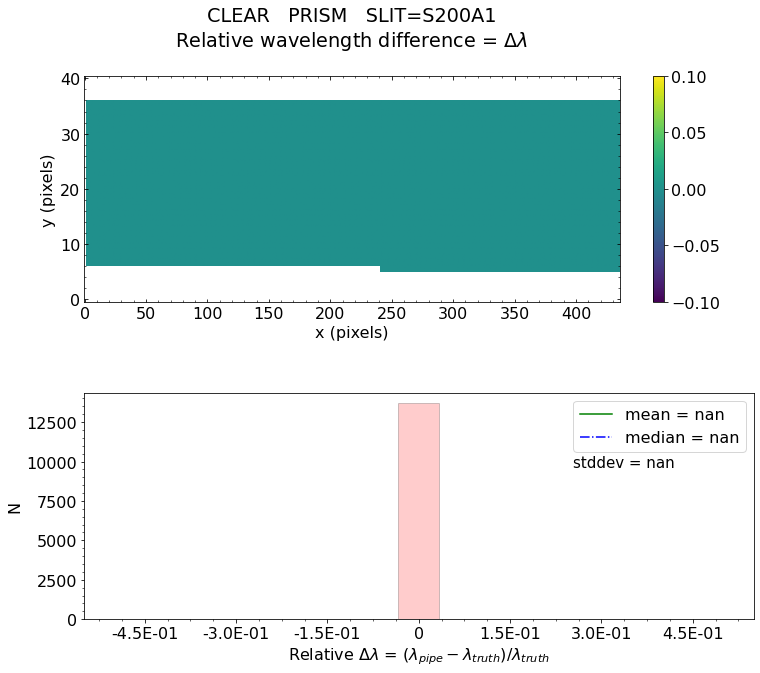

No output_directory was provided. Figures will NOT be saved.


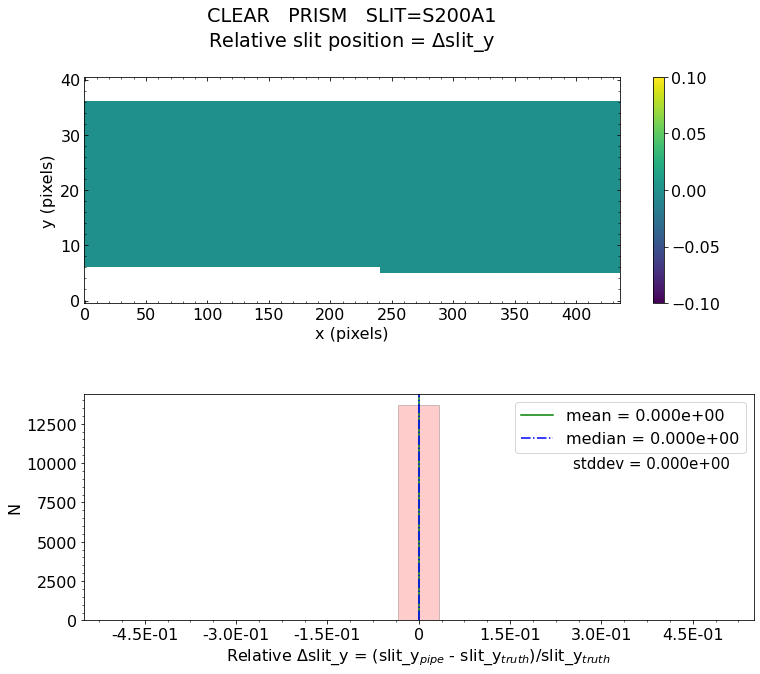

No output_directory was provided. Figures will NOT be saved.


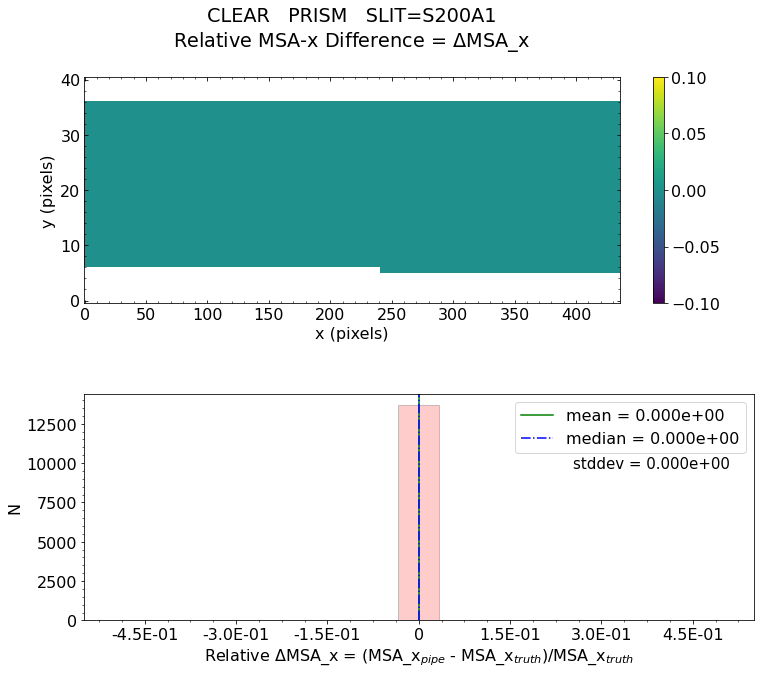

No output_directory was provided. Figures will NOT be saved.


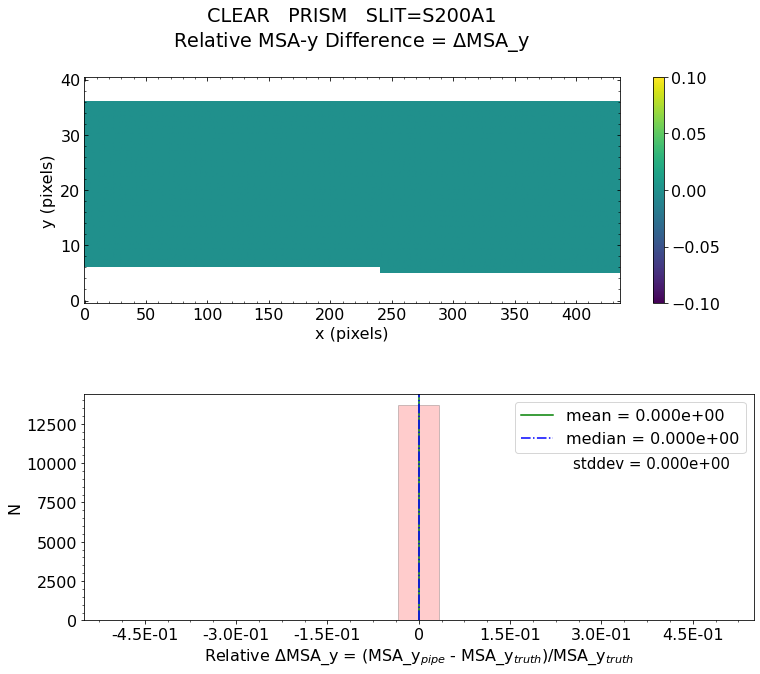

No output_directory was provided. Figures will NOT be saved.


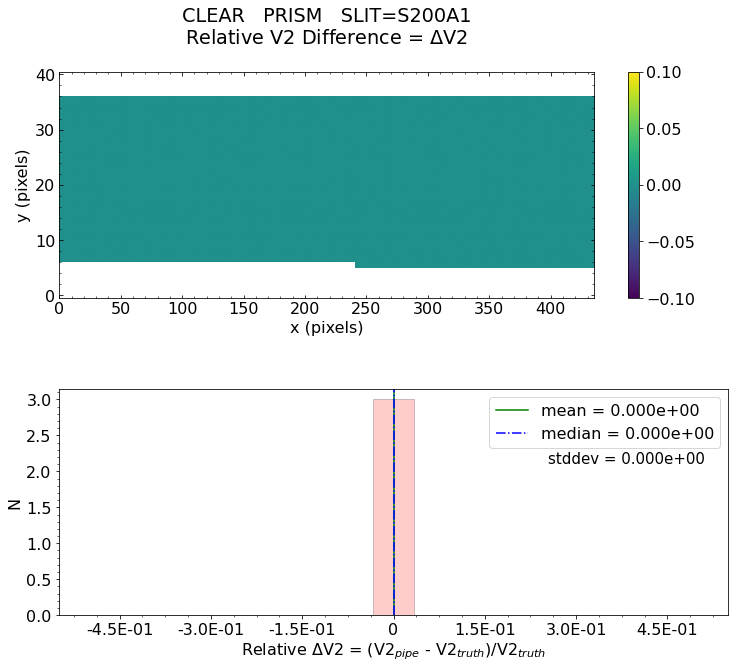

No output_directory was provided. Figures will NOT be saved.


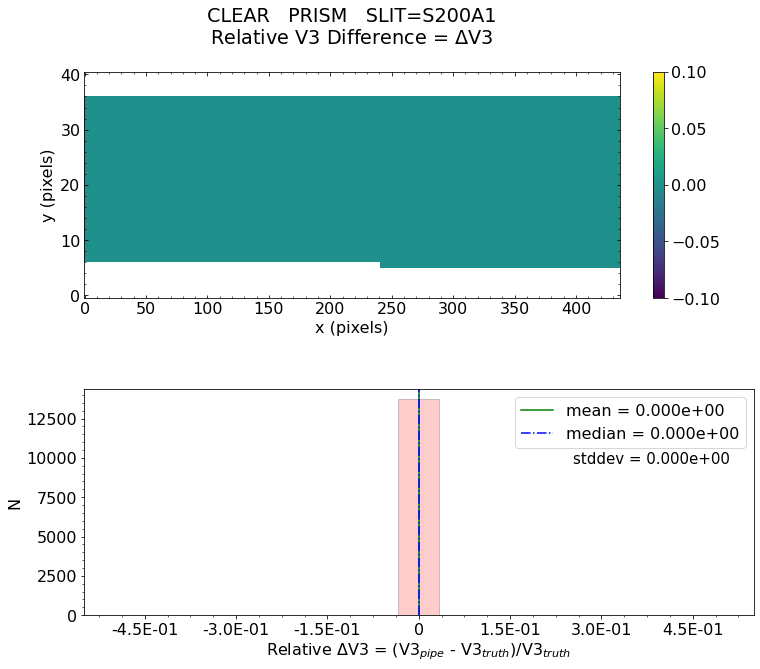


Working with slit: S200A2


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = nan    median = nan    stdev = nan
    Maximum   RelativeWavelength Difference = nan
    Minimum   RelativeWavelength Difference = nan
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  FAILED


   Relative Slit-Y Difference  :   mean = 3.040e-17    median = 0.000e+00    stdev = 1.176e-14
    Maximum   RelativeSlit-Y Difference = 4.281e-13
    Minimum   RelativeSlit-Y Difference = -1.115e-13
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0

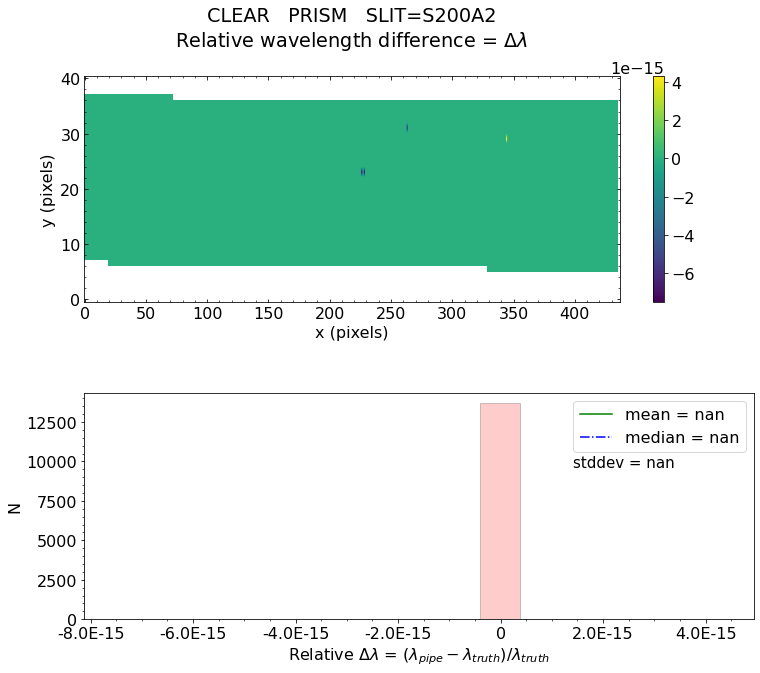

No output_directory was provided. Figures will NOT be saved.


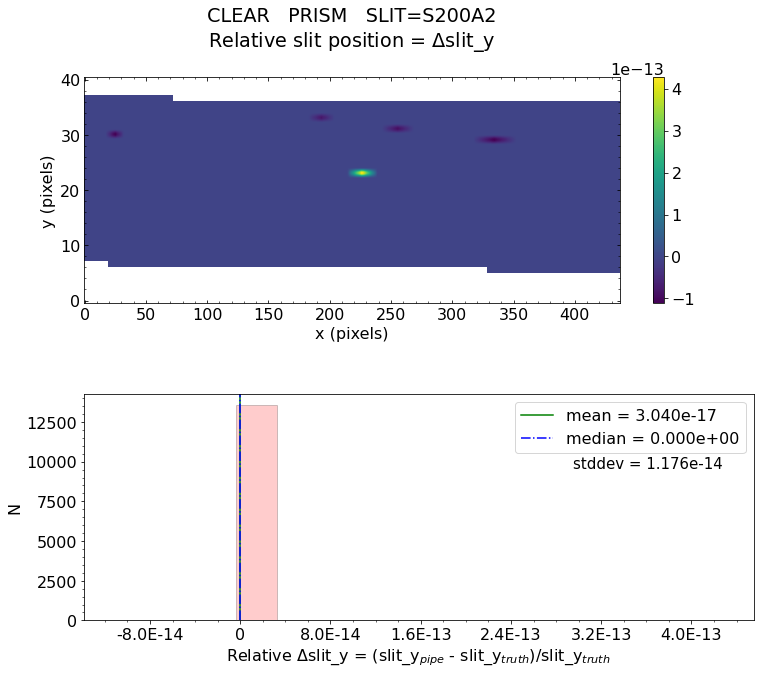

No output_directory was provided. Figures will NOT be saved.


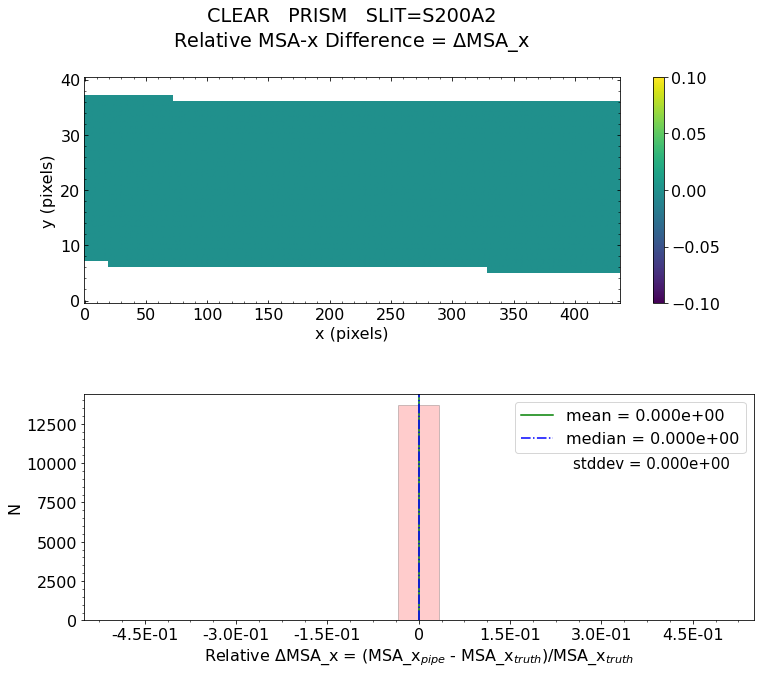

No output_directory was provided. Figures will NOT be saved.


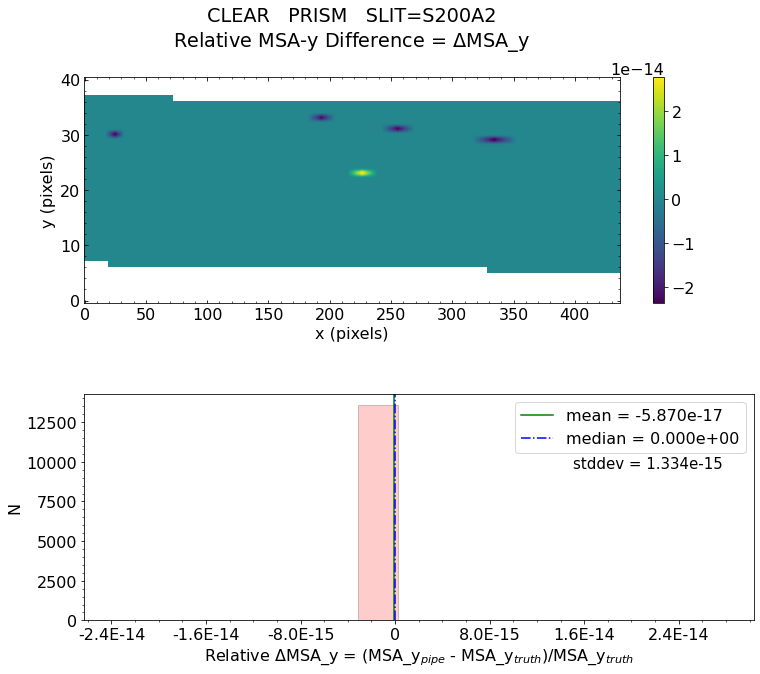

No output_directory was provided. Figures will NOT be saved.


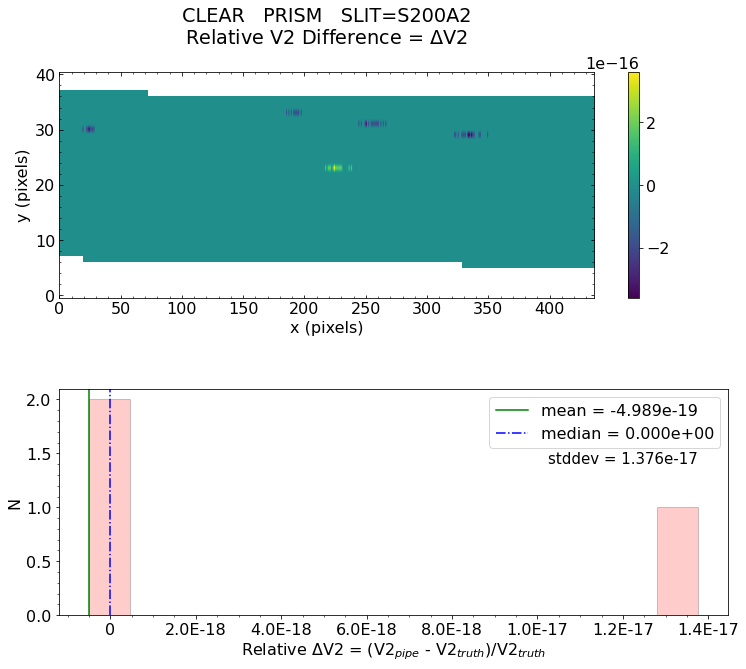

No output_directory was provided. Figures will NOT be saved.


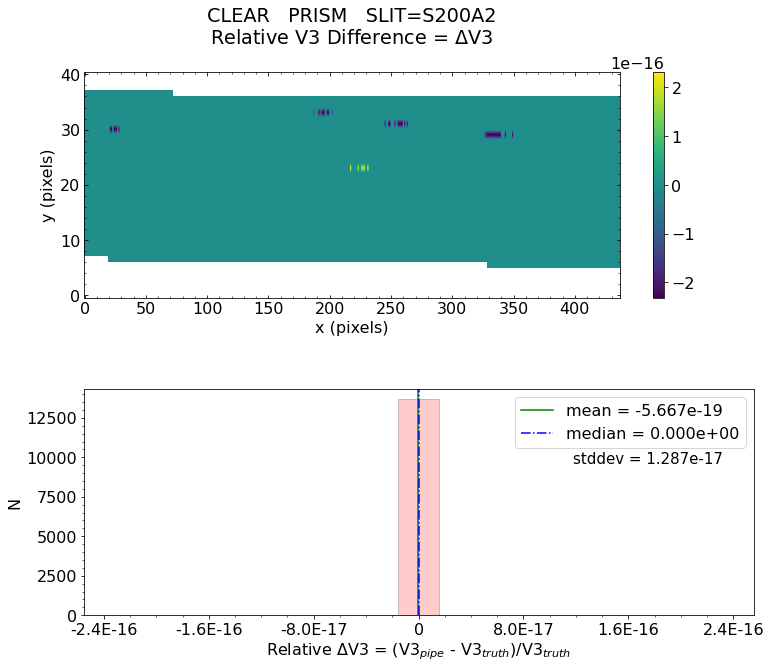


Working with slit: S400A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = nan    median = nan    stdev = nan
    Maximum   RelativeWavelength Difference = nan
    Minimum   RelativeWavelength Difference = nan
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  FAILED


   Relative Slit-Y Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeSlit-Y Difference = 0.000e+00
    Minimum   RelativeSlit-Y Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

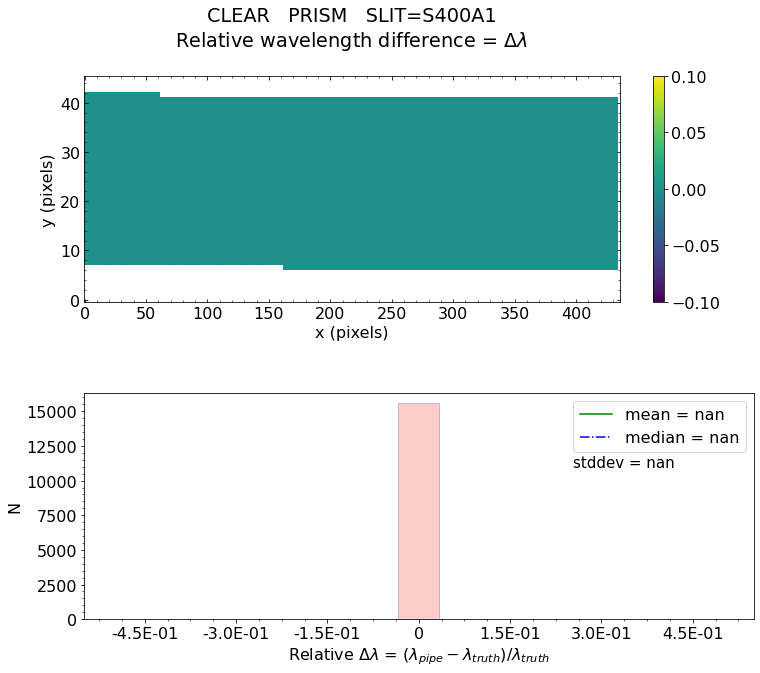

No output_directory was provided. Figures will NOT be saved.


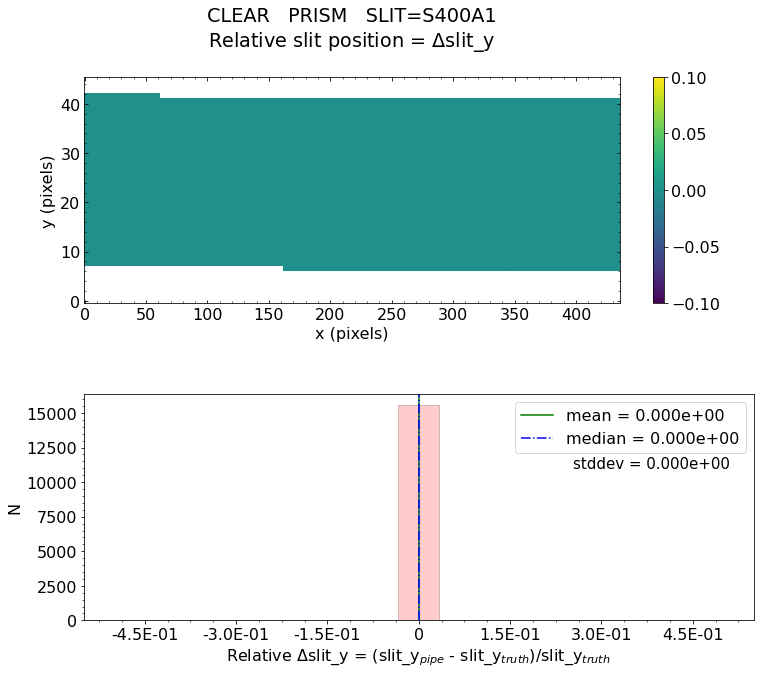

No output_directory was provided. Figures will NOT be saved.


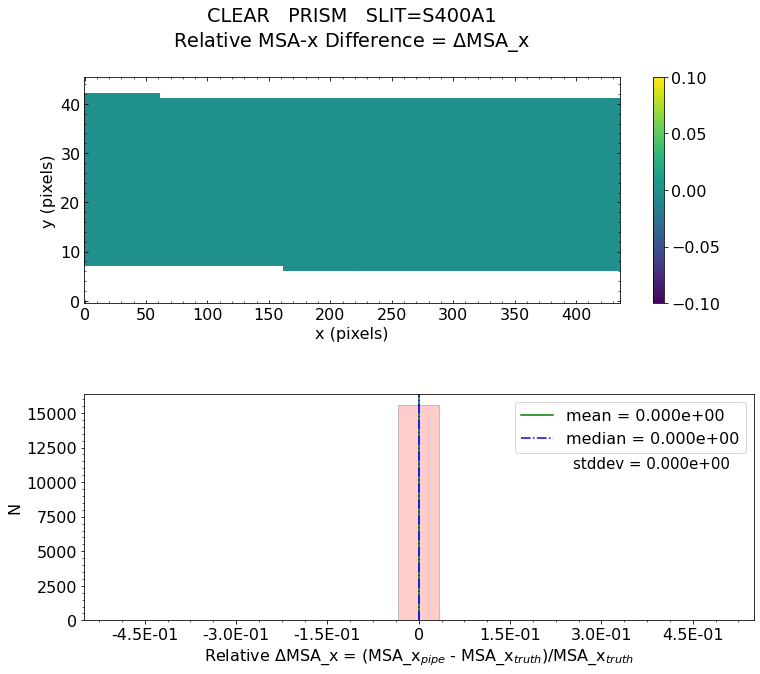

No output_directory was provided. Figures will NOT be saved.


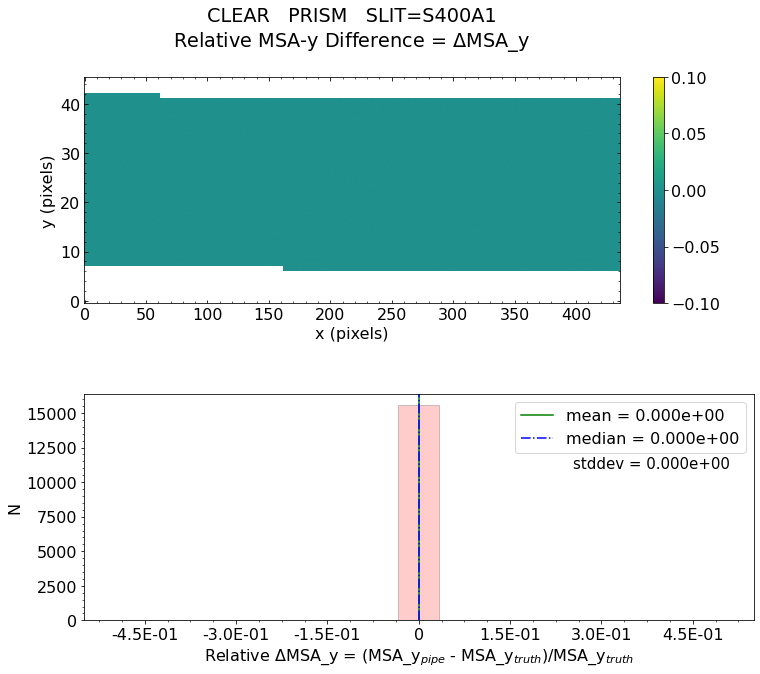

No output_directory was provided. Figures will NOT be saved.


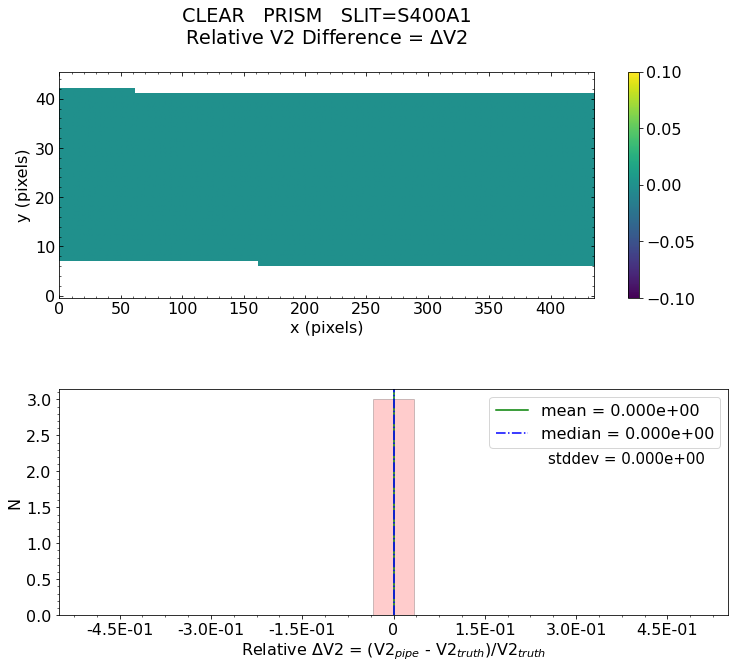

No output_directory was provided. Figures will NOT be saved.


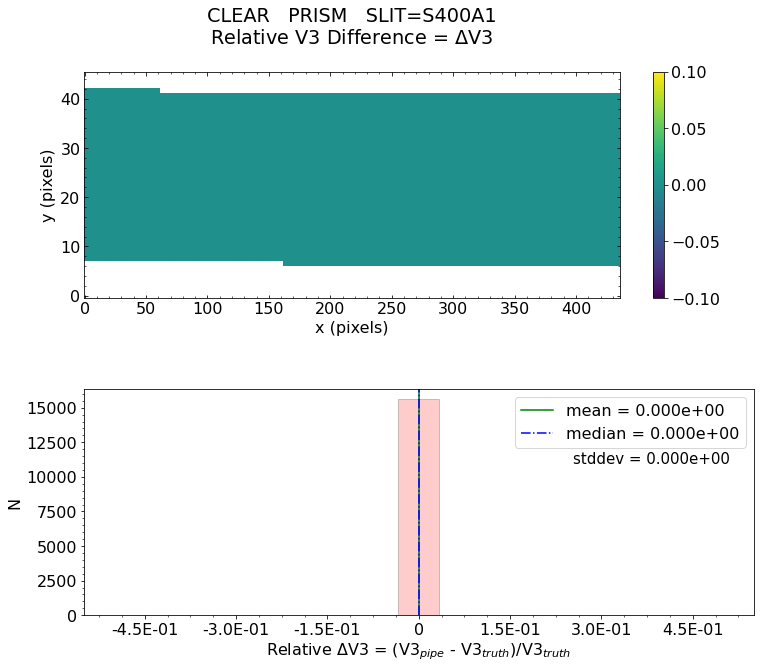


Working with slit: S1600A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = nan    median = nan    stdev = nan
    Maximum   RelativeWavelength Difference = nan
    Minimum   RelativeWavelength Difference = nan
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  FAILED


   Relative Slit-Y Difference  :   mean = -1.497e-16    median = 0.000e+00    stdev = 4.261e-15
    Maximum   RelativeSlit-Y Difference = 0.000e+00
    Minimum   RelativeSlit-Y Difference = -1.772e-13
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 

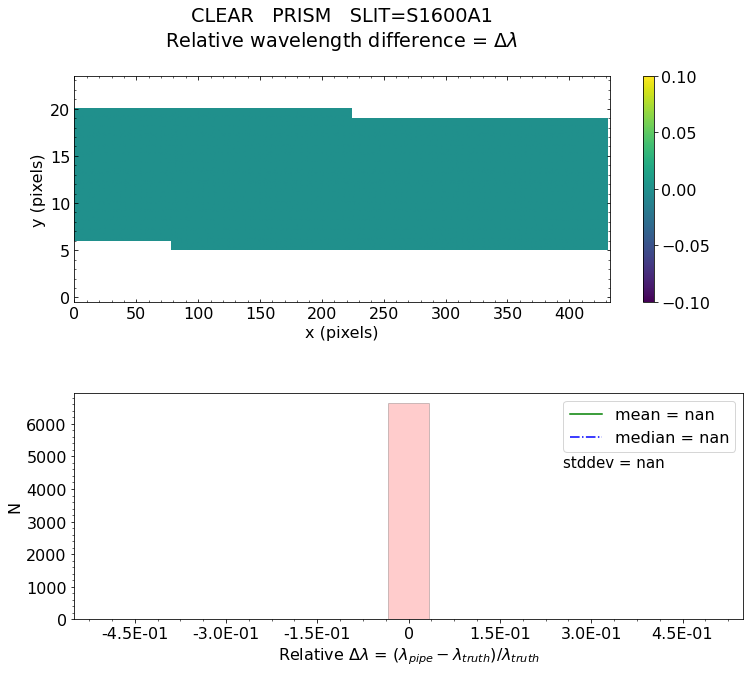

No output_directory was provided. Figures will NOT be saved.


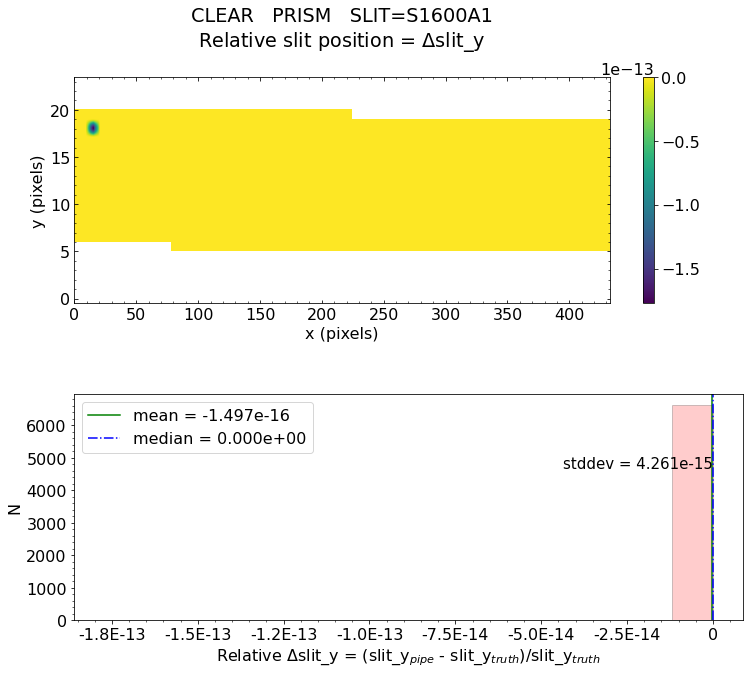

No output_directory was provided. Figures will NOT be saved.


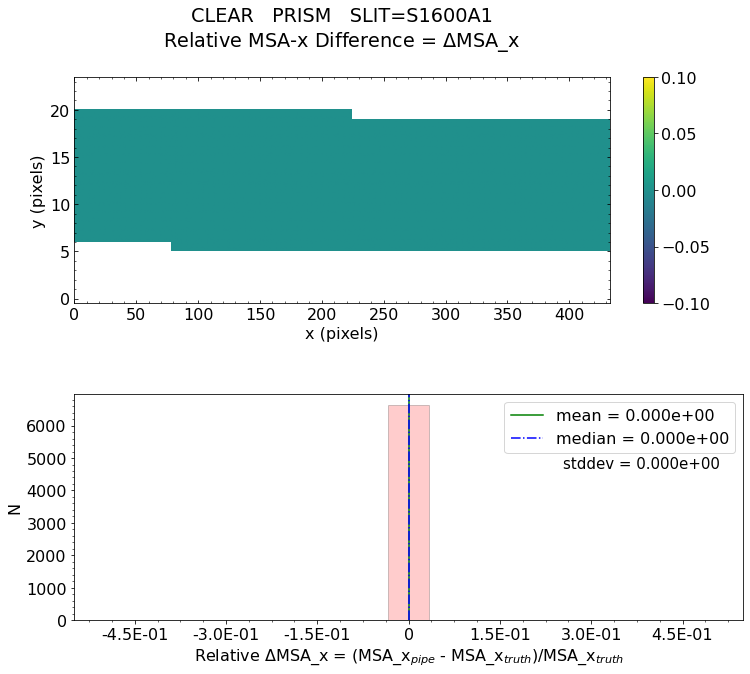

No output_directory was provided. Figures will NOT be saved.


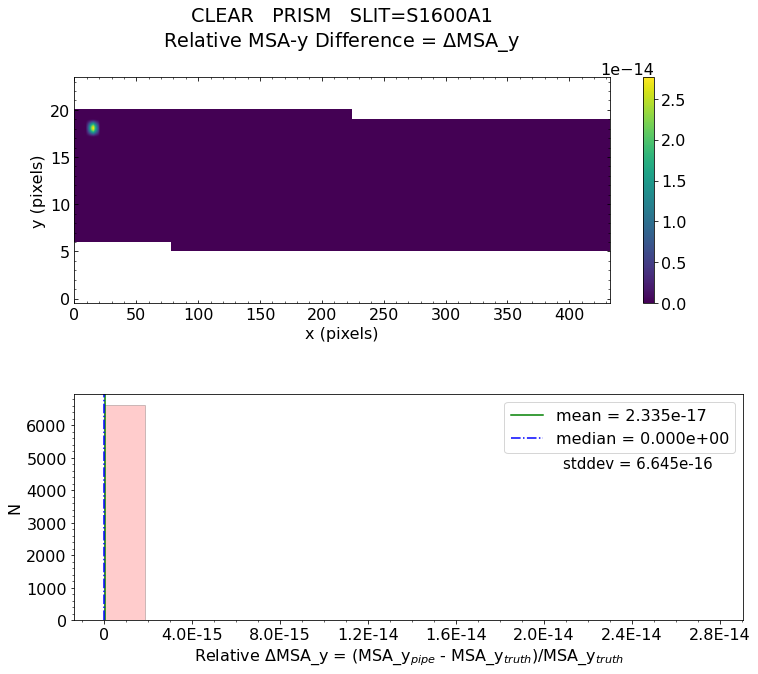

No output_directory was provided. Figures will NOT be saved.


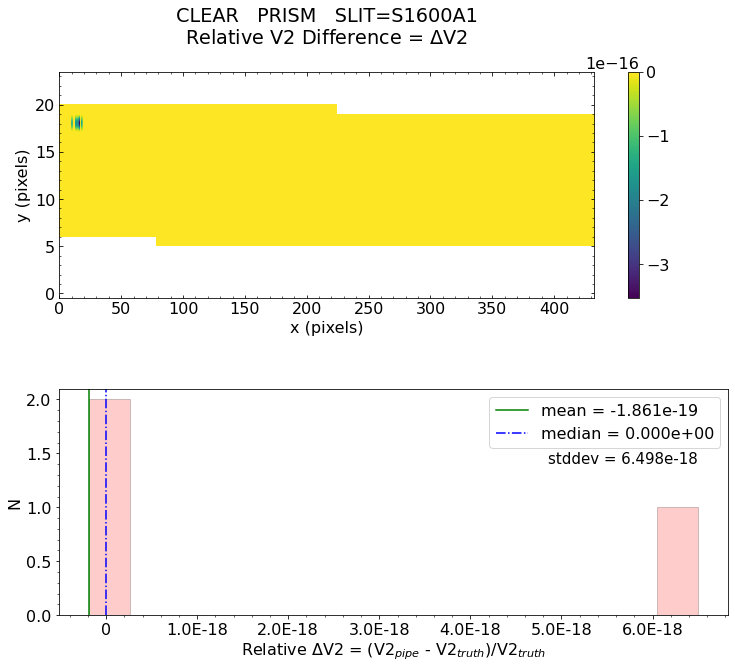

No output_directory was provided. Figures will NOT be saved.


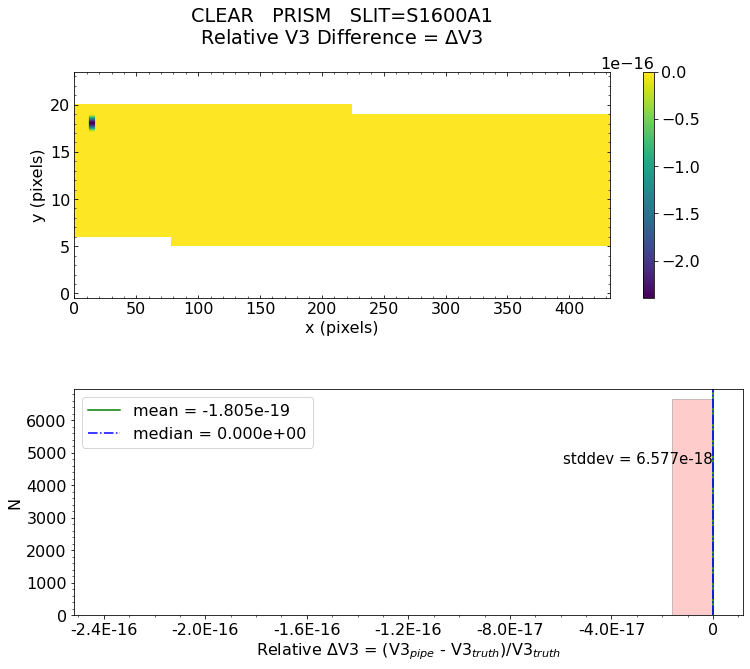


 * The test of V3 difference for slit S200A1 PASSED.

 * The test of V3 difference for slit S200A2 PASSED.

 * The test of V3 difference for slit S400A1 PASSED.

 * The test of V3 difference for slit S1600A1 PASSED.

 *** Final result for assign_wcs test will be reported as PASSED *** 

Did assign_wcs validation test passed?  PASSED 


Testing files for detector:  nrs2


Working with uncal_file:  fs_prism_nrs2_uncal.fits


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/validate.py:34: ValidationWarning: While validating meta.instrument.fixed_slit the following error occurred:
'FULL' is not one of ['S200A1', 'S200A2', 'S200B1', 'S400A1', 'S1600A1', 'NONE']

Failed validating 'enum' in schema:
    OrderedDict([('title', 'Name of fixed slit aperture used'),
                 ('type', 'string'),
                 ('enum',
                  ['S200A1',
                   'S200A2',
                   'S200B1',
                   'S400A1',
                   'S1600A1',
                   'NONE']),
                 ('fits_keyword', 'FXD_SLIT'),
                 ('blend_table', True)])

On instance:
    'FULL'
  warnings.warn(errmsg, ValidationWarning)


2021-03-12 23:48:35,765 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.


2021-03-12 23:48:35,766 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.


2021-03-12 23:48:35,767 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.


2021-03-12 23:48:35,768 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.


2021-03-12 23:48:35,770 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.


2021-03-12 23:48:35,770 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.


2021-03-12 23:48:35,772 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.


2021-03-12 23:48:35,773 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.


2021-03-12 23:48:35,774 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.


2021-03-12 23:48:35,775 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.


2021-03-12 23:48:35,777 - stpipe.Detector1Pipeline.linearity - INFO - LinearityStep instance created.


2021-03-12 23:48:35,778 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.


2021-03-12 23:48:35,779 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.


2021-03-12 23:48:35,780 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.


2021-03-12 23:48:35,782 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.


2021-03-12 23:48:35,783 - stpipe.Detector1Pipeline.ramp_fit - INFO - RampFitStep instance created.


2021-03-12 23:48:35,784 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.


Exception ignored in: <function DataModel.__del__ at 0x7f4033a6f040>
Traceback (most recent call last):
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 337, in __del__
    self.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 359, in close
    file_reference.decrement()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 1112, in decrement
    self._file.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/astropy/io/fits/hdu/hdulist.py", line 973, in close
    se

/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stpipe/step.py:359: ResourceWarning: unclosed file <_io.FileIO name='/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_prism_nrs2_uncal.fits' mode='rb' closefd=True>
  gc.collect()
2021-03-12 23:48:35,958 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_prism_nrs2_uncal.fits',).


2021-03-12 23:48:35,967 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'outp

2021-03-12 23:48:36,052 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'fs_prism_nrs2_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']


2021-03-12 23:48:36,078 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_dark_0087.fits'.


2021-03-12 23:48:36,079 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_gain_0018.fits'.


2021-03-12 23:48:36,081 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_ipc_0012.fits'.


2021-03-12 23:48:36,082 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_linearity_0021.fits'.


2021-03-12 23:48:36,084 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_mask_0011.fits'.


2021-03-12 23:48:36,085 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSAT reference file is 'N/A'.


2021-03-12 23:48:36,085 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0017.fits'.


2021-03-12 23:48:36,086 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_refpix_0020.fits'.


2021-03-12 23:48:36,087 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is 'N/A'.


2021-03-12 23:48:36,088 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is 'N/A'.


2021-03-12 23:48:36,088 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_saturation_0021.fits'.


2021-03-12 23:48:36,090 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_superbias_0114.fits'.


2021-03-12 23:48:36,091 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.


2021-03-12 23:48:36,091 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPPARS reference file is 'N/A'.


2021-03-12 23:48:36,092 - stpipe.Detector1Pipeline - INFO - Starting calwebb_detector1 ...


2021-03-12 23:48:36,385 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:48:36,387 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:48:36,565 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed


2021-03-12 23:48:36,566 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped


2021-03-12 23:48:36,567 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done


2021-03-12 23:48:36,661 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:48:36,663 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:48:36,678 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /grp/crds/cache/references/jwst/jwst_nirspec_mask_0011.fits


2021-03-12 23:48:37,580 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init done


2021-03-12 23:48:37,692 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:48:37,694 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:48:37,709 - stpipe.Detector1Pipeline.saturation - INFO - Using SATURATION reference file /grp/crds/cache/references/jwst/jwst_nirspec_saturation_0021.fits


2021-03-12 23:48:39,318 - stpipe.Detector1Pipeline.saturation - INFO - Detected 5379 saturated pixels


2021-03-12 23:48:39,341 - stpipe.Detector1Pipeline.saturation - INFO - Detected 0 A/D floor pixels


2021-03-12 23:48:39,365 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation done


2021-03-12 23:48:39,476 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:48:39,478 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:48:39,494 - stpipe.Detector1Pipeline.ipc - INFO - Using IPC reference file /grp/crds/cache/references/jwst/jwst_nirspec_ipc_0012.fits


2021-03-12 23:48:40,042 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc done


2021-03-12 23:48:40,180 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:48:40,181 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:48:40,197 - stpipe.Detector1Pipeline.superbias - INFO - Using SUPERBIAS reference file /grp/crds/cache/references/jwst/jwst_nirspec_superbias_0114.fits


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/validate.py:34: ValidationWarning: While validating meta.exposure.readpatt the following error occurred:
'ALLIRS2' is not one of ['ACQ1', 'ACQ2', 'BRIGHT1', 'BRIGHT2', 'DEEP2', 'DEEP8', 'FAST', 'FASTGRPAVG', 'FASTGRPAVG8', 'FASTGRPAVG16', 'FASTGRPAVG32', 'FASTGRPAVG64', 'FASTR1', 'FASTR100', 'FGS', 'FGS60', 'FGS8370', 'FGS840', 'FGSRAPID', 'FINEGUIDE', 'ID', 'MEDIUM2', 'MEDIUM8', 'NIS', 'NISRAPID', 'NRS', 'NRSIRS2', 'NRSN16R4', 'NRSN32R8', 'NRSN8R2', 'NRSRAPID', 'NRSIRS2RAPID', 'NRSRAPIDD1', 'NRSRAPIDD2', 'NRSRAPIDD6', 'NRSSLOW', 'RAPID', 'SHALLOW2', 'SHALLOW4', 'SLOW', 'SLOWR1', 'TRACK', 'ANY', 'N/A']

Failed validating 'enum' in schema:
    OrderedDict([('title', 'Readout pattern'),
                 ('type', 'string'),
                 ('enum',
                  ['ACQ1',
                   'ACQ2',
                   'BRIGHT1',


2021-03-12 23:48:44,103 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias done


2021-03-12 23:48:44,219 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:48:44,220 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}


2021-03-12 23:48:44,237 - stpipe.Detector1Pipeline.refpix - INFO - Using refpix reference file: /grp/crds/cache/references/jwst/jwst_nirspec_refpix_0020.fits


2021-03-12 23:49:01,148 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix done


2021-03-12 23:49:01,423 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:49:01,424 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:49:01,444 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_nirspec_linearity_0021.fits


2021-03-12 23:49:06,024 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done


2021-03-12 23:49:06,159 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:49:06,161 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'dark_output': None}


2021-03-12 23:49:06,180 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /grp/crds/cache/references/jwst/jwst_nirspec_dark_0087.fits


2021-03-12 23:49:41,187 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=1, ngroups=4, nframes=1, groupgap=0


2021-03-12 23:49:41,188 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data nints=1, ngroups=65, nframes=1, groupgap=0


2021-03-12 23:49:41,748 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current done


2021-03-12 23:49:42,562 - stpipe.Detector1Pipeline.jump - INFO - Step jump running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:49:42,564 - stpipe.Detector1Pipeline.jump - INFO - Step jump parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'rejection_threshold': 4.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 200.0, 'min_jump_to_flag_neighbors': 10.0}


2021-03-12 23:49:42,574 - stpipe.Detector1Pipeline.jump - WARNING - Can not apply jump detection when NGROUPS<=4;


2021-03-12 23:49:42,575 - stpipe.Detector1Pipeline.jump - WARNING - Jump step will be skipped


2021-03-12 23:49:42,700 - stpipe.Detector1Pipeline.jump - INFO - Step jump done


2021-03-12 23:49:42,925 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit running with args (<RampModel(1, 4, 3200, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:49:42,927 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'int_name': '', 'save_opt': False, 'opt_name': '', 'maximum_cores': 'none'}


2021-03-12 23:49:42,956 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0017.fits


2021-03-12 23:49:44,132 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0018.fits


2021-03-12 23:49:44,874 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols


2021-03-12 23:49:44,875 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal


2021-03-12 23:49:56,309 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 4


2021-03-12 23:49:56,311 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:1091: RuntimeWarning: divide by zero encountered in true_divide
  var_p2 = 1/(s_inv_var_p3.sum(axis=0))
2021-03-12 23:49:56,459 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done


2021-03-12 23:49:56,626 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(2048, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:49:56,628 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:49:56,680 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-12 23:49:56,681 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-12 23:49:56,682 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-12 23:49:56,773 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(1, 2048, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:49:56,775 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:49:56,822 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-12 23:49:56,822 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-12 23:49:56,823 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-12 23:49:56,824 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1


2021-03-12 23:49:56,824 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


2021-03-12 23:49:56,833 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.


2021-03-12 23:49:56,941 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<ImageModel(2048, 2048) from fs_prism_nrs2_uncal.fits>,).


2021-03-12 23:49:56,943 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}


2021-03-12 23:49:57,073 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.0332140289247036 deg


2021-03-12 23:49:57,073 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3367482721805573 deg


2021-03-12 23:49:57,074 - stpipe.AssignWcsStep - INFO - theta_y correction: -1.0907214098475986e-05 deg


2021-03-12 23:49:57,074 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-12 23:49:57,243 - stpipe.AssignWcsStep - INFO - Removing slit S200A1 from the list of open slits because the WCS bounding_box is completely outside the detector.


2021-03-12 23:49:57,311 - stpipe.AssignWcsStep - INFO - Removing slit S200A2 from the list of open slits because the WCS bounding_box is completely outside the detector.


2021-03-12 23:49:57,376 - stpipe.AssignWcsStep - INFO - Removing slit S400A1 from the list of open slits because the WCS bounding_box is completely outside the detector.


2021-03-12 23:49:57,413 - stpipe.AssignWcsStep - INFO - Removing slit S1600A1 from the list of open slits because the WCS bounding_box is completely outside the detector.


2021-03-12 23:49:57,451 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS2: ['S200B1']


2021-03-12 23:49:57,451 - stpipe.AssignWcsStep - INFO - Computing WCS for 1 open slitlets


2021-03-12 23:49:57,463 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.0332140289247036 deg


2021-03-12 23:49:57,463 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3367482721805573 deg


2021-03-12 23:49:57,464 - stpipe.AssignWcsStep - INFO - theta_y correction: -1.0907214098475986e-05 deg


2021-03-12 23:49:57,464 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-12 23:49:57,471 - stpipe.AssignWcsStep - INFO - SPORDER= 0, wrange=[6e-07, 5.3e-06]


2021-03-12 23:49:57,560 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 1


2021-03-12 23:49:57,560 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 2


2021-03-12 23:49:57,561 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 3


2021-03-12 23:49:57,561 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 4


2021-03-12 23:49:57,561 - stpipe.AssignWcsStep - INFO - There are 1 open slits in quadrant 5


2021-03-12 23:49:57,664 - stpipe.AssignWcsStep - INFO - Created a NIRSPEC nrs_fixedslit pipeline with references {'distortion': None, 'filteroffset': None, 'specwcs': None, 'regions': None, 'wavelengthrange': '/grp/crds/cache/references/jwst/jwst_nirspec_wavelengthrange_0004.asdf', 'camera': '/grp/crds/cache/references/jwst/jwst_nirspec_camera_0004.asdf', 'collimator': '/grp/crds/cache/references/jwst/jwst_nirspec_collimator_0004.asdf', 'disperser': '/grp/crds/cache/references/jwst/jwst_nirspec_disperser_0034.asdf', 'fore': '/grp/crds/cache/references/jwst/jwst_nirspec_fore_0028.asdf', 'fpa': '/grp/crds/cache/references/jwst/jwst_nirspec_fpa_0005.asdf', 'msa': '/grp/crds/cache/references/jwst/jwst_nirspec_msa_0005.asdf', 'ote': '/grp/crds/cache/references/jwst/jwst_nirspec_ote_0005.asdf', 'ifupost': None, 'ifufore': None, 'ifuslicer': None}


2021-03-12 23:49:57,777 - stpipe.AssignWcsStep - INFO - COMPLETED assign_wcs


2021-03-12 23:49:57,780 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done


Running test for FS...
Information from the 'truth' (or comparison) file 
Filename: /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_prism_nrs2_assign_wcs_truth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     276   ()      
  1  SCI           1 ImageHDU        50   (2048, 2048)   float32   
  2  ERR           1 ImageHDU        10   (2048, 2048)   float32   
  3  DQ            1 ImageHDU        11   (2048, 2048)   int32 (rescales to uint32)   
  4  VAR_POISSON    1 ImageHDU         9   (2048, 2048)   float32   
  5  VAR_RNOISE    1 ImageHDU         9   (2048, 2048)   float32   
  6  ASDF          1 BinTableHDU     11   1R x 1C   [95376B]   


None


Comparing to ST 'truth' file.
from assign_wcs file  -->     Detector: NRS2   Grating: PRISM   Filter: CLEAR   Lamp: LINE4
GWA_XTILT: 0.3367482721805573
GWA_YTILT: 0.0332140289247036
GWA_TTILT: 37.20692577377271

Working with slit: S200B1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = nan    median = nan    stdev = nan
    Maximum   RelativeWavelength Difference = nan
    Minimum   RelativeWavelength Difference = nan
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  FAILED


   Relative Slit-Y Difference  :   mean = -1.148e-15    median = 0.000e+00    stdev = 3.143e-14
    Maximum   RelativeSlit-Y Difference = 1.414e-13
    Minimum   RelativeSlit-Y Difference = -1.047e-12
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 

/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/geometry.py:203: RuntimeWarning: invalid value encountered in remainder
  lon = np.mod(lon, 360.0 * u.deg if nquant else 360.0)


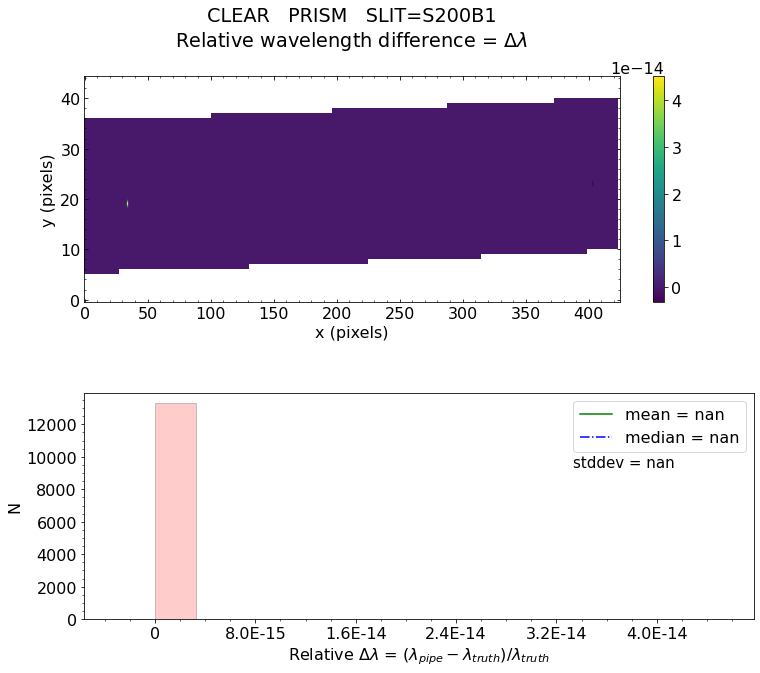

No output_directory was provided. Figures will NOT be saved.


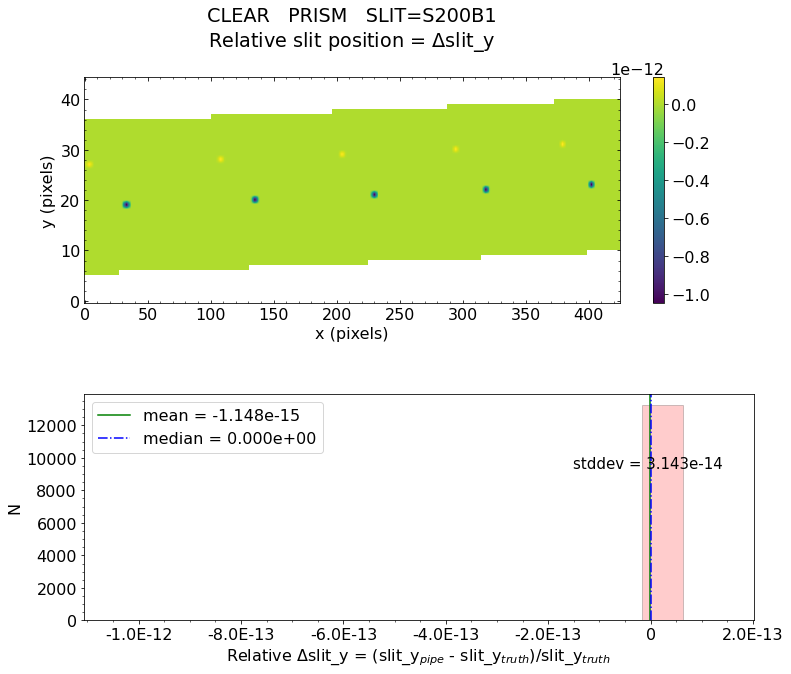

No output_directory was provided. Figures will NOT be saved.


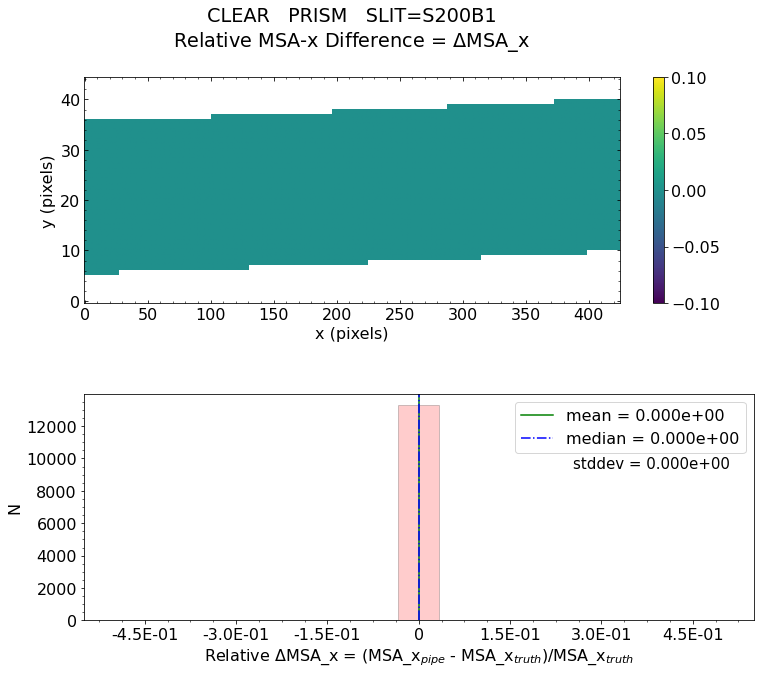

No output_directory was provided. Figures will NOT be saved.


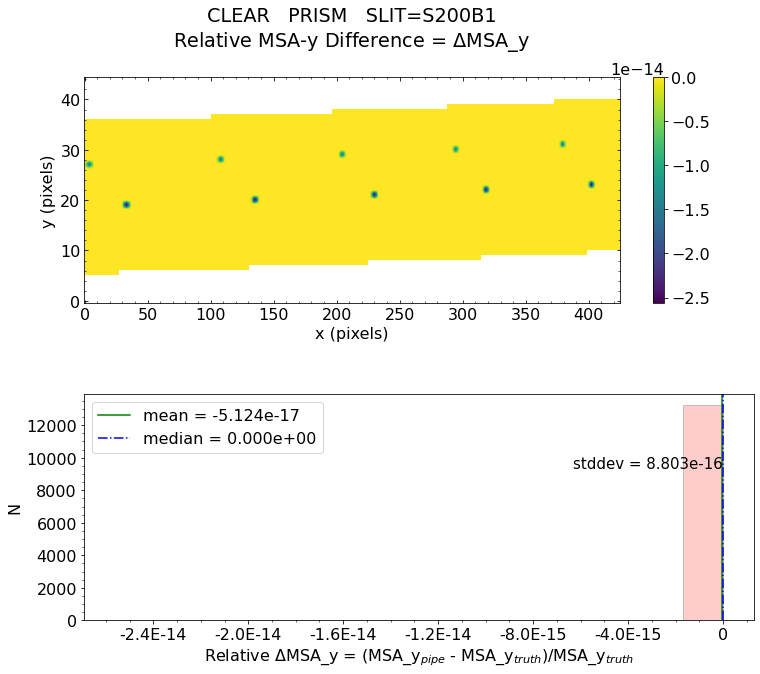

No output_directory was provided. Figures will NOT be saved.


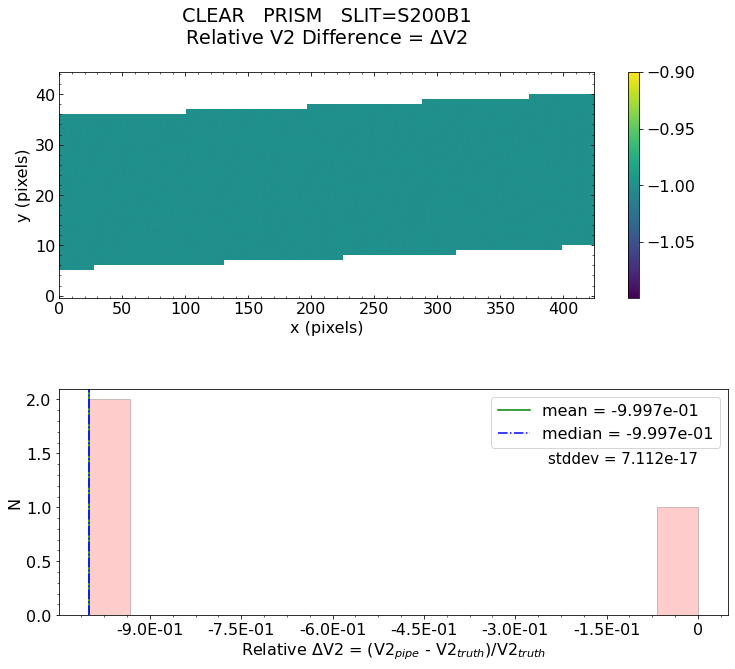

No output_directory was provided. Figures will NOT be saved.


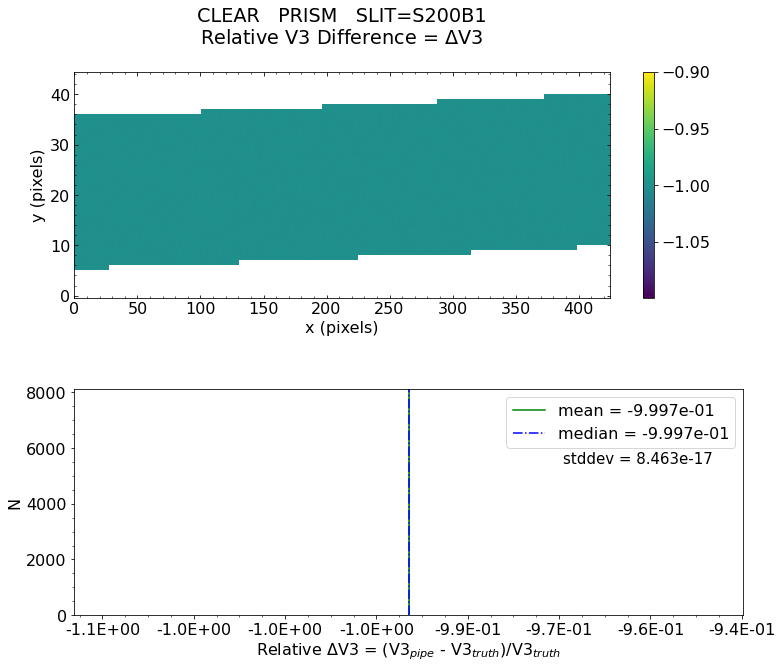


 * The test of V3 difference for slit S200B1 FAILED.

 *** Final result for assign_wcs test will be reported as FAILED *** 

Did assign_wcs validation test passed?  FAILED 


Testing files for detector:  nrs1


Working with uncal_file:  fs_fullframe_g395h_f290lp_nrs1_uncal.fits


2021-03-12 23:50:05,199 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.


2021-03-12 23:50:05,200 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.


2021-03-12 23:50:05,201 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.


2021-03-12 23:50:05,202 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.


2021-03-12 23:50:05,203 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.


2021-03-12 23:50:05,203 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.


2021-03-12 23:50:05,204 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.


2021-03-12 23:50:05,205 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.


2021-03-12 23:50:05,207 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.


2021-03-12 23:50:05,207 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.


2021-03-12 23:50:05,208 - stpipe.Detector1Pipeline.linearity - INFO - LinearityStep instance created.


2021-03-12 23:50:05,209 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.


2021-03-12 23:50:05,210 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.


2021-03-12 23:50:05,211 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.


2021-03-12 23:50:05,212 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.


2021-03-12 23:50:05,213 - stpipe.Detector1Pipeline.ramp_fit - INFO - RampFitStep instance created.


2021-03-12 23:50:05,214 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.


Exception ignored in: <function DataModel.__del__ at 0x7f4033a6f040>
Traceback (most recent call last):
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 337, in __del__
    self.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 359, in close
    file_reference.decrement()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 1112, in decrement
    self._file.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/astropy/io/fits/hdu/hdulist.py", line 973, in close
    se

/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stpipe/step.py:359: ResourceWarning: unclosed file <_io.FileIO name='/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_fullframe_g395h_f290lp_nrs1_uncal.fits' mode='rb' closefd=True>
  gc.collect()
2021-03-12 23:50:05,362 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_fullframe_g395h_f290lp_nrs1_uncal.fits',).


2021-03-12 23:50:05,371 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'outp

2021-03-12 23:50:05,484 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'fs_fullframe_g395h_f290lp_nrs1_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']


2021-03-12 23:50:05,500 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_dark_0086.fits'.


2021-03-12 23:50:05,503 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_gain_0019.fits'.


2021-03-12 23:50:05,510 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_ipc_0011.fits'.


2021-03-12 23:50:05,513 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_linearity_0018.fits'.


2021-03-12 23:50:05,519 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_mask_0010.fits'.


2021-03-12 23:50:05,525 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSAT reference file is 'N/A'.


2021-03-12 23:50:05,526 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0018.fits'.


2021-03-12 23:50:05,531 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_refpix_0022.fits'.


2021-03-12 23:50:05,537 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is 'N/A'.


2021-03-12 23:50:05,537 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is 'N/A'.


2021-03-12 23:50:05,537 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_saturation_0020.fits'.


2021-03-12 23:50:05,541 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_superbias_0113.fits'.


2021-03-12 23:50:05,543 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.


2021-03-12 23:50:05,543 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPPARS reference file is 'N/A'.


2021-03-12 23:50:05,544 - stpipe.Detector1Pipeline - INFO - Starting calwebb_detector1 ...


2021-03-12 23:50:05,997 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:50:05,998 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:50:06,274 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed


2021-03-12 23:50:06,274 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped


2021-03-12 23:50:06,275 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done


2021-03-12 23:50:06,371 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:50:06,373 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:50:06,408 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /grp/crds/cache/references/jwst/jwst_nirspec_mask_0010.fits


2021-03-12 23:50:06,835 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init done


2021-03-12 23:50:06,958 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:50:06,960 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:50:06,978 - stpipe.Detector1Pipeline.saturation - INFO - Using SATURATION reference file /grp/crds/cache/references/jwst/jwst_nirspec_saturation_0020.fits


2021-03-12 23:50:07,749 - stpipe.Detector1Pipeline.saturation - INFO - Detected 11377 saturated pixels


2021-03-12 23:50:07,800 - stpipe.Detector1Pipeline.saturation - INFO - Detected 0 A/D floor pixels


2021-03-12 23:50:07,818 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation done


2021-03-12 23:50:07,944 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:50:07,945 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:50:07,962 - stpipe.Detector1Pipeline.ipc - INFO - Using IPC reference file /grp/crds/cache/references/jwst/jwst_nirspec_ipc_0011.fits


2021-03-12 23:50:08,891 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc done


2021-03-12 23:50:09,017 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:50:09,018 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:50:09,035 - stpipe.Detector1Pipeline.superbias - INFO - Using SUPERBIAS reference file /grp/crds/cache/references/jwst/jwst_nirspec_superbias_0113.fits


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/validate.py:34: ValidationWarning: While validating meta.exposure.readpatt the following error occurred:
'ALLIRS2' is not one of ['ACQ1', 'ACQ2', 'BRIGHT1', 'BRIGHT2', 'DEEP2', 'DEEP8', 'FAST', 'FASTGRPAVG', 'FASTGRPAVG8', 'FASTGRPAVG16', 'FASTGRPAVG32', 'FASTGRPAVG64', 'FASTR1', 'FASTR100', 'FGS', 'FGS60', 'FGS8370', 'FGS840', 'FGSRAPID', 'FINEGUIDE', 'ID', 'MEDIUM2', 'MEDIUM8', 'NIS', 'NISRAPID', 'NRS', 'NRSIRS2', 'NRSN16R4', 'NRSN32R8', 'NRSN8R2', 'NRSRAPID', 'NRSIRS2RAPID', 'NRSRAPIDD1', 'NRSRAPIDD2', 'NRSRAPIDD6', 'NRSSLOW', 'RAPID', 'SHALLOW2', 'SHALLOW4', 'SLOW', 'SLOWR1', 'TRACK', 'ANY', 'N/A']

Failed validating 'enum' in schema:
    OrderedDict([('title', 'Readout pattern'),
                 ('type', 'string'),
                 ('enum',
                  ['ACQ1',
                   'ACQ2',
                   'BRIGHT1',


2021-03-12 23:50:09,565 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias done


2021-03-12 23:50:09,689 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:50:09,691 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}


2021-03-12 23:50:09,708 - stpipe.Detector1Pipeline.refpix - INFO - Using refpix reference file: /grp/crds/cache/references/jwst/jwst_nirspec_refpix_0022.fits


2021-03-12 23:50:33,774 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix done


2021-03-12 23:50:34,028 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:50:34,029 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:50:34,058 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_nirspec_linearity_0018.fits


2021-03-12 23:50:34,831 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done


2021-03-12 23:50:34,975 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:50:34,977 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'dark_output': None}


2021-03-12 23:50:34,997 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /grp/crds/cache/references/jwst/jwst_nirspec_dark_0086.fits


2021-03-12 23:50:38,416 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=1, ngroups=7, nframes=1, groupgap=0


2021-03-12 23:50:38,417 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data nints=1, ngroups=65, nframes=1, groupgap=0


2021-03-12 23:50:38,956 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current done


2021-03-12 23:50:39,474 - stpipe.Detector1Pipeline.jump - INFO - Step jump running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:50:39,476 - stpipe.Detector1Pipeline.jump - INFO - Step jump parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'rejection_threshold': 4.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 200.0, 'min_jump_to_flag_neighbors': 10.0}


2021-03-12 23:50:39,484 - stpipe.Detector1Pipeline.jump - INFO - CR rejection threshold = 4 sigma


2021-03-12 23:50:39,495 - stpipe.Detector1Pipeline.jump - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0019.fits


2021-03-12 23:50:39,537 - stpipe.Detector1Pipeline.jump - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0018.fits


2021-03-12 23:50:39,577 - stpipe.Detector1Pipeline.jump - INFO - Found 32 possible cores to use for jump detection 


2021-03-12 23:50:39,789 - stpipe.Detector1Pipeline.jump - INFO - Executing two-point difference method


2021-03-12 23:50:40,045 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:


2021-03-12 23:50:41,417 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 108160 pixels with at least one CR


2021-03-12 23:50:44,277 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 4.48706 sec


2021-03-12 23:50:44,279 - stpipe.Detector1Pipeline.jump - INFO - The execution time in seconds: 4.794581


2021-03-12 23:50:44,280 - stpipe.Detector1Pipeline.jump - INFO - Step jump done


2021-03-12 23:50:44,394 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:50:44,396 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'int_name': '', 'save_opt': False, 'opt_name': '', 'maximum_cores': 'none'}


2021-03-12 23:50:44,421 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0018.fits


2021-03-12 23:50:44,455 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0019.fits


2021-03-12 23:50:44,484 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols


2021-03-12 23:50:44,485 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


2021-03-12 23:51:13,871 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7


2021-03-12 23:51:13,871 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1


2021-03-12 23:51:14,000 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done


2021-03-12 23:51:14,132 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(2048, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:51:14,134 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:51:14,182 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-12 23:51:14,182 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-12 23:51:14,183 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-12 23:51:14,279 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(1, 2048, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:51:14,280 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:51:14,321 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-12 23:51:14,322 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-12 23:51:14,323 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-12 23:51:14,323 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1


2021-03-12 23:51:14,324 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


2021-03-12 23:51:14,332 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.


2021-03-12 23:51:14,447 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<ImageModel(2048, 2048) from fs_fullframe_g395h_f290lp_nrs1_uncal.fits>,).


2021-03-12 23:51:14,448 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}


2021-03-12 23:51:14,578 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.1448970586061478 deg


2021-03-12 23:51:14,578 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3232757747173309 deg


2021-03-12 23:51:14,579 - stpipe.AssignWcsStep - INFO - theta_y correction: -3.766823889842878e-13 deg


2021-03-12 23:51:14,580 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-12 23:51:14,774 - stpipe.AssignWcsStep - INFO - Removing slit S200B1 from the list of open slits because the WCS bounding_box is completely outside the detector.


2021-03-12 23:51:14,775 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS1: ['S200A1', 'S200A2', 'S400A1', 'S1600A1']


2021-03-12 23:51:14,775 - stpipe.AssignWcsStep - INFO - Computing WCS for 4 open slitlets


2021-03-12 23:51:14,786 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.1448970586061478 deg


2021-03-12 23:51:14,787 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3232757747173309 deg


2021-03-12 23:51:14,787 - stpipe.AssignWcsStep - INFO - theta_y correction: -3.766823889842878e-13 deg


2021-03-12 23:51:14,788 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-12 23:51:14,794 - stpipe.AssignWcsStep - INFO - SPORDER= -1, wrange=[2.87e-06, 5.27e-06]


2021-03-12 23:51:14,881 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 1


2021-03-12 23:51:14,881 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 2


2021-03-12 23:51:14,882 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 3


2021-03-12 23:51:14,882 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 4


2021-03-12 23:51:14,882 - stpipe.AssignWcsStep - INFO - There are 4 open slits in quadrant 5


2021-03-12 23:51:15,011 - stpipe.AssignWcsStep - INFO - Created a NIRSPEC nrs_fixedslit pipeline with references {'distortion': None, 'filteroffset': None, 'specwcs': None, 'regions': None, 'wavelengthrange': '/grp/crds/cache/references/jwst/jwst_nirspec_wavelengthrange_0004.asdf', 'camera': '/grp/crds/cache/references/jwst/jwst_nirspec_camera_0004.asdf', 'collimator': '/grp/crds/cache/references/jwst/jwst_nirspec_collimator_0004.asdf', 'disperser': '/grp/crds/cache/references/jwst/jwst_nirspec_disperser_0035.asdf', 'fore': '/grp/crds/cache/references/jwst/jwst_nirspec_fore_0022.asdf', 'fpa': '/grp/crds/cache/references/jwst/jwst_nirspec_fpa_0005.asdf', 'msa': '/grp/crds/cache/references/jwst/jwst_nirspec_msa_0005.asdf', 'ote': '/grp/crds/cache/references/jwst/jwst_nirspec_ote_0005.asdf', 'ifupost': None, 'ifufore': None, 'ifuslicer': None}


2021-03-12 23:51:15,139 - stpipe.AssignWcsStep - INFO - COMPLETED assign_wcs


2021-03-12 23:51:15,142 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done


Running test for FS...
Information from the 'truth' (or comparison) file 
Filename: /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_fullframe_g395h_f290lp_nrs1_assign_wcs_truth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   ()      
  1  SCI           1 ImageHDU        51   (2048, 2048)   float32   
  2  ERR           1 ImageHDU        10   (2048, 2048)   float32   
  3  DQ            1 ImageHDU        11   (2048, 2048)   int32 (rescales to uint32)   
  4  VAR_POISSON    1 ImageHDU         9   (2048, 2048)   float32   
  5  VAR_RNOISE    1 ImageHDU         9   (2048, 2048)   float32   
  6  ASDF          1 BinTableHDU     11   1R x 1C   [177114B]   


None


Comparing to ST 'truth' file.
from assign_wcs file  -->     Detector: NRS1   Grating: G395H   Filter: F290LP   Lamp: LINE3
GWA_XTILT: 0.3232757747173309
GWA_YTILT: 0.1448970586061478
GWA_TTILT: 37.16754109485964

Working with slit: S200A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/geometry.py:203: RuntimeWarning: invalid value encountered in remainder
  lon = np.mod(lon, 360.0 * u.deg if nquant else 360.0)



   Relative Wavelength Difference  :   mean = nan    median = nan    stdev = nan
    Maximum   RelativeWavelength Difference = nan
    Minimum   RelativeWavelength Difference = nan
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  FAILED


   Relative Slit-Y Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeSlit-Y Difference = 0.000e+00
    Minimum   RelativeSlit-Y Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Slit-Y Difference:  PASSED


   Relative MSA_X Difference  :   mean = 0.000e+00    m

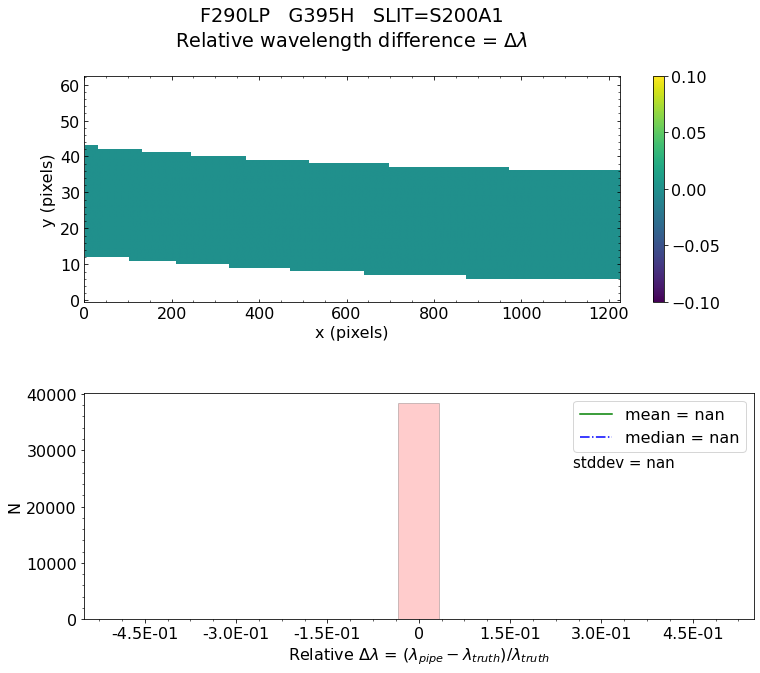

No output_directory was provided. Figures will NOT be saved.


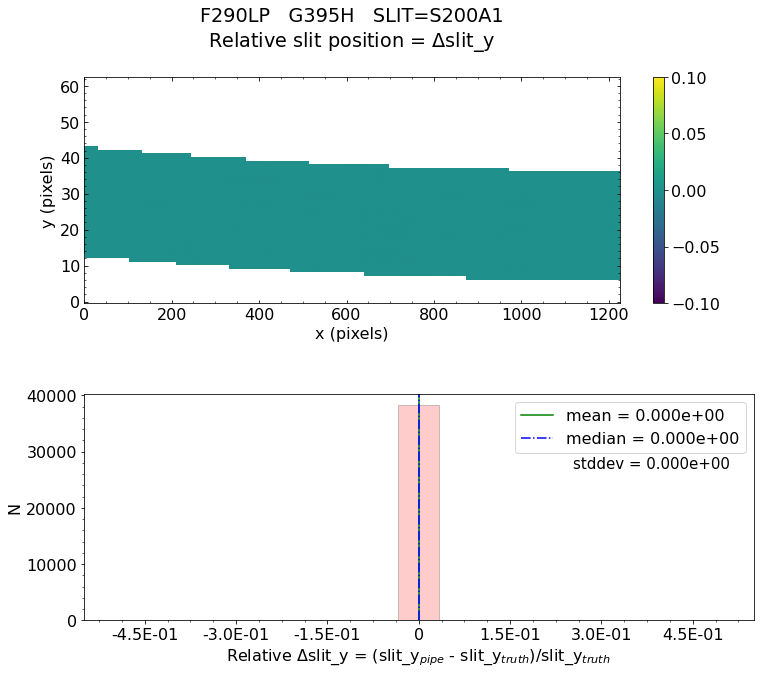

No output_directory was provided. Figures will NOT be saved.


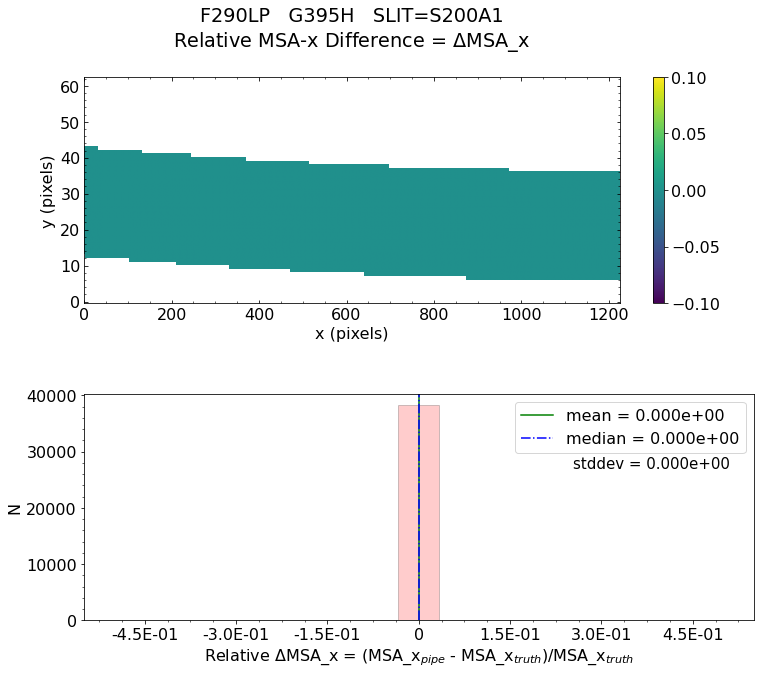

No output_directory was provided. Figures will NOT be saved.


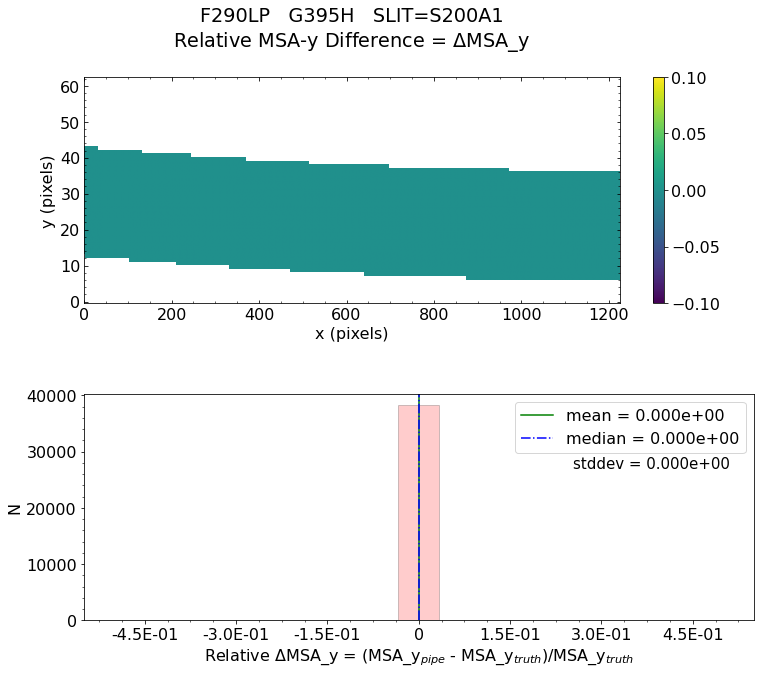

No output_directory was provided. Figures will NOT be saved.


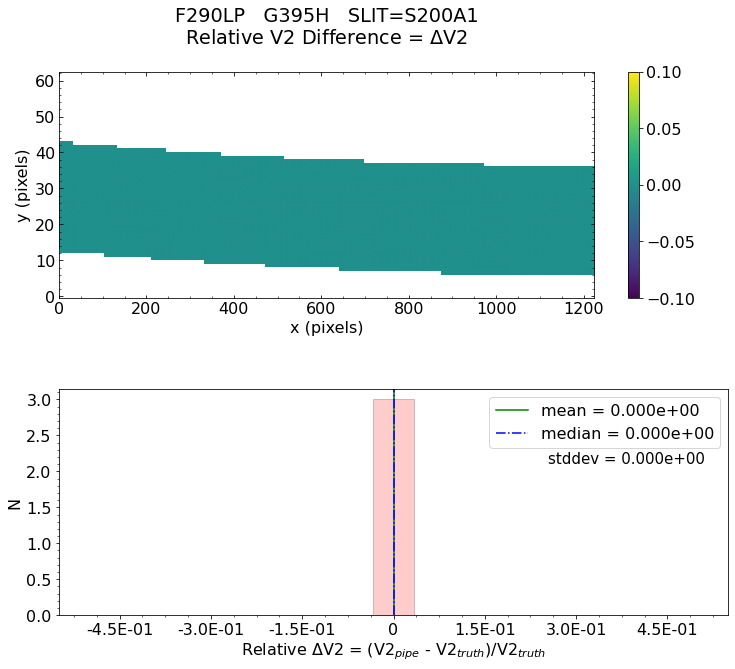

No output_directory was provided. Figures will NOT be saved.


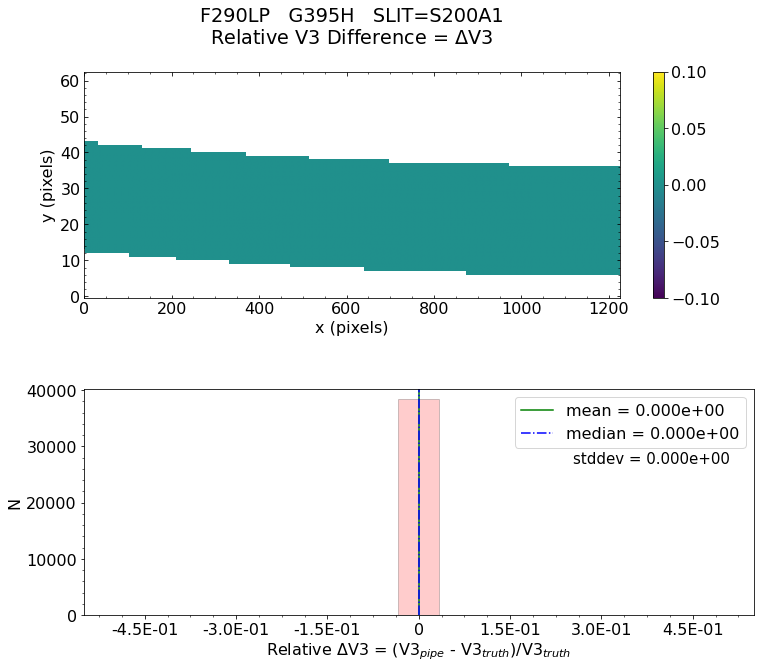


Working with slit: S200A2


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = -3.326e-21    median = 0.000e+00    stdev = 3.930e-18
    Maximum   RelativeWavelength Difference = 3.755e-16
    Minimum   RelativeWavelength Difference = -3.735e-16
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  PASSED


   Relative Slit-Y Difference  :   mean = 3.683e-16    median = 0.000e+00    stdev = 1.475e-14
    Maximum   RelativeSlit-Y Difference = 4.353e-13
    Minimum   RelativeSlit-Y Difference = -1.115e-13
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
              

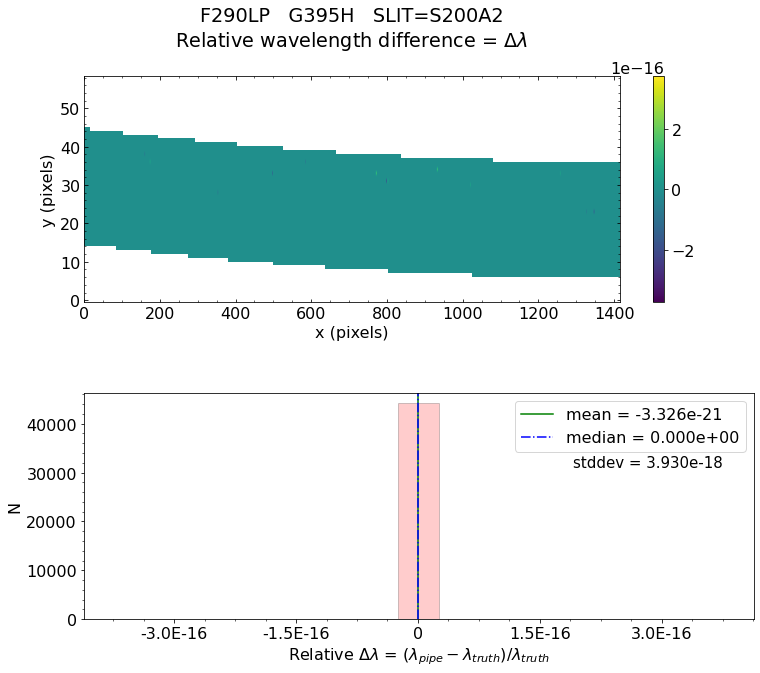

No output_directory was provided. Figures will NOT be saved.


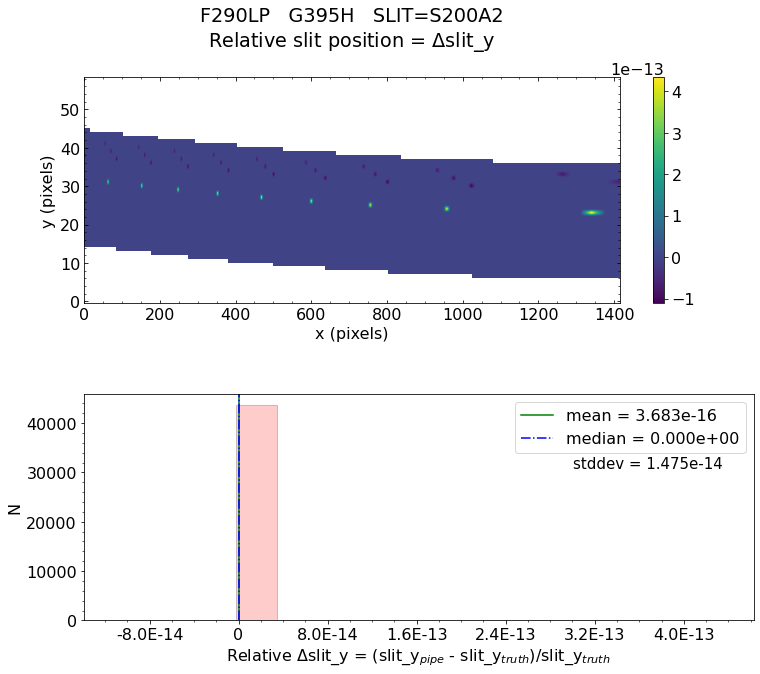

No output_directory was provided. Figures will NOT be saved.


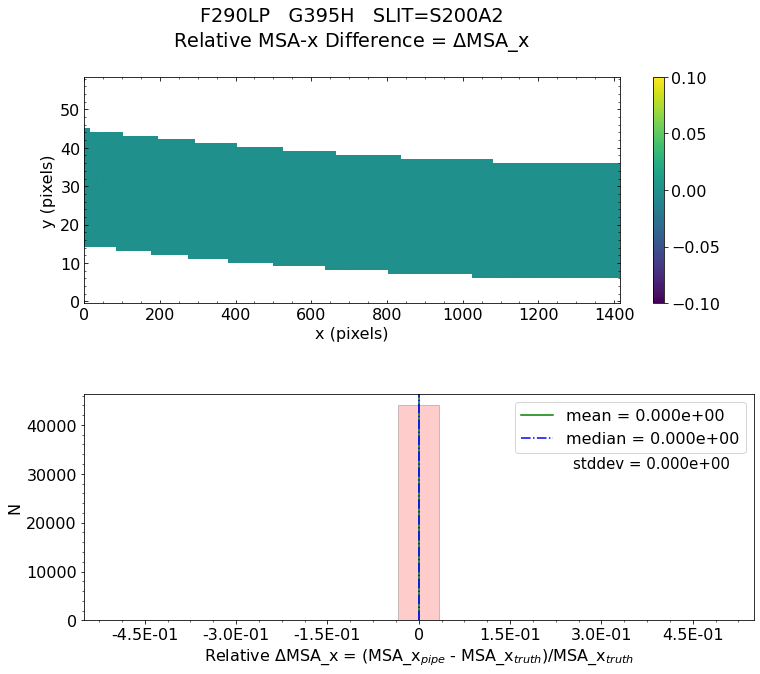

No output_directory was provided. Figures will NOT be saved.


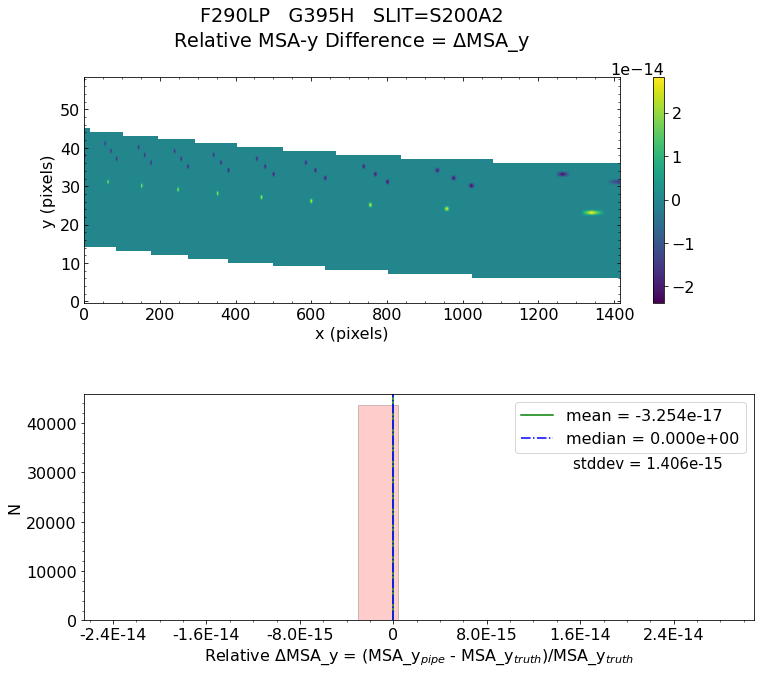

No output_directory was provided. Figures will NOT be saved.


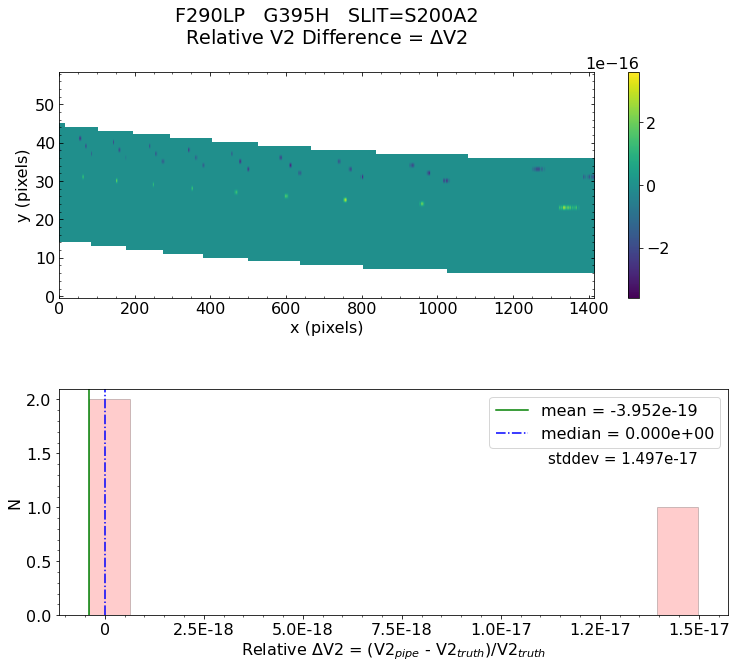

No output_directory was provided. Figures will NOT be saved.


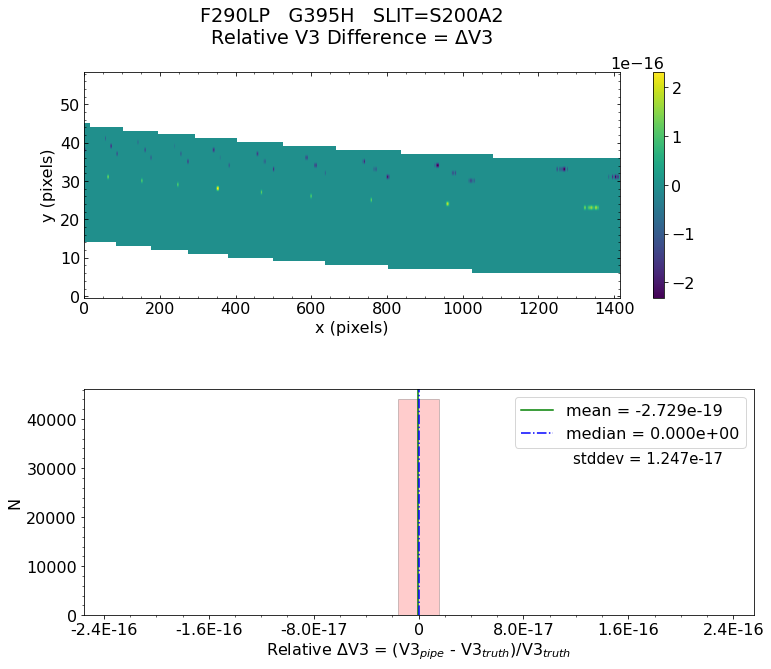


Working with slit: S400A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeWavelength Difference = 0.000e+00
    Minimum   RelativeWavelength Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  PASSED


   Relative Slit-Y Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeSlit-Y Difference = 0.000e+00
    Minimum   RelativeSlit-Y Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                 

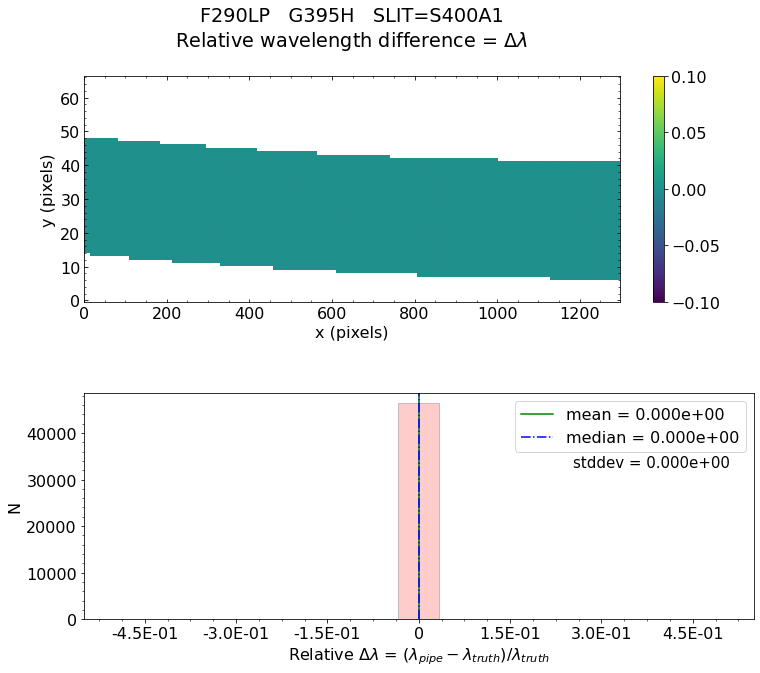

No output_directory was provided. Figures will NOT be saved.


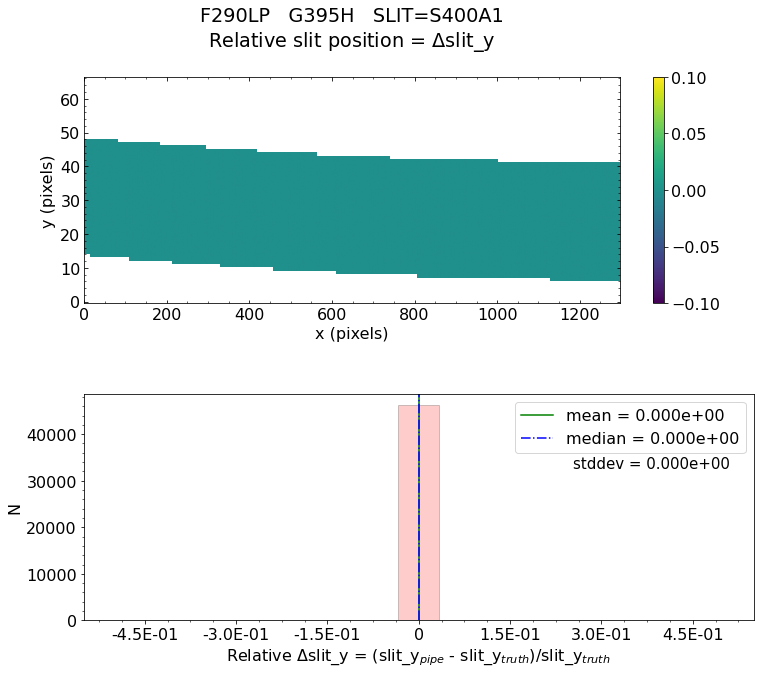

No output_directory was provided. Figures will NOT be saved.


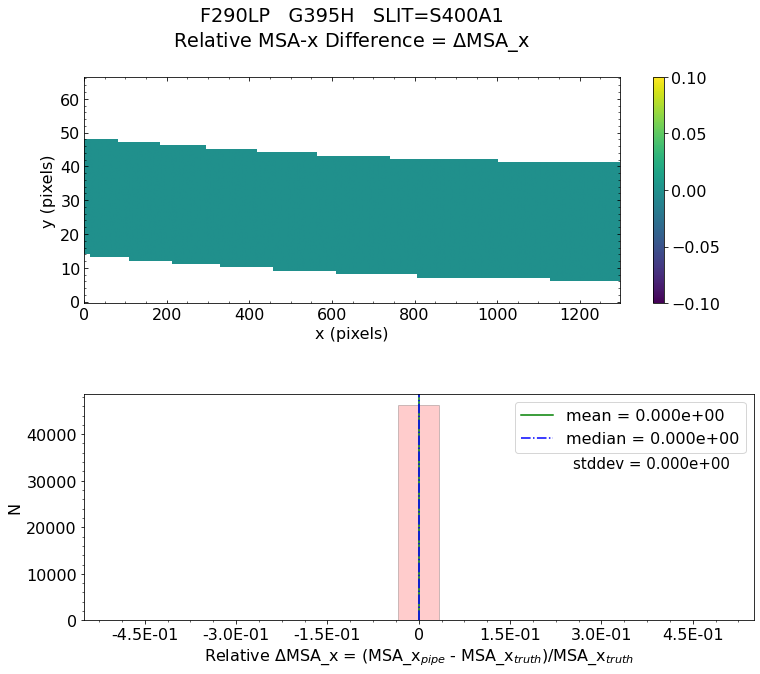

No output_directory was provided. Figures will NOT be saved.


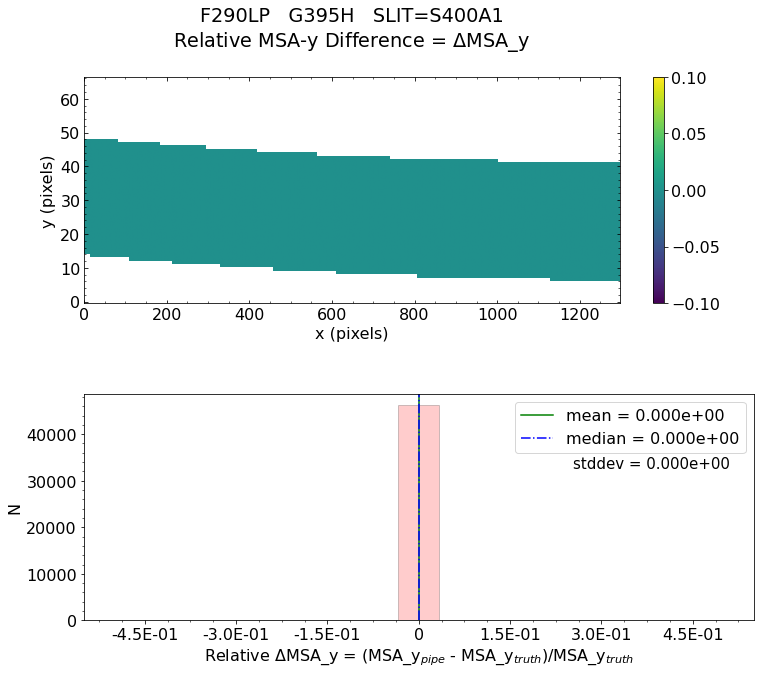

No output_directory was provided. Figures will NOT be saved.


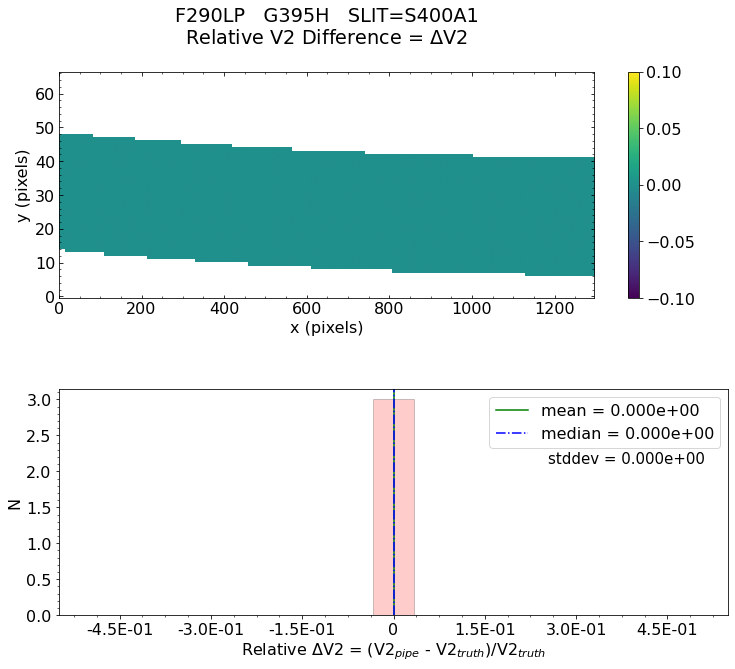

No output_directory was provided. Figures will NOT be saved.


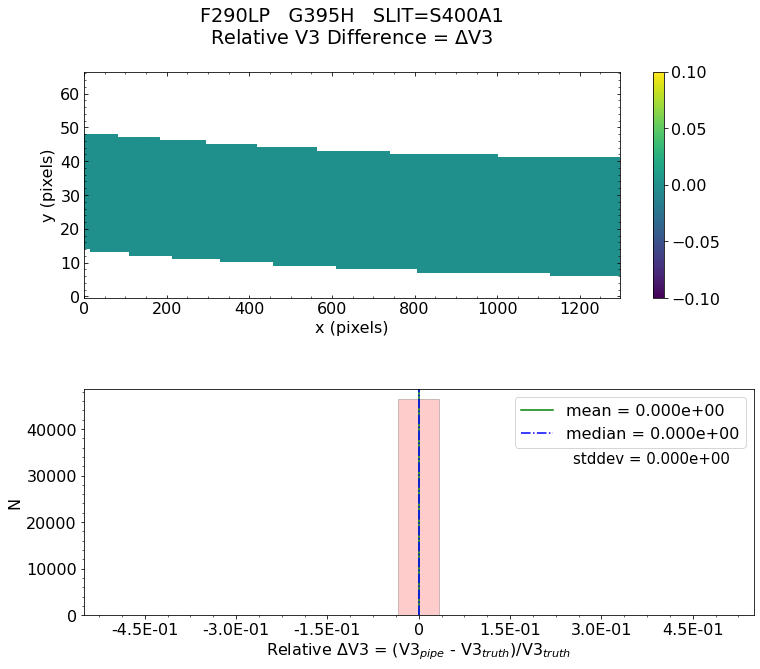


Working with slit: S1600A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = -7.278e-21    median = 0.000e+00    stdev = 1.017e-18
    Maximum   RelativeWavelength Difference = 0.000e+00
    Minimum   RelativeWavelength Difference = -1.423e-16
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  PASSED


   Relative Slit-Y Difference  :   mean = -1.965e-16    median = 0.000e+00    stdev = 4.887e-15
    Maximum   RelativeSlit-Y Difference = 0.000e+00
    Minimum   RelativeSlit-Y Difference = -1.815e-13
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
             

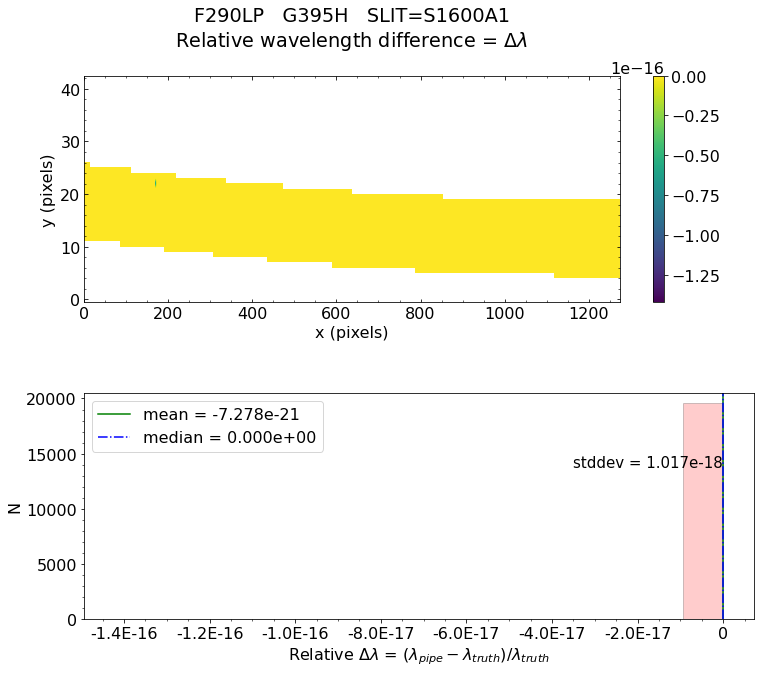

No output_directory was provided. Figures will NOT be saved.


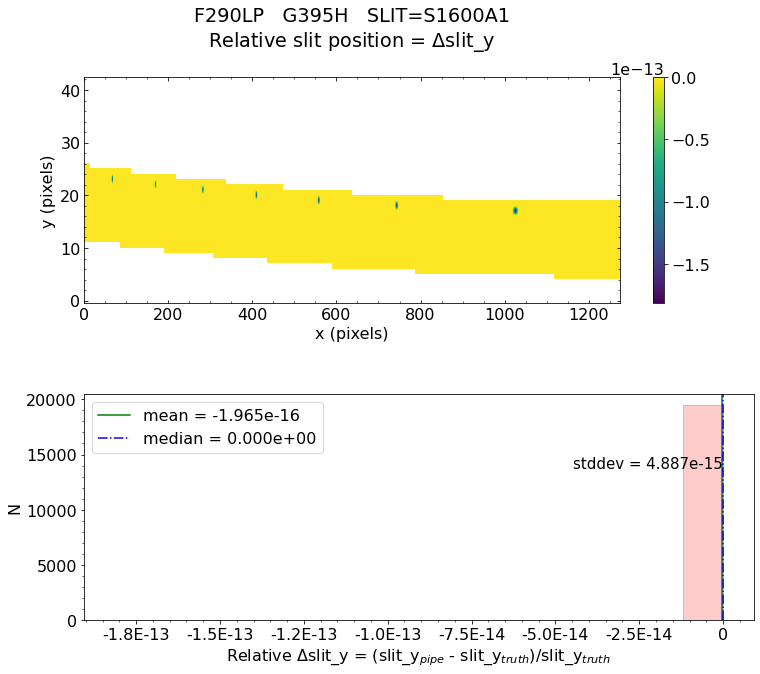

No output_directory was provided. Figures will NOT be saved.


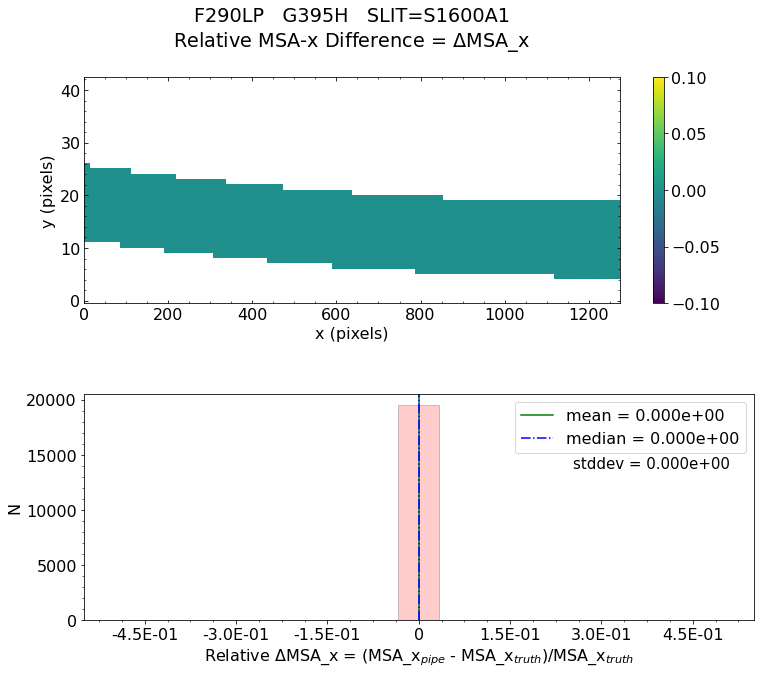

No output_directory was provided. Figures will NOT be saved.


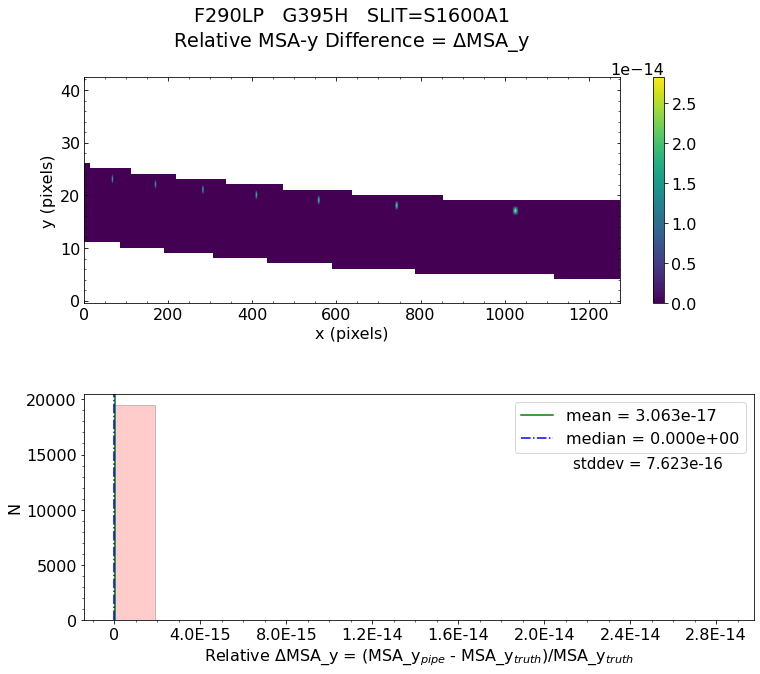

No output_directory was provided. Figures will NOT be saved.


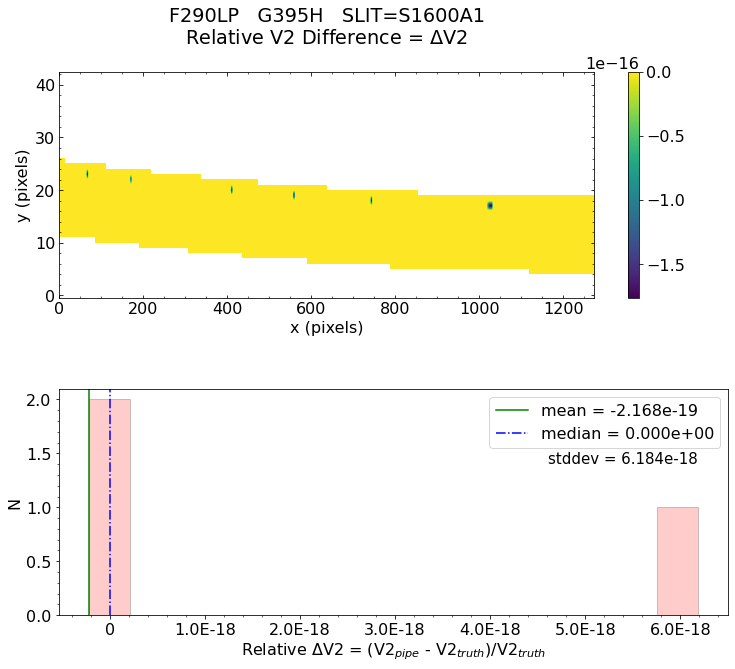

No output_directory was provided. Figures will NOT be saved.


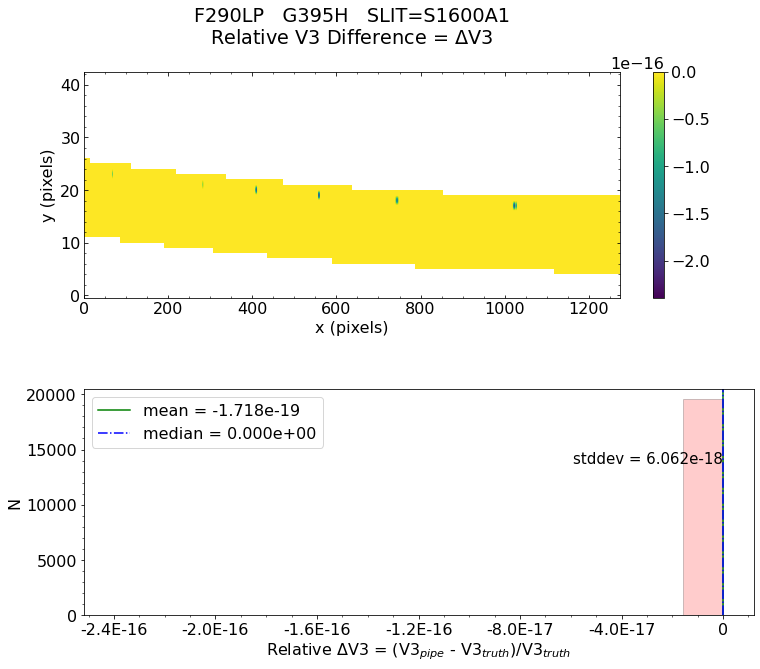


 * The test of V3 difference for slit S200A1 PASSED.

 * The test of V3 difference for slit S200A2 PASSED.

 * The test of V3 difference for slit S400A1 PASSED.

 * The test of V3 difference for slit S1600A1 PASSED.

 *** Final result for assign_wcs test will be reported as PASSED *** 

Did assign_wcs validation test passed?  PASSED 


Testing files for detector:  nrs2


Working with uncal_file:  fs_fullframe_g395h_f290lp_nrs2_uncal.fits


2021-03-12 23:51:33,475 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.


2021-03-12 23:51:33,477 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.


2021-03-12 23:51:33,477 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.


2021-03-12 23:51:33,478 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.


2021-03-12 23:51:33,479 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.


2021-03-12 23:51:33,480 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.


2021-03-12 23:51:33,481 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.


2021-03-12 23:51:33,482 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.


2021-03-12 23:51:33,483 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.


2021-03-12 23:51:33,484 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.


2021-03-12 23:51:33,485 - stpipe.Detector1Pipeline.linearity - INFO - LinearityStep instance created.


2021-03-12 23:51:33,486 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.


2021-03-12 23:51:33,487 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.


2021-03-12 23:51:33,488 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.


2021-03-12 23:51:33,489 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.


2021-03-12 23:51:33,490 - stpipe.Detector1Pipeline.ramp_fit - INFO - RampFitStep instance created.


2021-03-12 23:51:33,491 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.


Exception ignored in: <function DataModel.__del__ at 0x7f4033a6f040>
Traceback (most recent call last):
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 337, in __del__
    self.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 359, in close
    file_reference.decrement()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 1112, in decrement
    self._file.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/astropy/io/fits/hdu/hdulist.py", line 973, in close
    se

/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stpipe/step.py:359: ResourceWarning: unclosed file <_io.FileIO name='/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_fullframe_g395h_f290lp_nrs2_uncal.fits' mode='rb' closefd=True>
  gc.collect()
2021-03-12 23:51:33,646 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_fullframe_g395h_f290lp_nrs2_uncal.fits',).


2021-03-12 23:51:33,655 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'outp

2021-03-12 23:51:33,758 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'fs_fullframe_g395h_f290lp_nrs2_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']


2021-03-12 23:51:33,769 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_dark_0087.fits'.


2021-03-12 23:51:33,770 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_gain_0018.fits'.


2021-03-12 23:51:33,771 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_ipc_0012.fits'.


2021-03-12 23:51:33,773 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_linearity_0021.fits'.


2021-03-12 23:51:33,774 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_mask_0011.fits'.


2021-03-12 23:51:33,776 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSAT reference file is 'N/A'.


2021-03-12 23:51:33,777 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0017.fits'.


2021-03-12 23:51:33,780 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_refpix_0020.fits'.


2021-03-12 23:51:33,781 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is 'N/A'.


2021-03-12 23:51:33,781 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is 'N/A'.


2021-03-12 23:51:33,782 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_saturation_0021.fits'.


2021-03-12 23:51:33,783 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_superbias_0114.fits'.


2021-03-12 23:51:33,785 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.


2021-03-12 23:51:33,785 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPPARS reference file is 'N/A'.


2021-03-12 23:51:33,785 - stpipe.Detector1Pipeline - INFO - Starting calwebb_detector1 ...


2021-03-12 23:51:34,201 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:51:34,203 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:51:34,379 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed


2021-03-12 23:51:34,380 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped


2021-03-12 23:51:34,380 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done


2021-03-12 23:51:34,488 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:51:34,489 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:51:34,505 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /grp/crds/cache/references/jwst/jwst_nirspec_mask_0011.fits


2021-03-12 23:51:34,940 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init done


2021-03-12 23:51:35,049 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:51:35,051 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:51:35,067 - stpipe.Detector1Pipeline.saturation - INFO - Using SATURATION reference file /grp/crds/cache/references/jwst/jwst_nirspec_saturation_0021.fits


2021-03-12 23:51:36,023 - stpipe.Detector1Pipeline.saturation - INFO - Detected 6420 saturated pixels


2021-03-12 23:51:36,090 - stpipe.Detector1Pipeline.saturation - INFO - Detected 0 A/D floor pixels


2021-03-12 23:51:36,118 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation done


2021-03-12 23:51:36,257 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:51:36,258 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:51:36,274 - stpipe.Detector1Pipeline.ipc - INFO - Using IPC reference file /grp/crds/cache/references/jwst/jwst_nirspec_ipc_0012.fits


2021-03-12 23:51:37,096 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc done


2021-03-12 23:51:37,207 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:51:37,208 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:51:37,224 - stpipe.Detector1Pipeline.superbias - INFO - Using SUPERBIAS reference file /grp/crds/cache/references/jwst/jwst_nirspec_superbias_0114.fits


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/validate.py:34: ValidationWarning: While validating meta.exposure.readpatt the following error occurred:
'ALLIRS2' is not one of ['ACQ1', 'ACQ2', 'BRIGHT1', 'BRIGHT2', 'DEEP2', 'DEEP8', 'FAST', 'FASTGRPAVG', 'FASTGRPAVG8', 'FASTGRPAVG16', 'FASTGRPAVG32', 'FASTGRPAVG64', 'FASTR1', 'FASTR100', 'FGS', 'FGS60', 'FGS8370', 'FGS840', 'FGSRAPID', 'FINEGUIDE', 'ID', 'MEDIUM2', 'MEDIUM8', 'NIS', 'NISRAPID', 'NRS', 'NRSIRS2', 'NRSN16R4', 'NRSN32R8', 'NRSN8R2', 'NRSRAPID', 'NRSIRS2RAPID', 'NRSRAPIDD1', 'NRSRAPIDD2', 'NRSRAPIDD6', 'NRSSLOW', 'RAPID', 'SHALLOW2', 'SHALLOW4', 'SLOW', 'SLOWR1', 'TRACK', 'ANY', 'N/A']

Failed validating 'enum' in schema:
    OrderedDict([('title', 'Readout pattern'),
                 ('type', 'string'),
                 ('enum',
                  ['ACQ1',
                   'ACQ2',
                   'BRIGHT1',


2021-03-12 23:51:37,606 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias done


2021-03-12 23:51:37,741 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:51:37,742 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}


2021-03-12 23:51:37,759 - stpipe.Detector1Pipeline.refpix - INFO - Using refpix reference file: /grp/crds/cache/references/jwst/jwst_nirspec_refpix_0020.fits


2021-03-12 23:52:00,756 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix done


2021-03-12 23:52:01,002 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:52:01,003 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:52:01,021 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_nirspec_linearity_0021.fits


2021-03-12 23:52:01,719 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done


2021-03-12 23:52:01,865 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:52:01,866 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'dark_output': None}


2021-03-12 23:52:01,884 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /grp/crds/cache/references/jwst/jwst_nirspec_dark_0087.fits


2021-03-12 23:52:05,482 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=1, ngroups=7, nframes=1, groupgap=0


2021-03-12 23:52:05,483 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data nints=1, ngroups=65, nframes=1, groupgap=0


2021-03-12 23:52:06,005 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current done


2021-03-12 23:52:06,530 - stpipe.Detector1Pipeline.jump - INFO - Step jump running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:52:06,531 - stpipe.Detector1Pipeline.jump - INFO - Step jump parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'rejection_threshold': 4.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 200.0, 'min_jump_to_flag_neighbors': 10.0}


2021-03-12 23:52:06,540 - stpipe.Detector1Pipeline.jump - INFO - CR rejection threshold = 4 sigma


2021-03-12 23:52:06,550 - stpipe.Detector1Pipeline.jump - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0018.fits


2021-03-12 23:52:06,593 - stpipe.Detector1Pipeline.jump - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0017.fits


2021-03-12 23:52:06,628 - stpipe.Detector1Pipeline.jump - INFO - Found 32 possible cores to use for jump detection 


2021-03-12 23:52:06,795 - stpipe.Detector1Pipeline.jump - INFO - Executing two-point difference method


2021-03-12 23:52:07,048 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:


2021-03-12 23:52:08,424 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 52845 pixels with at least one CR


2021-03-12 23:52:09,933 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 3.13757 sec


2021-03-12 23:52:09,934 - stpipe.Detector1Pipeline.jump - INFO - The execution time in seconds: 3.394687


2021-03-12 23:52:09,936 - stpipe.Detector1Pipeline.jump - INFO - Step jump done


2021-03-12 23:52:10,060 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit running with args (<RampModel(1, 7, 3200, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:52:10,061 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'int_name': '', 'save_opt': False, 'opt_name': '', 'maximum_cores': 'none'}


2021-03-12 23:52:10,086 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0017.fits


2021-03-12 23:52:10,120 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0018.fits


2021-03-12 23:52:10,154 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols


2021-03-12 23:52:10,154 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


2021-03-12 23:52:38,998 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7


2021-03-12 23:52:38,998 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1


2021-03-12 23:52:39,125 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done


2021-03-12 23:52:39,273 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(2048, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:52:39,275 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:52:39,324 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-12 23:52:39,325 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-12 23:52:39,326 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-12 23:52:39,434 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(1, 2048, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:52:39,435 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:52:39,484 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-12 23:52:39,484 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-12 23:52:39,485 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-12 23:52:39,486 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1


2021-03-12 23:52:39,487 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


2021-03-12 23:52:39,495 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.


2021-03-12 23:52:39,610 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<ImageModel(2048, 2048) from fs_fullframe_g395h_f290lp_nrs2_uncal.fits>,).


2021-03-12 23:52:39,611 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}


2021-03-12 23:52:39,739 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.1448970586061478 deg


2021-03-12 23:52:39,739 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3232757747173309 deg


2021-03-12 23:52:39,740 - stpipe.AssignWcsStep - INFO - theta_y correction: -3.766823889842878e-13 deg


2021-03-12 23:52:39,741 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-12 23:52:39,941 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS2: ['S200A1', 'S200A2', 'S400A1', 'S1600A1', 'S200B1']


2021-03-12 23:52:39,941 - stpipe.AssignWcsStep - INFO - Computing WCS for 5 open slitlets


2021-03-12 23:52:39,952 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.1448970586061478 deg


2021-03-12 23:52:39,952 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3232757747173309 deg


2021-03-12 23:52:39,953 - stpipe.AssignWcsStep - INFO - theta_y correction: -3.766823889842878e-13 deg


2021-03-12 23:52:39,953 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-12 23:52:39,960 - stpipe.AssignWcsStep - INFO - SPORDER= -1, wrange=[2.87e-06, 5.27e-06]


2021-03-12 23:52:40,048 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 1


2021-03-12 23:52:40,048 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 2


2021-03-12 23:52:40,048 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 3


2021-03-12 23:52:40,049 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 4


2021-03-12 23:52:40,049 - stpipe.AssignWcsStep - INFO - There are 5 open slits in quadrant 5


2021-03-12 23:52:40,185 - stpipe.AssignWcsStep - INFO - Created a NIRSPEC nrs_fixedslit pipeline with references {'distortion': None, 'filteroffset': None, 'specwcs': None, 'regions': None, 'wavelengthrange': '/grp/crds/cache/references/jwst/jwst_nirspec_wavelengthrange_0004.asdf', 'camera': '/grp/crds/cache/references/jwst/jwst_nirspec_camera_0004.asdf', 'collimator': '/grp/crds/cache/references/jwst/jwst_nirspec_collimator_0004.asdf', 'disperser': '/grp/crds/cache/references/jwst/jwst_nirspec_disperser_0035.asdf', 'fore': '/grp/crds/cache/references/jwst/jwst_nirspec_fore_0022.asdf', 'fpa': '/grp/crds/cache/references/jwst/jwst_nirspec_fpa_0005.asdf', 'msa': '/grp/crds/cache/references/jwst/jwst_nirspec_msa_0005.asdf', 'ote': '/grp/crds/cache/references/jwst/jwst_nirspec_ote_0005.asdf', 'ifupost': None, 'ifufore': None, 'ifuslicer': None}


2021-03-12 23:52:40,331 - stpipe.AssignWcsStep - INFO - COMPLETED assign_wcs


2021-03-12 23:52:40,334 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done


Running test for FS...
Information from the 'truth' (or comparison) file 
Filename: /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_fullframe_g395h_f290lp_nrs2_assign_wcs_truth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   ()      
  1  SCI           1 ImageHDU        51   (2048, 2048)   float32   
  2  ERR           1 ImageHDU        10   (2048, 2048)   float32   
  3  DQ            1 ImageHDU        11   (2048, 2048)   int32 (rescales to uint32)   
  4  VAR_POISSON    1 ImageHDU         9   (2048, 2048)   float32   
  5  VAR_RNOISE    1 ImageHDU         9   (2048, 2048)   float32   
  6  ASDF          1 BinTableHDU     11   1R x 1C   [210572B]   


None


Comparing to ST 'truth' file.
from assign_wcs file  -->     Detector: NRS2   Grating: G395H   Filter: F290LP   Lamp: LINE3
GWA_XTILT: 0.3232757747173309
GWA_YTILT: 0.1448970586061478
GWA_TTILT: 37.16754109485964

Working with slit: S200A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeWavelength Difference = 0.000e+00
    Minimum   RelativeWavelength Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  PASSED


   Relative Slit-Y Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeSlit-Y Difference = 0.000e+00
    Minimum   RelativeSlit-Y Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                 

/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/geometry.py:203: RuntimeWarning: invalid value encountered in remainder
  lon = np.mod(lon, 360.0 * u.deg if nquant else 360.0)



   Relative V2 difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeV2 difference = 0.000e+00
    Minimum   RelativeV2 difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for V2 difference:  PASSED


   Relative V3 difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeV3 difference = -0.000e+00
    Minimum   RelativeV3 difference = -0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for V3 difference:  PASSED

No output_directory was provided. Figures will be saved in current worki

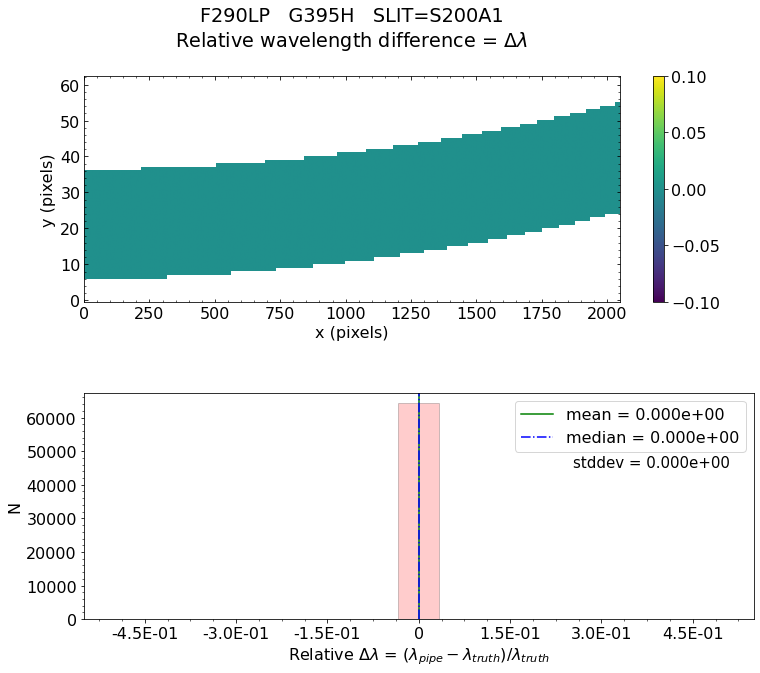

No output_directory was provided. Figures will NOT be saved.


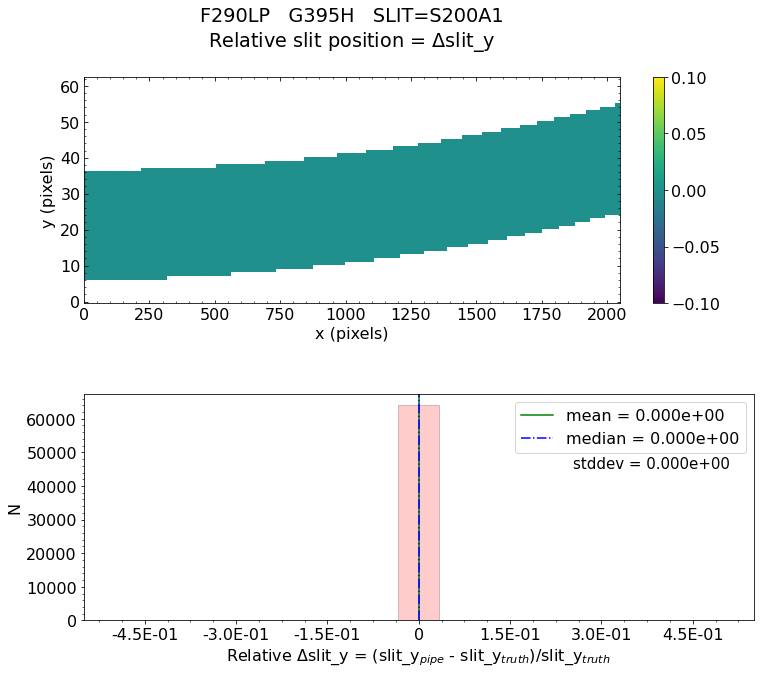

No output_directory was provided. Figures will NOT be saved.


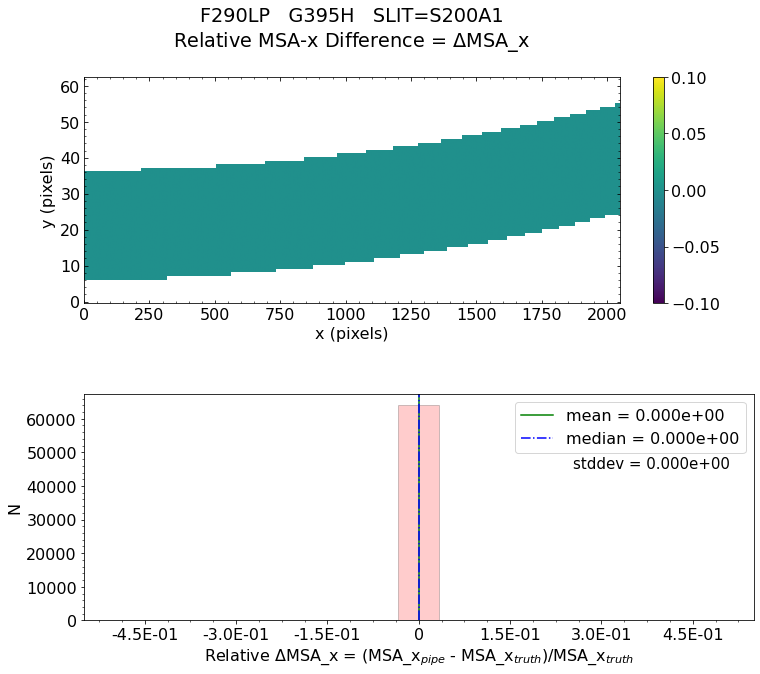

No output_directory was provided. Figures will NOT be saved.


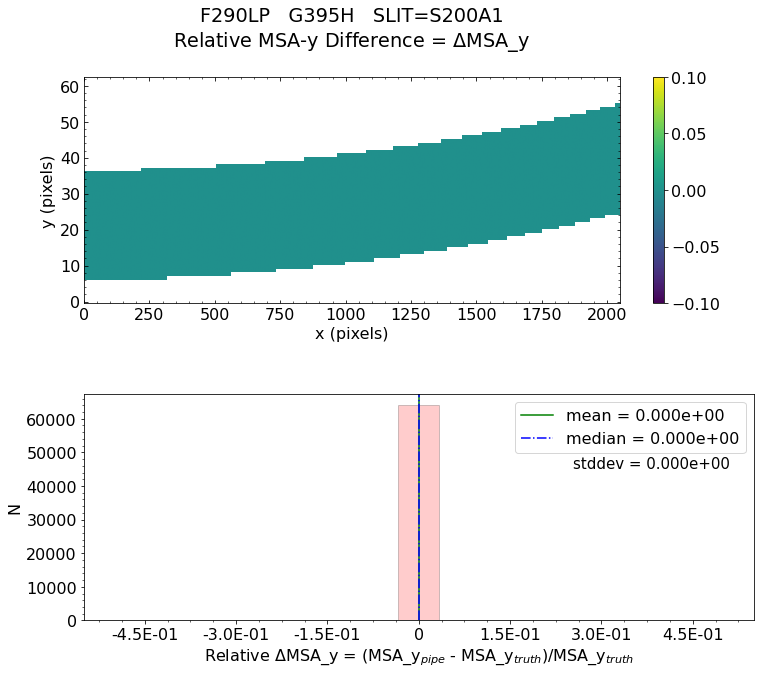

No output_directory was provided. Figures will NOT be saved.


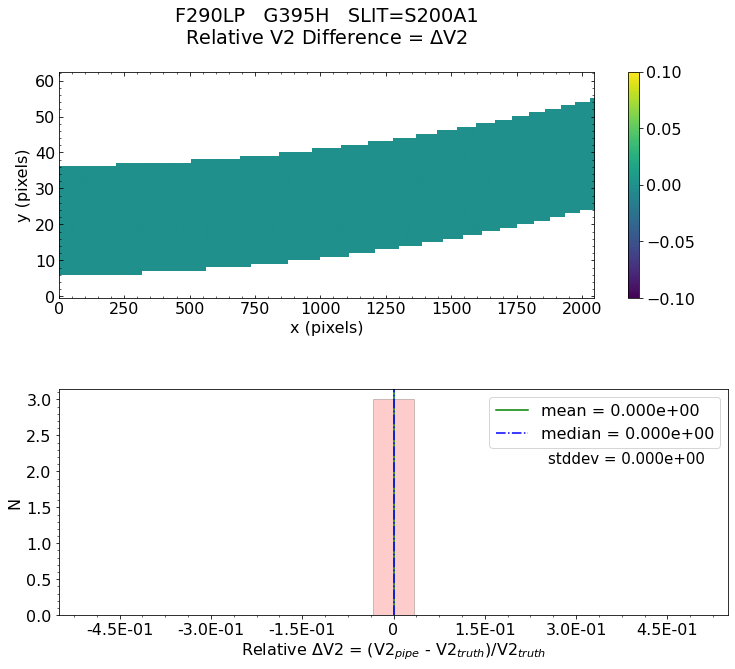

No output_directory was provided. Figures will NOT be saved.


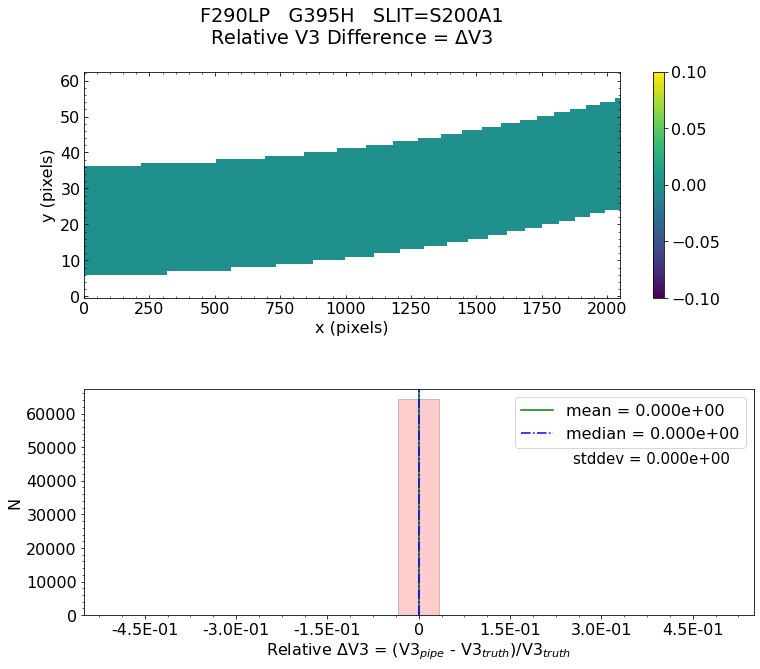


Working with slit: S200A2


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = 3.510e-21    median = 0.000e+00    stdev = 2.294e-18
    Maximum   RelativeWavelength Difference = 3.930e-16
    Minimum   RelativeWavelength Difference = -2.038e-16
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  PASSED


   Relative Slit-Y Difference  :   mean = 1.674e-16    median = 0.000e+00    stdev = 1.221e-14
    Maximum   RelativeSlit-Y Difference = 4.329e-13
    Minimum   RelativeSlit-Y Difference = -1.109e-13
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
               


   Relative V2 difference  :   mean = -4.643e-19    median = 0.000e+00    stdev = 1.375e-17
    Maximum   RelativeV2 difference = 3.609e-16
    Minimum   RelativeV2 difference = -3.604e-16
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for V2 difference:  PASSED


   Relative V3 difference  :   mean = -3.407e-19    median = 0.000e+00    stdev = 1.236e-17
    Maximum   RelativeV3 difference = 2.322e-16
    Minimum   RelativeV3 difference = -2.320e-16
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for V3 difference:  PASSED

No output_directory was provided. Figures will be saved in current wor

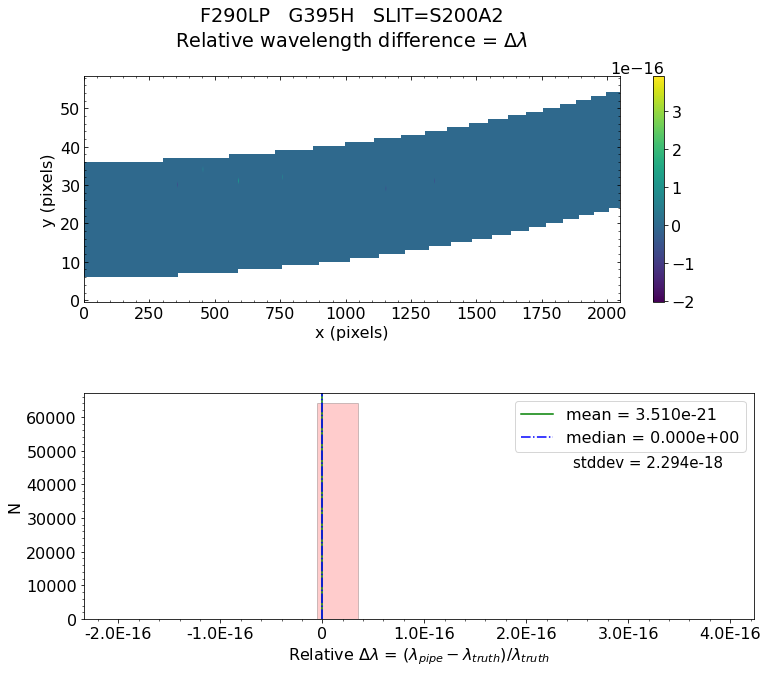

No output_directory was provided. Figures will NOT be saved.


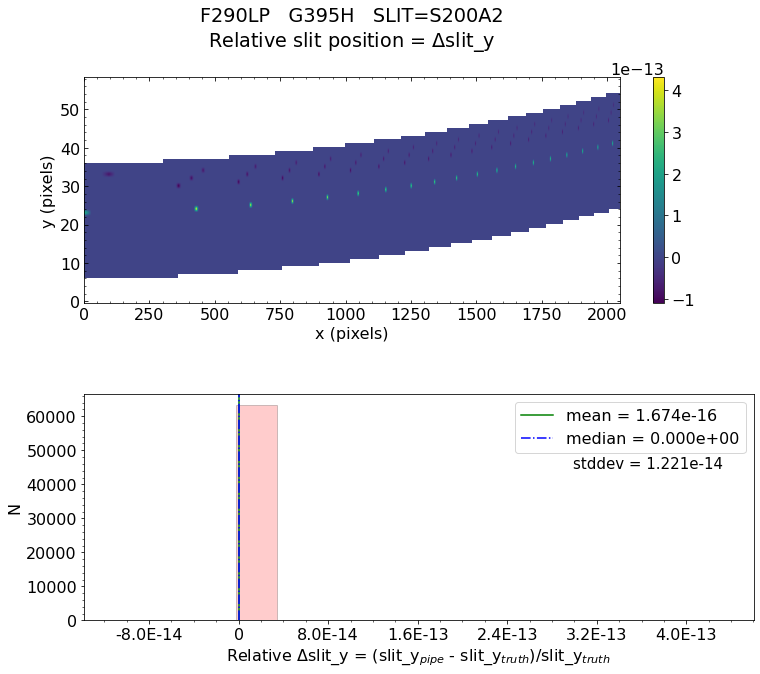

No output_directory was provided. Figures will NOT be saved.


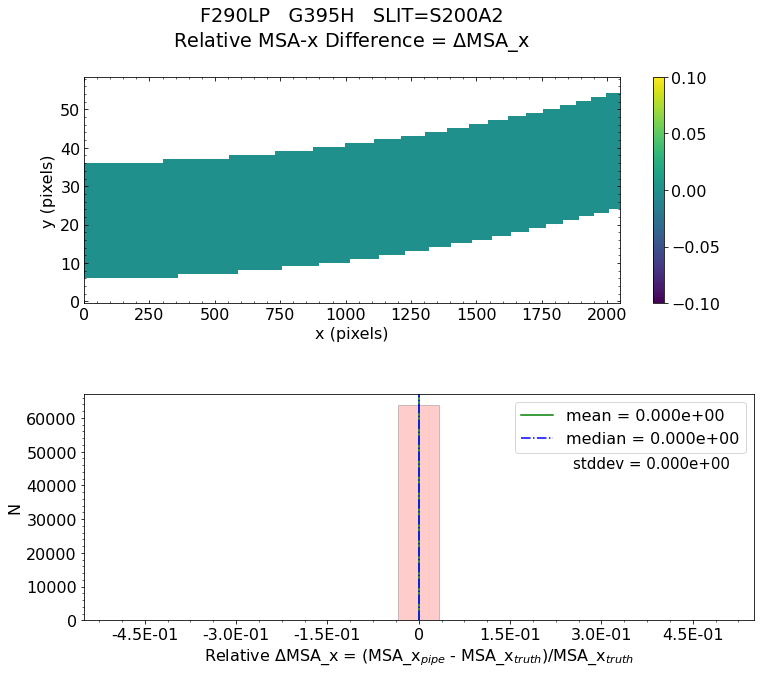

No output_directory was provided. Figures will NOT be saved.


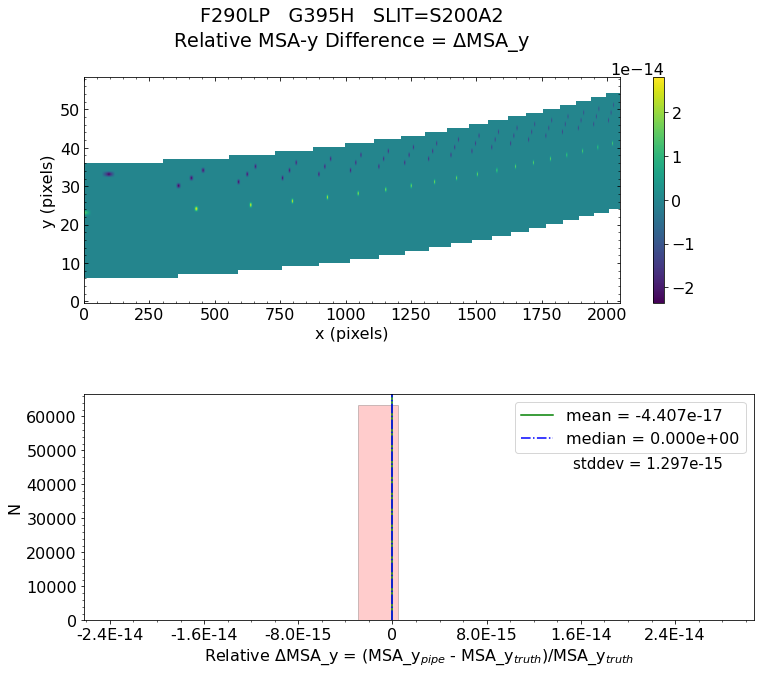

No output_directory was provided. Figures will NOT be saved.


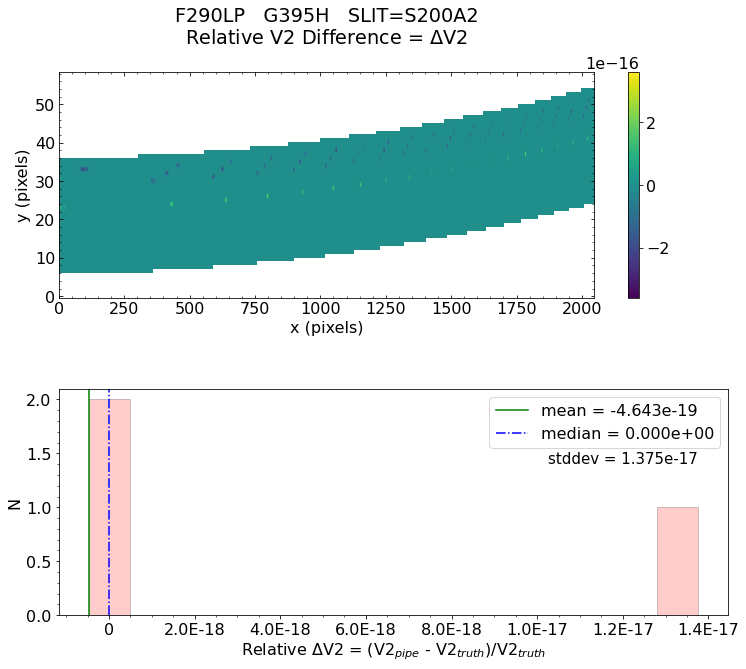

No output_directory was provided. Figures will NOT be saved.


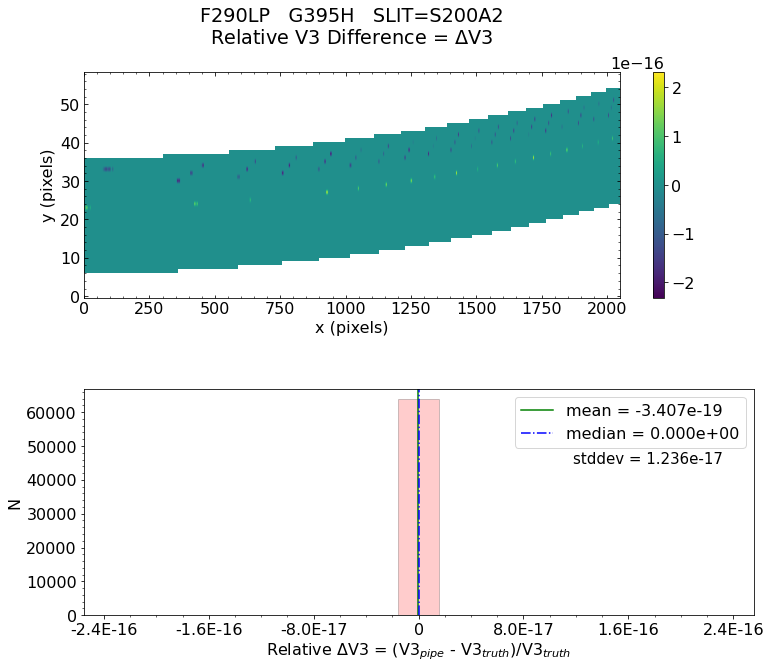


Working with slit: S400A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeWavelength Difference = 0.000e+00
    Minimum   RelativeWavelength Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  PASSED


   Relative Slit-Y Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeSlit-Y Difference = 0.000e+00
    Minimum   RelativeSlit-Y Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                 


   Relative MSA_X Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeMSA_X Difference = 0.000e+00
    Minimum   RelativeMSA_X Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for MSA_X Difference:  PASSED


   Relative MSA_Y Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeMSA_Y Difference = 0.000e+00
    Minimum   RelativeMSA_Y Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for MSA_Y Difference:  PASSED


   Relative V2 difference  :   mean = 0.000e+00  

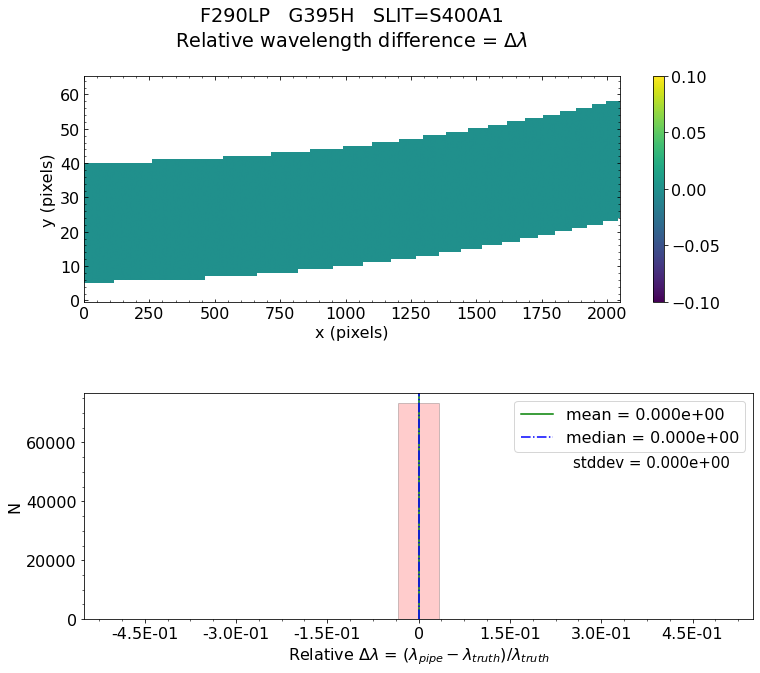

No output_directory was provided. Figures will NOT be saved.


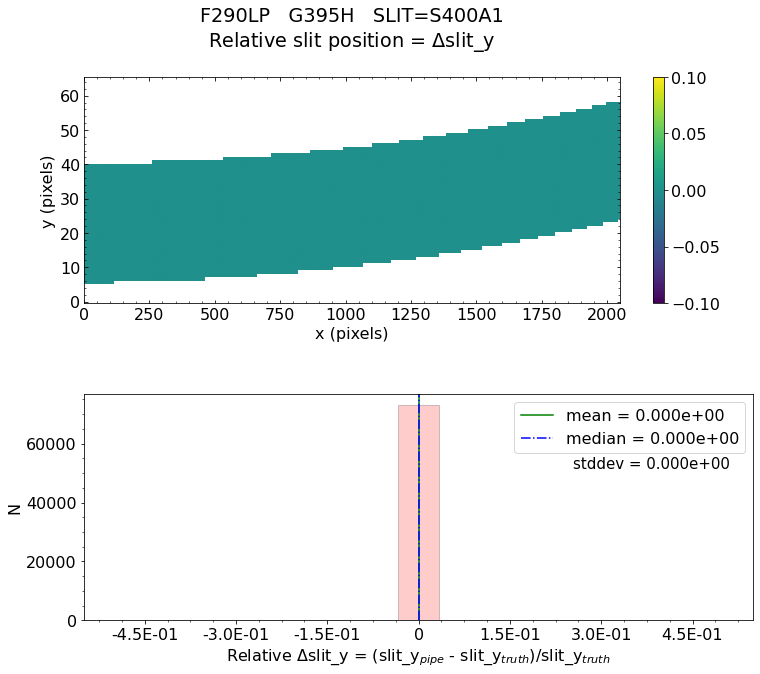

No output_directory was provided. Figures will NOT be saved.


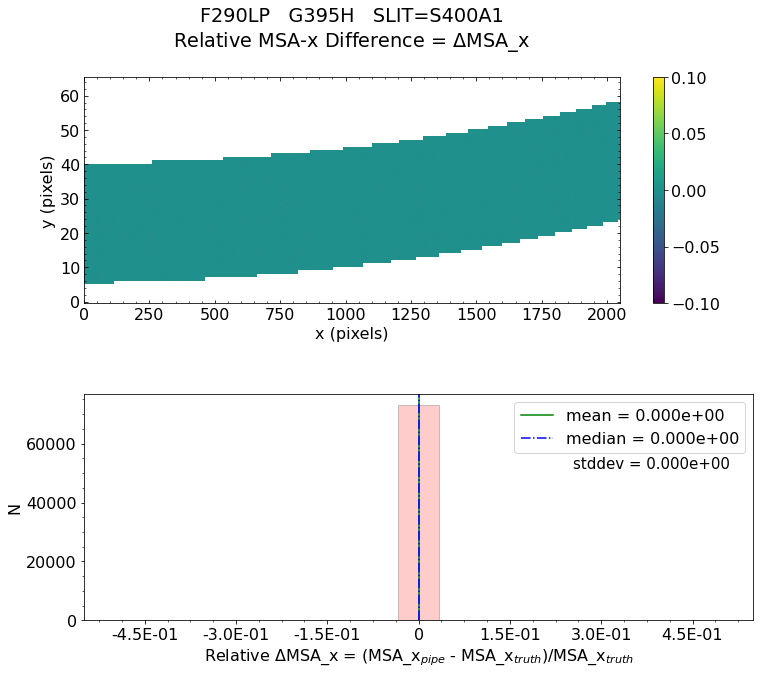

No output_directory was provided. Figures will NOT be saved.


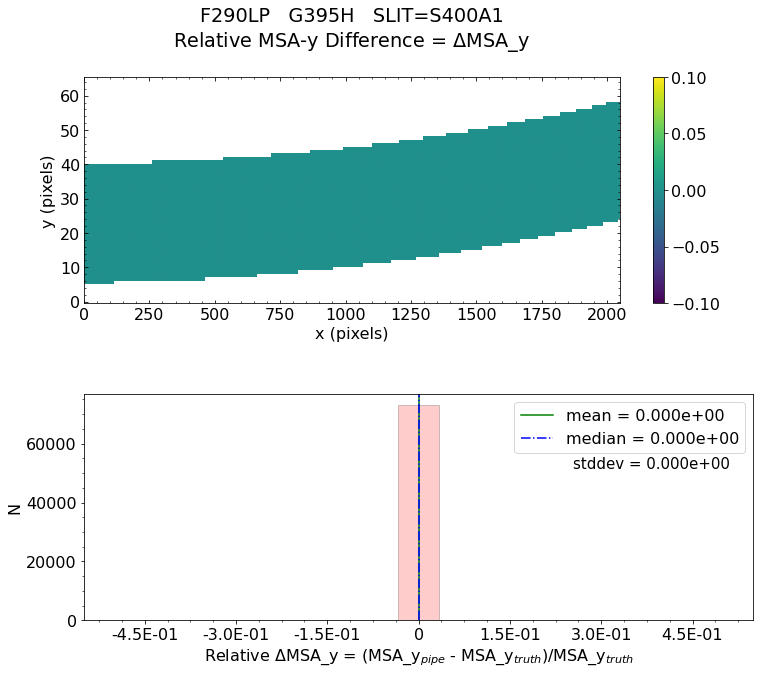

No output_directory was provided. Figures will NOT be saved.


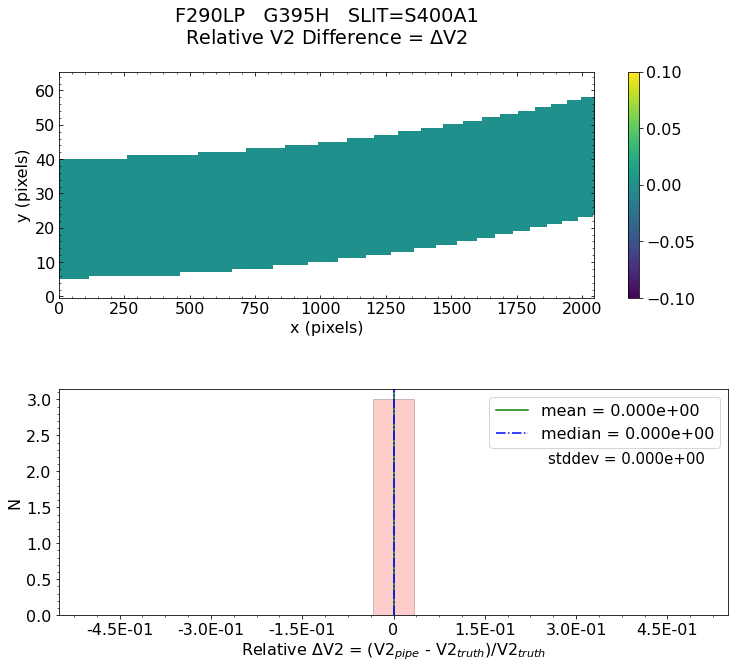

No output_directory was provided. Figures will NOT be saved.


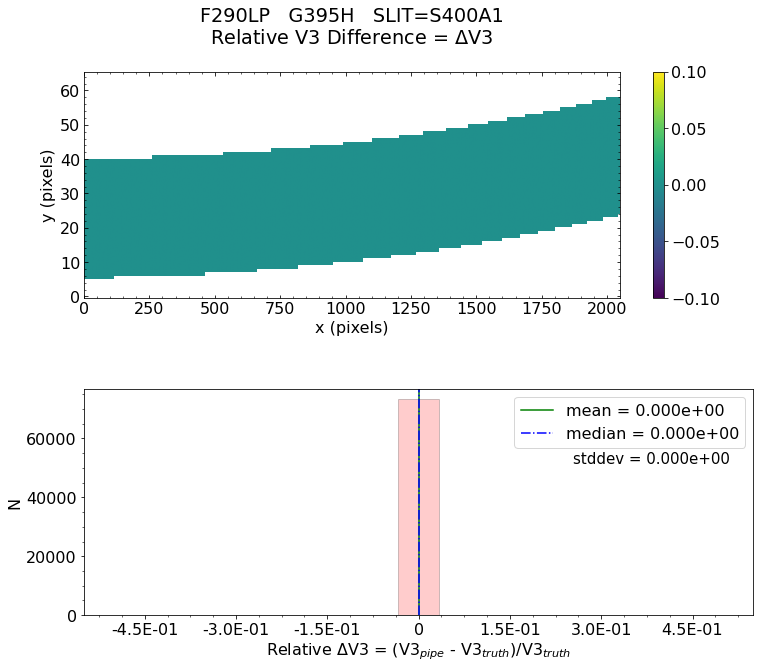


Working with slit: S1600A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = 2.446e-20    median = 0.000e+00    stdev = 2.682e-18
    Maximum   RelativeWavelength Difference = 3.954e-16
    Minimum   RelativeWavelength Difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  PASSED


   Relative Slit-Y Difference  :   mean = -2.046e-16    median = 0.000e+00    stdev = 5.017e-15
    Maximum   RelativeSlit-Y Difference = 0.000e+00
    Minimum   RelativeSlit-Y Difference = -1.800e-13
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
               


    Maximum   RelativeV3 difference = -0.000e+00
    Minimum   RelativeV3 difference = -2.398e-16
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for V3 difference:  PASSED

No output_directory was provided. Figures will be saved in current working directory:
/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/S1600A1_NRS2_rel_wave_diffs.png



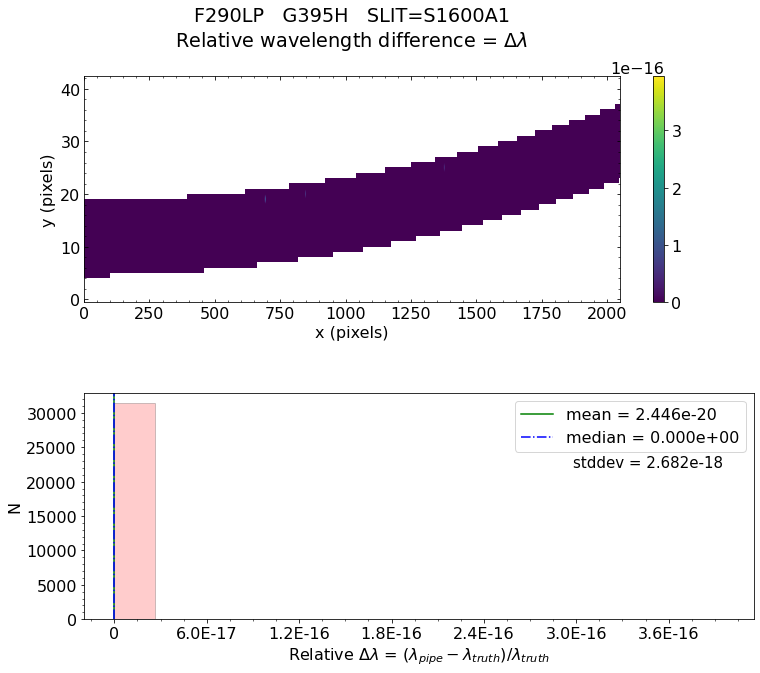

No output_directory was provided. Figures will NOT be saved.


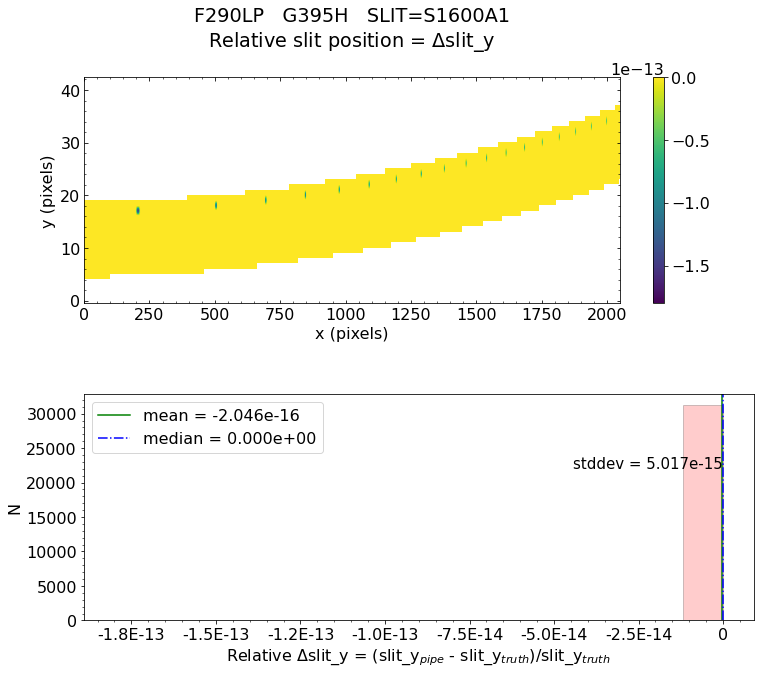

No output_directory was provided. Figures will NOT be saved.


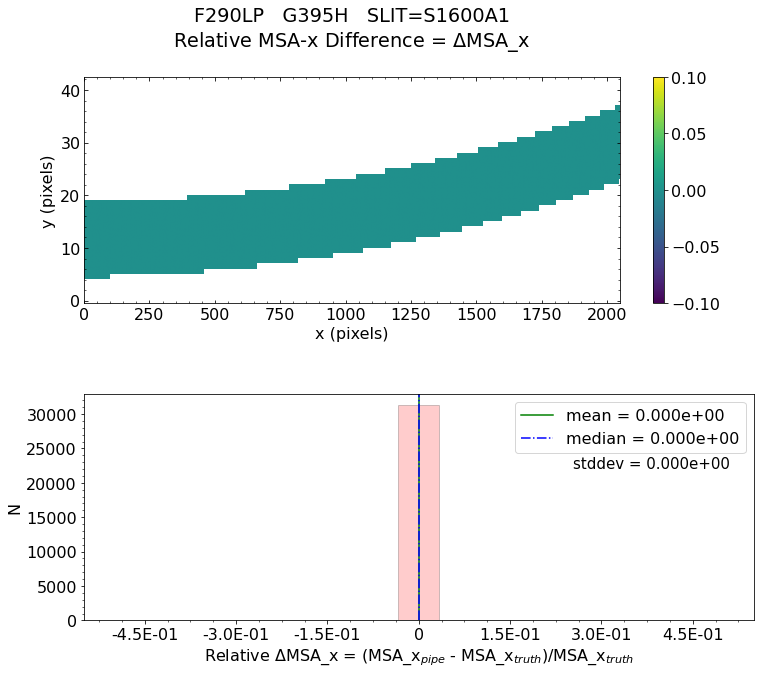

No output_directory was provided. Figures will NOT be saved.


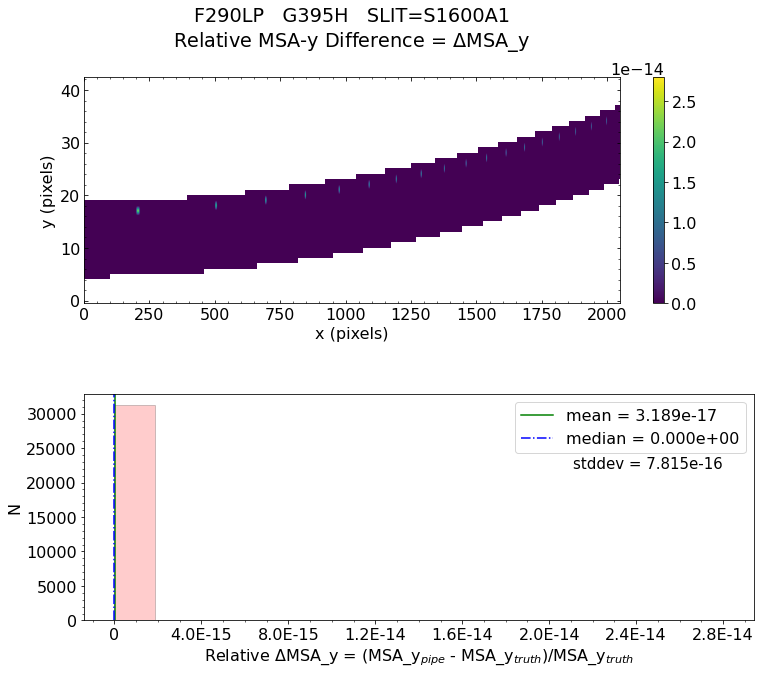

No output_directory was provided. Figures will NOT be saved.


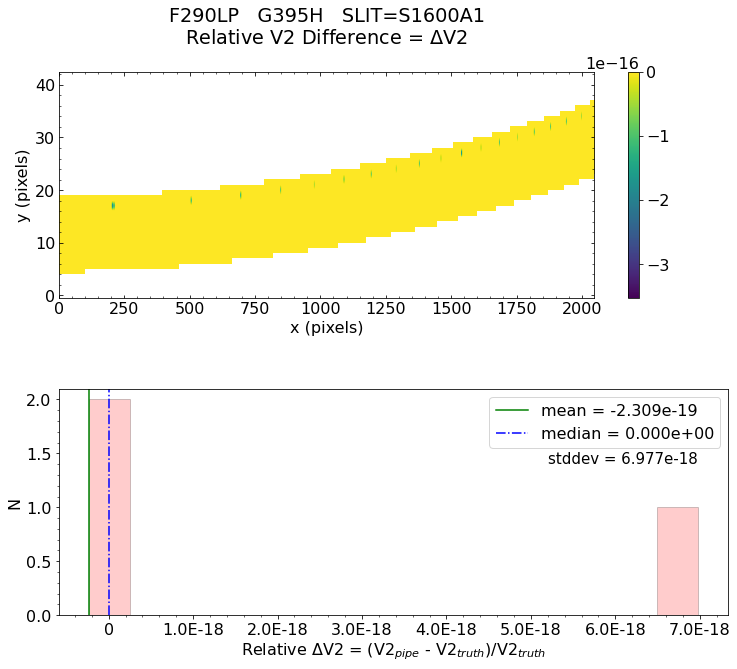

No output_directory was provided. Figures will NOT be saved.


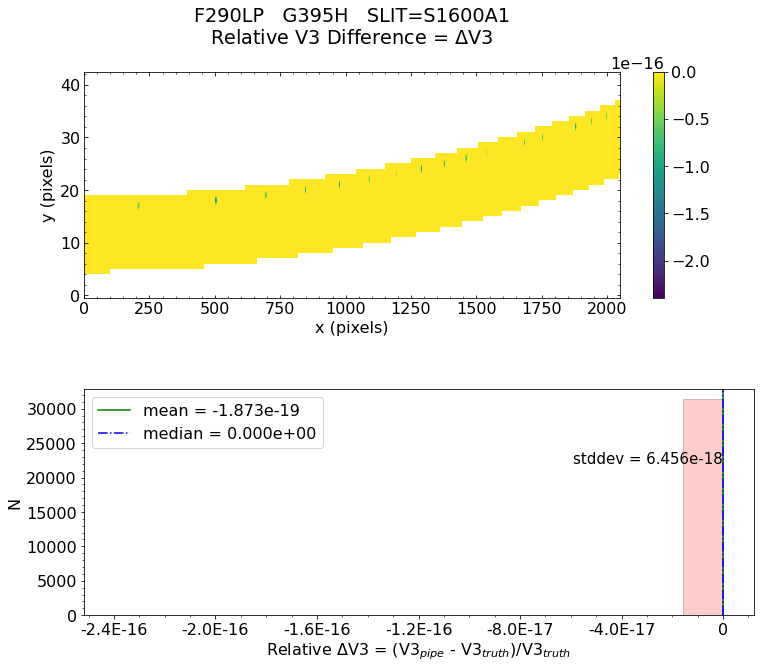


Working with slit: S200B1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = -1.868e-20    median = 0.000e+00    stdev = 3.036e-18
    Maximum   RelativeWavelength Difference = 2.711e-16
    Minimum   RelativeWavelength Difference = -3.438e-16
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Wavelength Difference:  PASSED




   Relative Slit-Y Difference  :   mean = -1.139e-15    median = 0.000e+00    stdev = 3.079e-14
    Maximum   RelativeSlit-Y Difference = 1.433e-13
    Minimum   RelativeSlit-Y Difference = -1.097e-12
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for Slit-Y Difference:  PASSED


   Relative MSA_X Difference  :   mean = 0.000e+00    median = 0.000e+00    stdev = 0.000e+00
    Maximum   RelativeMSA_X Difference = -0.000e+00
    Minimum   RelativeMSA_X Difference = -0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

 * Result of the test for MSA_X Difference:  PASSED


   Relative MSA_Y Difference  :   mean = 


   Relative V2 difference  :   mean = 4.960e-19    median = 0.000e+00    stdev = 1.016e-17
    Maximum   RelativeV2 difference = 3.873e-16
    Minimum   RelativeV2 difference = 0.000e+00
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%

Converting pipeline results to degrees to compare with truth file

   Relative V2 difference  :   mean = -9.997e-01    median = -9.997e-01    stdev = 7.091e-17
    Maximum   RelativeV2 difference = -9.997e-01
    Minimum   RelativeV2 difference = -9.997e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 100%
                            ->  3xtheshold = 100%
                            ->  5xtheshold = 100%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING

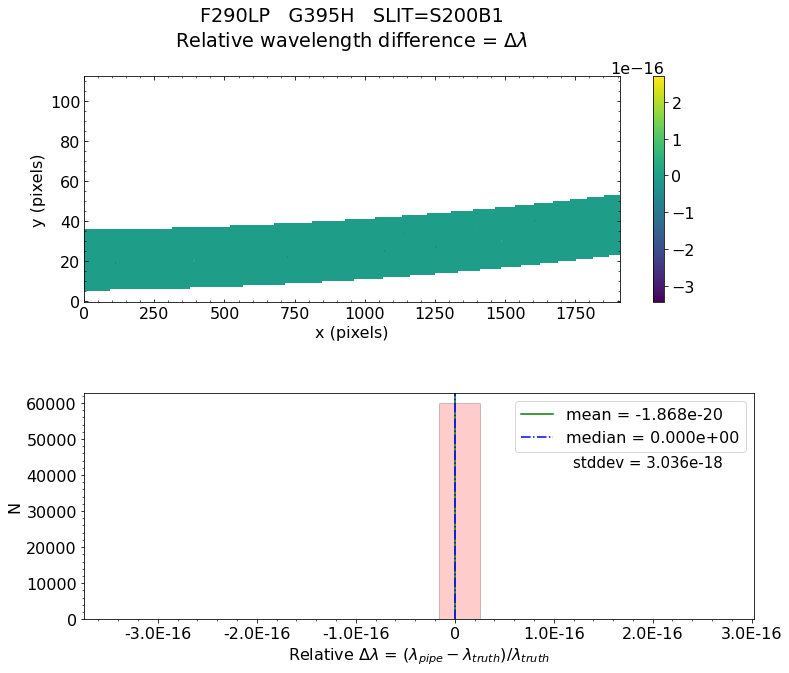

No output_directory was provided. Figures will NOT be saved.


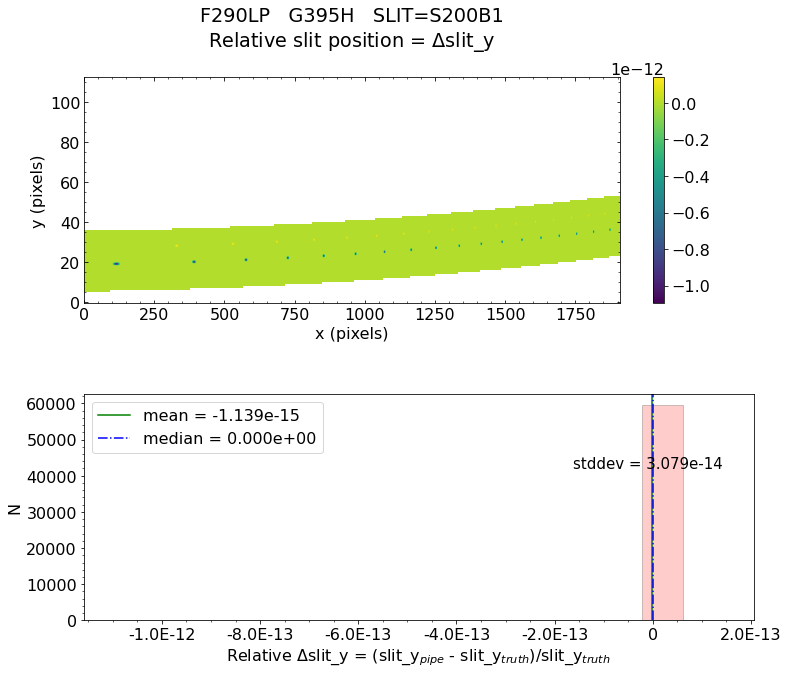

No output_directory was provided. Figures will NOT be saved.


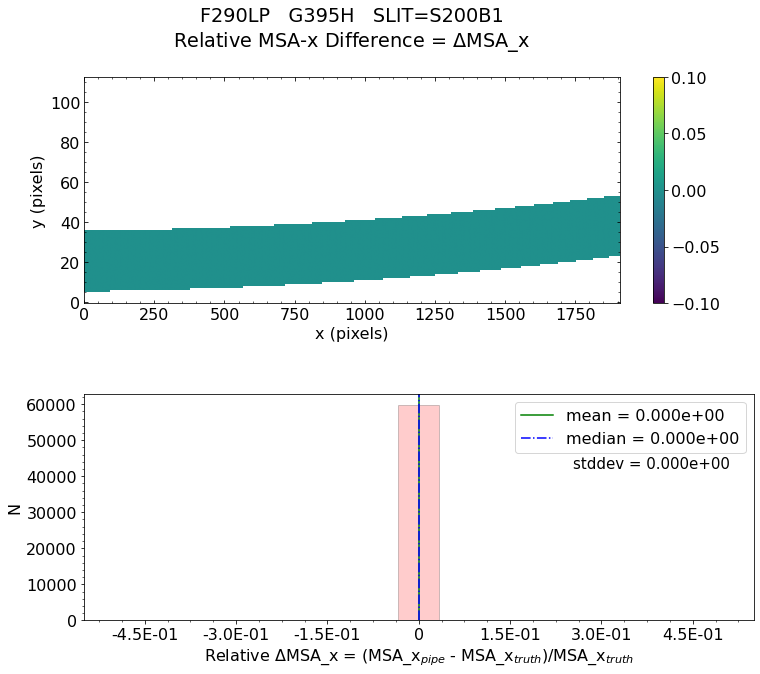

No output_directory was provided. Figures will NOT be saved.


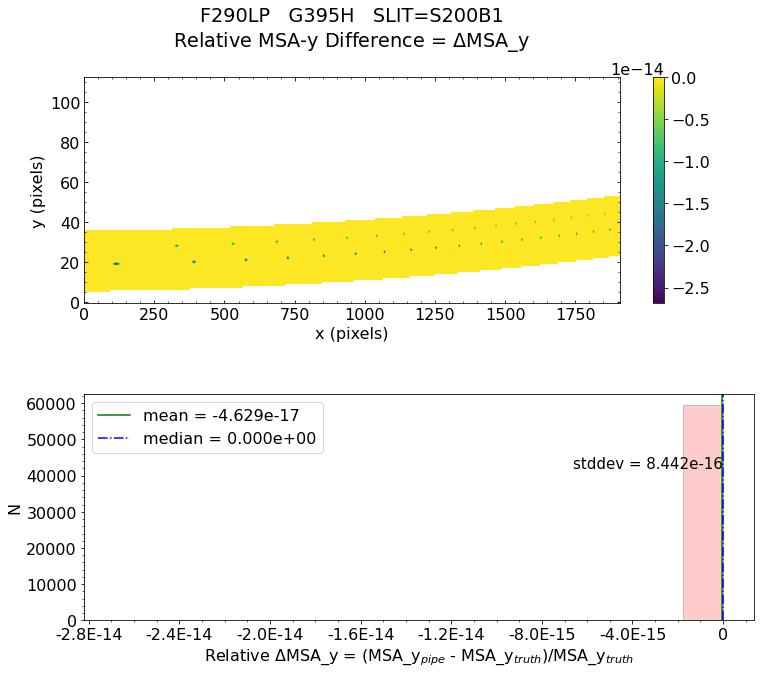

No output_directory was provided. Figures will NOT be saved.


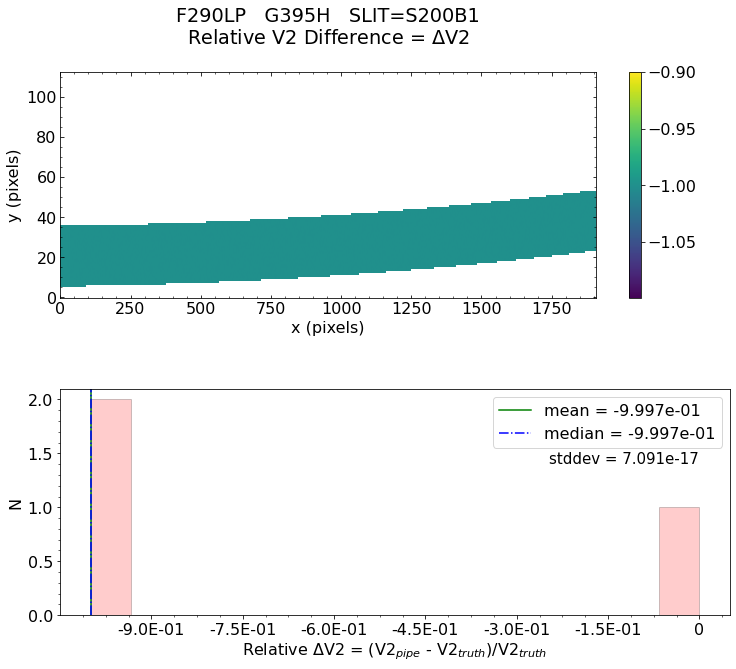

No output_directory was provided. Figures will NOT be saved.


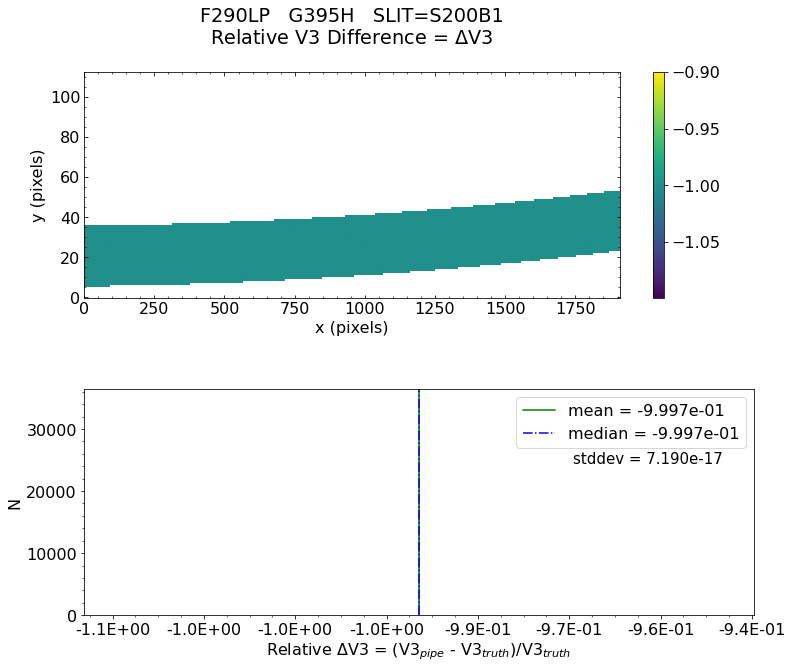


 * The test of V3 difference for slit S200A1 PASSED.

 * The test of V3 difference for slit S200A2 PASSED.

 * The test of V3 difference for slit S400A1 PASSED.

 * The test of V3 difference for slit S1600A1 PASSED.

 * The test of V3 difference for slit S200B1 FAILED.

 *** Final result for assign_wcs test will be reported as FAILED *** 

Did assign_wcs validation test passed?  FAILED 


Testing files for detector:  nrs1


Working with uncal_file:  fs_allslits_g140h_f100lp_nrs1_uncal.fits


2021-03-12 23:53:06,416 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.


2021-03-12 23:53:06,417 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.


2021-03-12 23:53:06,418 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.


2021-03-12 23:53:06,419 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.


2021-03-12 23:53:06,421 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.


2021-03-12 23:53:06,422 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.


2021-03-12 23:53:06,423 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.


2021-03-12 23:53:06,424 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.


2021-03-12 23:53:06,425 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.


2021-03-12 23:53:06,427 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.


2021-03-12 23:53:06,428 - stpipe.Detector1Pipeline.linearity - INFO - LinearityStep instance created.


2021-03-12 23:53:06,429 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.


2021-03-12 23:53:06,430 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.


2021-03-12 23:53:06,431 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.


2021-03-12 23:53:06,432 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.


2021-03-12 23:53:06,434 - stpipe.Detector1Pipeline.ramp_fit - INFO - RampFitStep instance created.


2021-03-12 23:53:06,435 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.


Exception ignored in: <function DataModel.__del__ at 0x7f4033a6f040>
Traceback (most recent call last):
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 337, in __del__
    self.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 359, in close
    file_reference.decrement()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 1112, in decrement
    self._file.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/astropy/io/fits/hdu/hdulist.py", line 973, in close
    se

/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stpipe/step.py:359: ResourceWarning: unclosed file <_io.FileIO name='/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_allslits_g140h_f100lp_nrs1_uncal.fits' mode='rb' closefd=True>
  gc.collect()
2021-03-12 23:53:06,805 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_allslits_g140h_f100lp_nrs1_uncal.fits',).


2021-03-12 23:53:06,816 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'outp

2021-03-12 23:53:07,085 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'fs_allslits_g140h_f100lp_nrs1_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']


2021-03-12 23:53:07,100 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_dark_0078.fits'.


2021-03-12 23:53:07,101 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_gain_0019.fits'.


2021-03-12 23:53:07,102 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_ipc_0011.fits'.


2021-03-12 23:53:07,104 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_linearity_0008.fits'.


2021-03-12 23:53:07,105 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_mask_0024.fits'.


2021-03-12 23:53:07,106 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSAT reference file is 'N/A'.


2021-03-12 23:53:07,106 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0006.fits'.


2021-03-12 23:53:07,107 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is 'N/A'.


2021-03-12 23:53:07,108 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is 'N/A'.


2021-03-12 23:53:07,108 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is 'N/A'.


2021-03-12 23:53:07,108 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_saturation_0010.fits'.


2021-03-12 23:53:07,110 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_superbias_0109.fits'.


2021-03-12 23:53:07,111 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.


2021-03-12 23:53:07,111 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPPARS reference file is 'N/A'.


2021-03-12 23:53:07,112 - stpipe.Detector1Pipeline - INFO - Starting calwebb_detector1 ...


2021-03-12 23:53:08,327 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-12 23:53:08,329 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:53:09,068 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed


2021-03-12 23:53:09,069 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped


2021-03-12 23:53:09,070 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done


2021-03-12 23:53:09,366 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-12 23:53:09,368 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:53:09,388 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /grp/crds/cache/references/jwst/jwst_nirspec_mask_0024.fits


2021-03-12 23:53:10,303 - stpipe.Detector1Pipeline.dq_init - INFO - Extracting mask subarray to match science data


2021-03-12 23:53:10,311 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init done


2021-03-12 23:53:10,701 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-12 23:53:10,702 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:53:10,721 - stpipe.Detector1Pipeline.saturation - INFO - Using SATURATION reference file /grp/crds/cache/references/jwst/jwst_nirspec_saturation_0010.fits


2021-03-12 23:53:11,565 - stpipe.Detector1Pipeline.saturation - INFO - Extracting reference file subarray to match science data


2021-03-12 23:53:12,163 - stpipe.Detector1Pipeline.saturation - INFO - Detected 489 saturated pixels


2021-03-12 23:53:12,237 - stpipe.Detector1Pipeline.saturation - INFO - Detected 23 A/D floor pixels


2021-03-12 23:53:12,240 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation done


2021-03-12 23:53:12,630 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-12 23:53:12,632 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:53:12,651 - stpipe.Detector1Pipeline.ipc - INFO - Using IPC reference file /grp/crds/cache/references/jwst/jwst_nirspec_ipc_0011.fits


2021-03-12 23:53:14,877 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc done


2021-03-12 23:53:15,270 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-12 23:53:15,272 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:53:15,291 - stpipe.Detector1Pipeline.superbias - INFO - Using SUPERBIAS reference file /grp/crds/cache/references/jwst/jwst_nirspec_superbias_0109.fits


2021-03-12 23:53:16,175 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias done


2021-03-12 23:53:16,565 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-12 23:53:16,567 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}


2021-03-12 23:53:16,575 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = True


2021-03-12 23:53:16,576 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = True


2021-03-12 23:53:16,576 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = 11


2021-03-12 23:53:16,577 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = 1.000000


2021-03-12 23:53:16,577 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True


2021-03-12 23:53:17,349 - stpipe.Detector1Pipeline.refpix - WARNING - No valid reference pixels, refpix step skipped


2021-03-12 23:53:17,350 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix done


2021-03-12 23:53:17,728 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-12 23:53:17,730 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-12 23:53:17,750 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_nirspec_linearity_0008.fits


2021-03-12 23:53:18,631 - stpipe.Detector1Pipeline.linearity - INFO - Extracting linearity subarray to match science data


2021-03-12 23:53:19,795 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done


2021-03-12 23:53:20,082 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-12 23:53:20,084 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'dark_output': None}


2021-03-12 23:53:20,101 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /grp/crds/cache/references/jwst/jwst_nirspec_dark_0078.fits


2021-03-12 23:53:20,176 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=25, ngroups=10, nframes=1, groupgap=0


2021-03-12 23:53:20,177 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data nints=1, ngroups=10, nframes=1, groupgap=0


2021-03-12 23:53:21,124 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current done


2021-03-12 23:53:21,372 - stpipe.Detector1Pipeline.jump - INFO - Step jump running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-12 23:53:21,373 - stpipe.Detector1Pipeline.jump - INFO - Step jump parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'rejection_threshold': 4.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 200.0, 'min_jump_to_flag_neighbors': 10.0}


2021-03-12 23:53:21,381 - stpipe.Detector1Pipeline.jump - INFO - CR rejection threshold = 4 sigma


2021-03-12 23:53:21,390 - stpipe.Detector1Pipeline.jump - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0019.fits


2021-03-12 23:53:21,427 - stpipe.Detector1Pipeline.jump - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0006.fits


2021-03-12 23:53:21,440 - stpipe.Detector1Pipeline.jump - INFO - Found 32 possible cores to use for jump detection 


2021-03-12 23:53:22,116 - stpipe.Detector1Pipeline.jump - INFO - Extracting gain subarray to match science data


2021-03-12 23:53:22,117 - stpipe.Detector1Pipeline.jump - INFO - Extracting readnoise subarray to match science data


2021-03-12 23:53:22,362 - stpipe.Detector1Pipeline.jump - INFO - Executing two-point difference method


2021-03-12 23:53:23,476 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:


2021-03-12 23:53:23,666 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 220407 pixels with at least one CR


2021-03-12 23:53:29,278 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:


2021-03-12 23:53:29,444 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 480074 pixels with at least one CR


2021-03-12 23:53:45,212 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:


2021-03-12 23:53:45,401 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 464467 pixels with at least one CR


2021-03-12 23:53:57,458 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:


2021-03-12 23:53:57,626 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 347197 pixels with at least one CR


2021-03-12 23:54:07,387 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:


2021-03-12 23:54:07,570 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 472962 pixels with at least one CR


2021-03-12 23:54:27,924 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 6:


2021-03-12 23:54:28,123 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 159827 pixels with at least one CR


2021-03-12 23:54:32,764 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 7:


2021-03-12 23:54:32,961 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 111810 pixels with at least one CR


2021-03-12 23:54:35,672 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 8:


2021-03-12 23:54:35,847 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 411515 pixels with at least one CR


2021-03-12 23:54:49,422 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 9:


2021-03-12 23:54:49,610 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 436776 pixels with at least one CR


2021-03-12 23:55:02,163 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 10:


2021-03-12 23:55:02,359 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 441172 pixels with at least one CR


2021-03-12 23:55:13,280 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 11:


2021-03-12 23:55:13,488 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 477102 pixels with at least one CR


2021-03-12 23:55:25,743 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 12:


2021-03-12 23:55:25,940 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 52263 pixels with at least one CR


2021-03-12 23:55:27,219 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 13:


2021-03-12 23:55:27,415 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 78155 pixels with at least one CR


2021-03-12 23:55:29,329 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 14:


2021-03-12 23:55:29,512 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 129287 pixels with at least one CR


2021-03-12 23:55:32,662 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 15:


2021-03-12 23:55:32,829 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 460826 pixels with at least one CR


2021-03-12 23:55:51,021 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 16:


2021-03-12 23:55:51,211 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 331656 pixels with at least one CR


2021-03-12 23:56:00,503 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 17:


2021-03-12 23:56:00,700 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 410899 pixels with at least one CR


2021-03-12 23:56:10,546 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 18:


2021-03-12 23:56:10,732 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 304118 pixels with at least one CR


2021-03-12 23:56:20,064 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 19:


2021-03-12 23:56:20,250 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 383499 pixels with at least one CR


2021-03-12 23:56:33,441 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 20:


2021-03-12 23:56:33,634 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 435024 pixels with at least one CR


2021-03-12 23:56:47,378 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 21:


2021-03-12 23:56:47,583 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 210799 pixels with at least one CR


2021-03-12 23:56:52,384 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 22:


2021-03-12 23:56:52,559 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 491393 pixels with at least one CR


2021-03-12 23:57:09,695 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 23:


2021-03-12 23:57:09,881 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 358033 pixels with at least one CR


2021-03-12 23:57:25,948 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 24:


2021-03-12 23:57:26,144 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 439026 pixels with at least one CR


2021-03-12 23:57:40,085 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 25:


2021-03-12 23:57:40,287 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 63409 pixels with at least one CR


2021-03-12 23:57:41,906 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 259.543 sec


2021-03-12 23:57:41,908 - stpipe.Detector1Pipeline.jump - INFO - The execution time in seconds: 260.527577


2021-03-12 23:57:41,910 - stpipe.Detector1Pipeline.jump - INFO - Step jump done


2021-03-12 23:57:42,149 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-12 23:57:42,151 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'int_name': '', 'save_opt': False, 'opt_name': '', 'maximum_cores': 'none'}


2021-03-12 23:57:42,184 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0006.fits


2021-03-12 23:57:42,199 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0019.fits


2021-03-12 23:57:42,235 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols


2021-03-12 23:57:42,235 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal


2021-03-12 23:57:42,236 - stpipe.Detector1Pipeline.ramp_fit - INFO - Extracting gain subarray to match science data


2021-03-12 23:57:42,236 - stpipe.Detector1Pipeline.ramp_fit - INFO - Extracting readnoise subarray to match science data


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


2021-03-13 00:00:49,894 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10


2021-03-13 00:00:49,894 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 25


2021-03-13 00:00:50,070 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done


2021-03-13 00:00:50,302 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-13 00:00:50,304 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:00:50,371 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-13 00:00:50,371 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-13 00:00:50,372 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-13 00:00:50,496 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(25, 256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-13 00:00:50,497 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:00:50,538 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-13 00:00:50,539 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-13 00:00:50,540 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-13 00:00:50,541 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1


2021-03-13 00:00:50,541 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


2021-03-13 00:00:50,550 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.


2021-03-13 00:00:50,847 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<ImageModel(256, 2048) from fs_allslits_g140h_f100lp_nrs1_uncal.fits>,).


2021-03-13 00:00:50,849 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}


2021-03-13 00:00:50,984 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.1343955546617508 deg


2021-03-13 00:00:50,984 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3604099452495575 deg


2021-03-13 00:00:50,985 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.0019762940493390285 deg


2021-03-13 00:00:50,986 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-13 00:00:50,993 - stpipe.AssignWcsStep - INFO - Combination NO_LAMP_G140H missing in wavelengthrange file, setting order to -1 and range to [7e-07, 1.27e-06].


2021-03-13 00:00:51,139 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS1: ['S200A1', 'S200A2', 'S400A1', 'S1600A1', 'S200B1']


2021-03-13 00:00:51,139 - stpipe.AssignWcsStep - INFO - Computing WCS for 5 open slitlets


2021-03-13 00:00:51,150 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.1343955546617508 deg


2021-03-13 00:00:51,150 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3604099452495575 deg


2021-03-13 00:00:51,151 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.0019762940493390285 deg


2021-03-13 00:00:51,151 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-13 00:00:51,158 - stpipe.AssignWcsStep - INFO - Combination NO_LAMP_G140H missing in wavelengthrange file, setting order to -1 and range to [7e-07, 1.27e-06].


2021-03-13 00:00:51,159 - stpipe.AssignWcsStep - INFO - SPORDER= -1, wrange=[7e-07, 1.27e-06]


2021-03-13 00:00:51,262 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 1


2021-03-13 00:00:51,263 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 2


2021-03-13 00:00:51,263 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 3


2021-03-13 00:00:51,263 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 4


2021-03-13 00:00:51,264 - stpipe.AssignWcsStep - INFO - There are 5 open slits in quadrant 5


2021-03-13 00:00:51,365 - stpipe.AssignWcsStep - INFO - Created a NIRSPEC nrs_fixedslit pipeline with references {'distortion': None, 'filteroffset': None, 'specwcs': None, 'regions': None, 'wavelengthrange': '/grp/crds/cache/references/jwst/jwst_nirspec_wavelengthrange_0004.asdf', 'camera': '/grp/crds/cache/references/jwst/jwst_nirspec_camera_0004.asdf', 'collimator': '/grp/crds/cache/references/jwst/jwst_nirspec_collimator_0004.asdf', 'disperser': '/grp/crds/cache/references/jwst/jwst_nirspec_disperser_0033.asdf', 'fore': None, 'fpa': '/grp/crds/cache/references/jwst/jwst_nirspec_fpa_0005.asdf', 'msa': '/grp/crds/cache/references/jwst/jwst_nirspec_msa_0005.asdf', 'ote': '/grp/crds/cache/references/jwst/jwst_nirspec_ote_0005.asdf', 'ifupost': None, 'ifufore': None, 'ifuslicer': None}


2021-03-13 00:00:51,461 - stpipe.AssignWcsStep - INFO - COMPLETED assign_wcs


2021-03-13 00:00:51,464 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done


Running test for FS...
Information from the 'truth' (or comparison) file 
Filename: /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_allslits_g140h_f100lp_nrs1_assign_wcs_truth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     299   ()      
  1  SCI           1 ImageHDU        50   (2048, 256)   float32   
  2  ERR           1 ImageHDU        10   (2048, 256)   float32   
  3  DQ            1 ImageHDU        11   (2048, 256)   int32 (rescales to uint32)   
  4  VAR_POISSON    1 ImageHDU         9   (2048, 256)   float32   
  5  VAR_RNOISE    1 ImageHDU         9   (2048, 256)   float32   
  6  ASDF          1 BinTableHDU     11   1R x 1C   [177048B]   


None


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/validate.py:34: ValidationWarning: While validating meta.instrument.fixed_slit the following error occurred:
'ALLSLITS' is not one of ['S200A1', 'S200A2', 'S200B1', 'S400A1', 'S1600A1', 'NONE']

Failed validating 'enum' in schema:
    OrderedDict([('title', 'Name of fixed slit aperture used'),
                 ('type', 'string'),
                 ('enum',
                  ['S200A1',
                   'S200A2',
                   'S200B1',
                   'S400A1',
                   'S1600A1',
                   'NONE']),
                 ('fits_keyword', 'FXD_SLIT'),
                 ('blend_table', True)])

On instance:
    'ALLSLITS'
  warnings.warn(errmsg, ValidationWarning)


Comparing to ST 'truth' file.
from assign_wcs file  -->     Detector: NRS1   Grating: G140H   Filter: OPAQUE   Lamp: NO_LAMP
GWA_XTILT: 0.3604099452495575
GWA_YTILT: 0.1343955546617508
GWA_TTILT: 37.0910277792677

Working with slit: S200A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame']
Wavelength Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for Wavelength Difference:  FAILED

Slit-Y Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for Slit-Y Difference:  FAILED

MSA_X Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for MSA_X Difference:  FAILED

MSA_Y Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for MSA_Y Difference:  FAILED

Unable to create plot of relative wavelength difference.
Unable to create plot of relative slit position.
Unable to create plot of relative MSA-x difference.
Unable to create plot of relative MSA-y difference.

Working with slit: S200A2


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame']
Wavelength Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for Wavelength Difference:  FAILED

Slit-Y Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for Slit-Y Difference:  FAILED

MSA_X Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for MSA_X Difference:  FAILED

MSA_Y Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for MSA_Y Difference:  FAILED

Unable to create plot of relative wavelength difference.
Unable to create plot of relative slit position.
Unable to create plot of relative MSA-x difference.
Unable to create plot of relative MSA-y difference.

Working with slit: S400A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame']
Wavelength Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for Wavelength Difference:  FAILED

Slit-Y Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for Slit-Y Difference:  FAILED

MSA_X Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for MSA_X Difference:  FAILED

MSA_Y Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for MSA_Y Difference:  FAILED

Unable to create plot of relative wavelength difference.
Unable to create plot of relative slit position.
Unable to create plot of relative MSA-x difference.
Unable to create plot of relative MSA-y difference.

Working with slit: S1600A1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame']
Wavelength Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for Wavelength Difference:  FAILED

Slit-Y Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for Slit-Y Difference:  FAILED

MSA_X Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for MSA_X Difference:  FAILED

MSA_Y Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for MSA_Y Difference:  FAILED

Unable to create plot of relative wavelength difference.
Unable to create plot of relative slit position.
Unable to create plot of relative MSA-x difference.
Unable to create plot of relative MSA-y difference.

Working with slit: S200B1

 * Script 

Working with uncal_file:  fs_allslits_g140h_f100lp_nrs2_uncal.fits


2021-03-13 00:00:58,169 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.


2021-03-13 00:00:58,170 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.


2021-03-13 00:00:58,171 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.


2021-03-13 00:00:58,172 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.


2021-03-13 00:00:58,173 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.


2021-03-13 00:00:58,175 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.


2021-03-13 00:00:58,176 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.


2021-03-13 00:00:58,177 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.


2021-03-13 00:00:58,178 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.


2021-03-13 00:00:58,179 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.


2021-03-13 00:00:58,180 - stpipe.Detector1Pipeline.linearity - INFO - LinearityStep instance created.


2021-03-13 00:00:58,181 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.


2021-03-13 00:00:58,182 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.


2021-03-13 00:00:58,183 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.


2021-03-13 00:00:58,184 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.


2021-03-13 00:00:58,185 - stpipe.Detector1Pipeline.ramp_fit - INFO - RampFitStep instance created.


2021-03-13 00:00:58,186 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.


Exception ignored in: <function DataModel.__del__ at 0x7f4033a6f040>
Traceback (most recent call last):
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 337, in __del__
    self.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 359, in close
    file_reference.decrement()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 1112, in decrement
    self._file.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/astropy/io/fits/hdu/hdulist.py", line 973, in close
    se

/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stpipe/step.py:359: ResourceWarning: unclosed file <_io.FileIO name='/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_allslits_g140h_f100lp_nrs2_uncal.fits' mode='rb' closefd=True>
  gc.collect()


2021-03-13 00:00:58,386 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_allslits_g140h_f100lp_nrs2_uncal.fits',).


2021-03-13 00:00:58,395 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'outp

2021-03-13 00:00:58,586 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'fs_allslits_g140h_f100lp_nrs2_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']


2021-03-13 00:00:58,660 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_dark_0128.fits'.


2021-03-13 00:00:58,662 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_gain_0018.fits'.


2021-03-13 00:00:58,663 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_ipc_0012.fits'.


2021-03-13 00:00:58,664 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_linearity_0009.fits'.


2021-03-13 00:00:58,666 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_mask_0025.fits'.


2021-03-13 00:00:58,667 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSAT reference file is 'N/A'.


2021-03-13 00:00:58,667 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0007.fits'.


2021-03-13 00:00:58,670 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is 'N/A'.


2021-03-13 00:00:58,671 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is 'N/A'.


2021-03-13 00:00:58,671 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is 'N/A'.


2021-03-13 00:00:58,671 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_saturation_0011.fits'.


2021-03-13 00:00:58,672 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_superbias_0148.fits'.


2021-03-13 00:00:58,674 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.


2021-03-13 00:00:58,674 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPPARS reference file is 'N/A'.


2021-03-13 00:00:58,674 - stpipe.Detector1Pipeline - INFO - Starting calwebb_detector1 ...


2021-03-13 00:00:59,542 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:00:59,543 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:01:00,228 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed


2021-03-13 00:01:00,228 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped


2021-03-13 00:01:00,229 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done


2021-03-13 00:01:00,360 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:01:00,362 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:01:00,475 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /grp/crds/cache/references/jwst/jwst_nirspec_mask_0025.fits


2021-03-13 00:01:01,868 - stpipe.Detector1Pipeline.dq_init - INFO - Extracting mask subarray to match science data


2021-03-13 00:01:01,874 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init done


2021-03-13 00:01:02,071 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:01:02,072 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:01:02,094 - stpipe.Detector1Pipeline.saturation - INFO - Using SATURATION reference file /grp/crds/cache/references/jwst/jwst_nirspec_saturation_0011.fits


2021-03-13 00:01:03,610 - stpipe.Detector1Pipeline.saturation - INFO - Extracting reference file subarray to match science data


2021-03-13 00:01:04,154 - stpipe.Detector1Pipeline.saturation - INFO - Detected 436 saturated pixels


2021-03-13 00:01:04,199 - stpipe.Detector1Pipeline.saturation - INFO - Detected 0 A/D floor pixels


2021-03-13 00:01:04,201 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation done


2021-03-13 00:01:04,398 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:01:04,400 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:01:04,422 - stpipe.Detector1Pipeline.ipc - INFO - Using IPC reference file /grp/crds/cache/references/jwst/jwst_nirspec_ipc_0012.fits


2021-03-13 00:01:06,552 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc done


2021-03-13 00:01:06,751 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:01:06,752 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:01:06,771 - stpipe.Detector1Pipeline.superbias - INFO - Using SUPERBIAS reference file /grp/crds/cache/references/jwst/jwst_nirspec_superbias_0148.fits


2021-03-13 00:01:07,973 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias done


2021-03-13 00:01:08,171 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:01:08,172 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}


2021-03-13 00:01:08,180 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = True


2021-03-13 00:01:08,180 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = True


2021-03-13 00:01:08,180 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = 11


2021-03-13 00:01:08,181 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = 1.000000


2021-03-13 00:01:08,181 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True


2021-03-13 00:01:08,875 - stpipe.Detector1Pipeline.refpix - WARNING - No valid reference pixels, refpix step skipped


2021-03-13 00:01:08,876 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix done


2021-03-13 00:01:09,071 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:01:09,073 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:01:09,090 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_nirspec_linearity_0009.fits


2021-03-13 00:01:13,713 - stpipe.Detector1Pipeline.linearity - INFO - Extracting linearity subarray to match science data


2021-03-13 00:01:14,650 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done


2021-03-13 00:01:14,847 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:01:14,848 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'dark_output': None}


2021-03-13 00:01:14,866 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /grp/crds/cache/references/jwst/jwst_nirspec_dark_0128.fits


2021-03-13 00:01:17,702 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=25, ngroups=10, nframes=1, groupgap=0


2021-03-13 00:01:17,703 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data nints=1, ngroups=10, nframes=1, groupgap=0


2021-03-13 00:01:18,518 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current done


2021-03-13 00:01:18,714 - stpipe.Detector1Pipeline.jump - INFO - Step jump running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:01:18,716 - stpipe.Detector1Pipeline.jump - INFO - Step jump parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'rejection_threshold': 4.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 200.0, 'min_jump_to_flag_neighbors': 10.0}


2021-03-13 00:01:18,723 - stpipe.Detector1Pipeline.jump - INFO - CR rejection threshold = 4 sigma


2021-03-13 00:01:18,735 - stpipe.Detector1Pipeline.jump - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0018.fits


2021-03-13 00:01:18,809 - stpipe.Detector1Pipeline.jump - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0007.fits


2021-03-13 00:01:20,056 - stpipe.Detector1Pipeline.jump - INFO - Found 32 possible cores to use for jump detection 


2021-03-13 00:01:20,728 - stpipe.Detector1Pipeline.jump - INFO - Extracting gain subarray to match science data


2021-03-13 00:01:20,729 - stpipe.Detector1Pipeline.jump - INFO - Extracting readnoise subarray to match science data


2021-03-13 00:01:20,978 - stpipe.Detector1Pipeline.jump - INFO - Executing two-point difference method


2021-03-13 00:01:22,101 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:


2021-03-13 00:01:22,290 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 402569 pixels with at least one CR


2021-03-13 00:01:35,779 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:


2021-03-13 00:01:35,973 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 141085 pixels with at least one CR


2021-03-13 00:01:39,603 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:


2021-03-13 00:01:39,778 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 131684 pixels with at least one CR


2021-03-13 00:01:42,770 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:


2021-03-13 00:01:42,944 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 256650 pixels with at least one CR


2021-03-13 00:01:49,811 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 5:


2021-03-13 00:01:49,987 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 336792 pixels with at least one CR


2021-03-13 00:01:58,513 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 6:


2021-03-13 00:01:58,689 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 382460 pixels with at least one CR


2021-03-13 00:02:09,849 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 7:


2021-03-13 00:02:10,020 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 509939 pixels with at least one CR


2021-03-13 00:02:30,765 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 8:


2021-03-13 00:02:30,937 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 436355 pixels with at least one CR


2021-03-13 00:02:42,665 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 9:


2021-03-13 00:02:42,842 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 288190 pixels with at least one CR


2021-03-13 00:02:51,330 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 10:


2021-03-13 00:02:51,509 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 194255 pixels with at least one CR


2021-03-13 00:02:56,684 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 11:


2021-03-13 00:02:56,866 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 373152 pixels with at least one CR


2021-03-13 00:03:07,629 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 12:


2021-03-13 00:03:07,827 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 18772 pixels with at least one CR


2021-03-13 00:03:08,322 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 13:


2021-03-13 00:03:08,511 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 366730 pixels with at least one CR


2021-03-13 00:03:17,147 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 14:


2021-03-13 00:03:17,324 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 388664 pixels with at least one CR


2021-03-13 00:03:27,327 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 15:


2021-03-13 00:03:27,513 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 94510 pixels with at least one CR


2021-03-13 00:03:29,841 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 16:


2021-03-13 00:03:30,024 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 20217 pixels with at least one CR


2021-03-13 00:03:30,559 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 17:


2021-03-13 00:03:30,740 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 129932 pixels with at least one CR


2021-03-13 00:03:34,025 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 18:


2021-03-13 00:03:34,207 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 140843 pixels with at least one CR


2021-03-13 00:03:37,960 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 19:


2021-03-13 00:03:38,148 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 142383 pixels with at least one CR


2021-03-13 00:03:42,157 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 20:


2021-03-13 00:03:42,344 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 75674 pixels with at least one CR


2021-03-13 00:03:44,230 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 21:


2021-03-13 00:03:44,411 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 151652 pixels with at least one CR


2021-03-13 00:03:48,130 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 22:


2021-03-13 00:03:48,309 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 145703 pixels with at least one CR


2021-03-13 00:03:51,784 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 23:


2021-03-13 00:03:51,955 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 397928 pixels with at least one CR


2021-03-13 00:04:02,891 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 24:


2021-03-13 00:04:03,077 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 116251 pixels with at least one CR


2021-03-13 00:04:06,041 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 25:


2021-03-13 00:04:06,232 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two-point found 265529 pixels with at least one CR


2021-03-13 00:04:15,001 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 174.023 sec


2021-03-13 00:04:15,004 - stpipe.Detector1Pipeline.jump - INFO - The execution time in seconds: 176.280994


2021-03-13 00:04:15,006 - stpipe.Detector1Pipeline.jump - INFO - Step jump done


2021-03-13 00:04:15,250 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit running with args (<RampModel(25, 10, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:04:15,252 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'int_name': '', 'save_opt': False, 'opt_name': '', 'maximum_cores': 'none'}


2021-03-13 00:04:15,290 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0007.fits


2021-03-13 00:04:15,306 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0018.fits


2021-03-13 00:04:15,349 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols


2021-03-13 00:04:15,350 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal


2021-03-13 00:04:15,350 - stpipe.Detector1Pipeline.ramp_fit - INFO - Extracting gain subarray to match science data


2021-03-13 00:04:15,351 - stpipe.Detector1Pipeline.ramp_fit - INFO - Extracting readnoise subarray to match science data


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:872: RuntimeWarning: invalid value encountered in multiply
  var_p4[num_int,:,:,:] *= ( segs_4[num_int,:,:,:] > 0)


2021-03-13 00:07:09,409 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10


2021-03-13 00:07:09,410 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 25


2021-03-13 00:07:09,575 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done


2021-03-13 00:07:09,815 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:07:09,817 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:07:09,891 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-13 00:07:09,891 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-13 00:07:09,892 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-13 00:07:10,025 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(25, 256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:07:10,026 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:07:10,079 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-13 00:07:10,080 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-13 00:07:10,081 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-13 00:07:10,082 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1


2021-03-13 00:07:10,082 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


2021-03-13 00:07:10,091 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.


2021-03-13 00:07:10,305 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<ImageModel(256, 2048) from fs_allslits_g140h_f100lp_nrs2_uncal.fits>,).


2021-03-13 00:07:10,307 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}


2021-03-13 00:07:10,436 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.1343955546617508 deg


2021-03-13 00:07:10,436 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3604099452495575 deg


2021-03-13 00:07:10,437 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.0019762940493390285 deg


2021-03-13 00:07:10,438 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-13 00:07:10,445 - stpipe.AssignWcsStep - INFO - Combination NO_LAMP_G140H missing in wavelengthrange file, setting order to -1 and range to [7e-07, 1.27e-06].


2021-03-13 00:07:10,551 - stpipe.AssignWcsStep - INFO - Removing slit S200A1 from the list of open slits because the WCS bounding_box is completely outside the detector.


2021-03-13 00:07:10,563 - stpipe.AssignWcsStep - INFO - Removing slit S200A2 from the list of open slits because the WCS bounding_box is completely outside the detector.


2021-03-13 00:07:10,574 - stpipe.AssignWcsStep - INFO - Removing slit S400A1 from the list of open slits because the WCS bounding_box is completely outside the detector.


2021-03-13 00:07:10,586 - stpipe.AssignWcsStep - INFO - Removing slit S1600A1 from the list of open slits because the WCS bounding_box is completely outside the detector.


2021-03-13 00:07:10,597 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS2: ['S200B1']


2021-03-13 00:07:10,597 - stpipe.AssignWcsStep - INFO - Computing WCS for 1 open slitlets


2021-03-13 00:07:10,611 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.1343955546617508 deg


2021-03-13 00:07:10,611 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3604099452495575 deg


2021-03-13 00:07:10,611 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.0019762940493390285 deg


2021-03-13 00:07:10,612 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-13 00:07:10,624 - stpipe.AssignWcsStep - INFO - Combination NO_LAMP_G140H missing in wavelengthrange file, setting order to -1 and range to [7e-07, 1.27e-06].


2021-03-13 00:07:10,624 - stpipe.AssignWcsStep - INFO - SPORDER= -1, wrange=[7e-07, 1.27e-06]


2021-03-13 00:07:10,731 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 1


2021-03-13 00:07:10,732 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 2


2021-03-13 00:07:10,732 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 3


2021-03-13 00:07:10,732 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 4


2021-03-13 00:07:10,733 - stpipe.AssignWcsStep - INFO - There are 1 open slits in quadrant 5


2021-03-13 00:07:10,766 - stpipe.AssignWcsStep - INFO - Created a NIRSPEC nrs_fixedslit pipeline with references {'distortion': None, 'filteroffset': None, 'specwcs': None, 'regions': None, 'wavelengthrange': '/grp/crds/cache/references/jwst/jwst_nirspec_wavelengthrange_0004.asdf', 'camera': '/grp/crds/cache/references/jwst/jwst_nirspec_camera_0004.asdf', 'collimator': '/grp/crds/cache/references/jwst/jwst_nirspec_collimator_0004.asdf', 'disperser': '/grp/crds/cache/references/jwst/jwst_nirspec_disperser_0033.asdf', 'fore': None, 'fpa': '/grp/crds/cache/references/jwst/jwst_nirspec_fpa_0005.asdf', 'msa': '/grp/crds/cache/references/jwst/jwst_nirspec_msa_0005.asdf', 'ote': '/grp/crds/cache/references/jwst/jwst_nirspec_ote_0005.asdf', 'ifupost': None, 'ifufore': None, 'ifuslicer': None}


2021-03-13 00:07:10,816 - stpipe.AssignWcsStep - INFO - COMPLETED assign_wcs


2021-03-13 00:07:10,818 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done


Running test for FS...
Information from the 'truth' (or comparison) file 
Filename: /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/fs_allslits_g140h_f100lp_nrs2_assign_wcs_truth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     286   ()      
  1  SCI           1 ImageHDU        50   (2048, 256)   float32   
  2  ERR           1 ImageHDU        10   (2048, 256)   float32   
  3  DQ            1 ImageHDU        11   (2048, 256)   int32 (rescales to uint32)   
  4  VAR_POISSON    1 ImageHDU         9   (2048, 256)   float32   
  5  VAR_RNOISE    1 ImageHDU         9   (2048, 256)   float32   
  6  ASDF          1 BinTableHDU     11   1R x 1C   [210488B]   


None


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/validate.py:34: ValidationWarning: While validating meta.instrument.fixed_slit the following error occurred:
'ALLSLITS' is not one of ['S200A1', 'S200A2', 'S200B1', 'S400A1', 'S1600A1', 'NONE']

Failed validating 'enum' in schema:
    OrderedDict([('title', 'Name of fixed slit aperture used'),
                 ('type', 'string'),
                 ('enum',
                  ['S200A1',
                   'S200A2',
                   'S200B1',
                   'S400A1',
                   'S1600A1',
                   'NONE']),
                 ('fits_keyword', 'FXD_SLIT'),
                 ('blend_table', True)])

On instance:
    'ALLSLITS'
  warnings.warn(errmsg, ValidationWarning)


Comparing to ST 'truth' file.
from assign_wcs file  -->     Detector: NRS2   Grating: G140H   Filter: OPAQUE   Lamp: NO_LAMP
GWA_XTILT: 0.3604099452495575
GWA_YTILT: 0.1343955546617508
GWA_TTILT: 37.0910277792677

Working with slit: S200B1


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame']
Wavelength Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for Wavelength Difference:  FAILED

Slit-Y Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for Slit-Y Difference:  FAILED



MSA_X Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for MSA_X Difference:  FAILED

MSA_Y Difference  has all NaN values. Differences array will also be NaNs and statistics calculations will fail.

 * Result of the test for MSA_Y Difference:  FAILED

Unable to create plot of relative wavelength difference.
Unable to create plot of relative slit position.
Unable to create plot of relative MSA-x difference.
Unable to create plot of relative MSA-y difference.

 * The test of MSA_Y Difference for slit S200B1 FAILED.

 *** Final result for assign_wcs test will be reported as FAILED *** 

Did assign_wcs validation test passed?  FAILED 


Testing files for detector:  nrs1


Working with uncal_file:  mos_prism_nrs1_uncal.fits


2021-03-13 00:07:15,185 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.


2021-03-13 00:07:15,186 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.


2021-03-13 00:07:15,187 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.


2021-03-13 00:07:15,188 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.


2021-03-13 00:07:15,189 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.


2021-03-13 00:07:15,190 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.


2021-03-13 00:07:15,191 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.


2021-03-13 00:07:15,192 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.


2021-03-13 00:07:15,193 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.


2021-03-13 00:07:15,194 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.


2021-03-13 00:07:15,195 - stpipe.Detector1Pipeline.linearity - INFO - LinearityStep instance created.


2021-03-13 00:07:15,196 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.


2021-03-13 00:07:15,198 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.


2021-03-13 00:07:15,199 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.


2021-03-13 00:07:15,200 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.


2021-03-13 00:07:15,202 - stpipe.Detector1Pipeline.ramp_fit - INFO - RampFitStep instance created.


2021-03-13 00:07:15,203 - stpipe.Detector1Pipeline.gain_scale - INFO - GainScaleStep instance created.


Exception ignored in: <function DataModel.__del__ at 0x7f4033a6f040>
Traceback (most recent call last):
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 337, in __del__


    self.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 359, in close
    file_reference.decrement()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 1112, in decrement
    self._file.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/astropy/io/fits/hdu/hdulist.py", line 973, in close
    self._file.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/astropy/io/fits/file.py", line 401, in close
    self._file.close()
OSError: [Errno 9] Bad file descriptor


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stpipe/step.py:359: ResourceWarning: unclosed file <_io.FileIO name='/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/mos_prism_nrs1_uncal.fits' mode='rb' closefd=True>
  gc.collect()
2021-03-13 00:07:15,418 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/mos_prism_nrs1_uncal.fits',).


2021-03-13 00:07:15,426 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'outp

2021-03-13 00:07:15,509 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'mos_prism_nrs1_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']


2021-03-13 00:07:15,549 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_dark_0086.fits'.


2021-03-13 00:07:15,554 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_gain_0019.fits'.


2021-03-13 00:07:15,565 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_ipc_0011.fits'.


2021-03-13 00:07:15,567 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_linearity_0018.fits'.


2021-03-13 00:07:15,569 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_mask_0010.fits'.


2021-03-13 00:07:15,571 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSAT reference file is 'N/A'.


2021-03-13 00:07:15,572 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0018.fits'.


2021-03-13 00:07:15,584 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_refpix_0022.fits'.


2021-03-13 00:07:15,589 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is 'N/A'.


2021-03-13 00:07:15,589 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is 'N/A'.


2021-03-13 00:07:15,589 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_saturation_0020.fits'.


2021-03-13 00:07:15,618 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is '/grp/crds/cache/references/jwst/jwst_nirspec_superbias_0113.fits'.


2021-03-13 00:07:15,622 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.


2021-03-13 00:07:15,622 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPPARS reference file is 'N/A'.


2021-03-13 00:07:15,623 - stpipe.Detector1Pipeline - INFO - Starting calwebb_detector1 ...


2021-03-13 00:07:15,946 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale running with args (<RampModel(1, 4, 3200, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:15,947 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:07:16,043 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed


2021-03-13 00:07:16,043 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped


2021-03-13 00:07:16,044 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done


2021-03-13 00:07:16,185 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 4, 3200, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:16,186 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:07:16,202 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /grp/crds/cache/references/jwst/jwst_nirspec_mask_0010.fits


2021-03-13 00:07:16,496 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init done


2021-03-13 00:07:16,638 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation running with args (<RampModel(1, 4, 3200, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:16,639 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:07:16,655 - stpipe.Detector1Pipeline.saturation - INFO - Using SATURATION reference file /grp/crds/cache/references/jwst/jwst_nirspec_saturation_0020.fits


2021-03-13 00:07:17,041 - stpipe.Detector1Pipeline.saturation - INFO - Detected 9869 saturated pixels


2021-03-13 00:07:17,063 - stpipe.Detector1Pipeline.saturation - INFO - Detected 0 A/D floor pixels


2021-03-13 00:07:17,080 - stpipe.Detector1Pipeline.saturation - INFO - Step saturation done


2021-03-13 00:07:17,223 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc running with args (<RampModel(1, 4, 3200, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:17,224 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:07:17,240 - stpipe.Detector1Pipeline.ipc - INFO - Using IPC reference file /grp/crds/cache/references/jwst/jwst_nirspec_ipc_0011.fits


2021-03-13 00:07:17,670 - stpipe.Detector1Pipeline.ipc - INFO - Step ipc done


2021-03-13 00:07:17,824 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias running with args (<RampModel(1, 4, 3200, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:17,825 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:07:17,841 - stpipe.Detector1Pipeline.superbias - INFO - Using SUPERBIAS reference file /grp/crds/cache/references/jwst/jwst_nirspec_superbias_0113.fits


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/validate.py:34: ValidationWarning: While validating meta.exposure.readpatt the following error occurred:
'ALLIRS2' is not one of ['ACQ1', 'ACQ2', 'BRIGHT1', 'BRIGHT2', 'DEEP2', 'DEEP8', 'FAST', 'FASTGRPAVG', 'FASTGRPAVG8', 'FASTGRPAVG16', 'FASTGRPAVG32', 'FASTGRPAVG64', 'FASTR1', 'FASTR100', 'FGS', 'FGS60', 'FGS8370', 'FGS840', 'FGSRAPID', 'FINEGUIDE', 'ID', 'MEDIUM2', 'MEDIUM8', 'NIS', 'NISRAPID', 'NRS', 'NRSIRS2', 'NRSN16R4', 'NRSN32R8', 'NRSN8R2', 'NRSRAPID', 'NRSIRS2RAPID', 'NRSRAPIDD1', 'NRSRAPIDD2', 'NRSRAPIDD6', 'NRSSLOW', 'RAPID', 'SHALLOW2', 'SHALLOW4', 'SLOW', 'SLOWR1', 'TRACK', 'ANY', 'N/A']

Failed validating 'enum' in schema:
    OrderedDict([('title', 'Readout pattern'),
                 ('type', 'string'),
                 ('enum',
                  ['ACQ1',
                   'ACQ2',
                   'BRIGHT1',


2021-03-13 00:07:18,133 - stpipe.Detector1Pipeline.superbias - INFO - Step superbias done


2021-03-13 00:07:18,277 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix running with args (<RampModel(1, 4, 3200, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:18,278 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}


2021-03-13 00:07:18,293 - stpipe.Detector1Pipeline.refpix - INFO - Using refpix reference file: /grp/crds/cache/references/jwst/jwst_nirspec_refpix_0022.fits


2021-03-13 00:07:31,128 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix done


2021-03-13 00:07:31,354 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity running with args (<RampModel(1, 4, 3200, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:31,355 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:07:31,372 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_nirspec_linearity_0018.fits


2021-03-13 00:07:31,879 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done


2021-03-13 00:07:32,028 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(1, 4, 3200, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:32,029 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'dark_output': None}


2021-03-13 00:07:32,045 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /grp/crds/cache/references/jwst/jwst_nirspec_dark_0086.fits


2021-03-13 00:07:35,280 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=1, ngroups=4, nframes=1, groupgap=0


2021-03-13 00:07:35,281 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data nints=1, ngroups=65, nframes=1, groupgap=0


2021-03-13 00:07:35,685 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current done


2021-03-13 00:07:36,217 - stpipe.Detector1Pipeline.jump - INFO - Step jump running with args (<RampModel(1, 4, 3200, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:36,219 - stpipe.Detector1Pipeline.jump - INFO - Step jump parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'rejection_threshold': 4.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 200.0, 'min_jump_to_flag_neighbors': 10.0}


2021-03-13 00:07:36,227 - stpipe.Detector1Pipeline.jump - WARNING - Can not apply jump detection when NGROUPS<=4;


2021-03-13 00:07:36,228 - stpipe.Detector1Pipeline.jump - WARNING - Jump step will be skipped


2021-03-13 00:07:36,300 - stpipe.Detector1Pipeline.jump - INFO - Step jump done


2021-03-13 00:07:36,442 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit running with args (<RampModel(1, 4, 3200, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:36,443 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52', 'int_name': '', 'save_opt': False, 'opt_name': '', 'maximum_cores': 'none'}


2021-03-13 00:07:36,468 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0018.fits


2021-03-13 00:07:36,506 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0019.fits


2021-03-13 00:07:36,535 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols


2021-03-13 00:07:36,535 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal


2021-03-13 00:07:46,442 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 4


2021-03-13 00:07:46,442 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1


/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/ramp_fitting/ramp_fit.py:1091: RuntimeWarning: divide by zero encountered in true_divide
  var_p2 = 1/(s_inv_var_p3.sum(axis=0))
2021-03-13 00:07:46,546 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done


2021-03-13 00:07:46,691 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(2048, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:46,692 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:07:46,733 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-13 00:07:46,734 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-13 00:07:46,735 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-13 00:07:46,875 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(1, 2048, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:46,876 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52'}


2021-03-13 00:07:46,917 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file


2021-03-13 00:07:46,918 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped


2021-03-13 00:07:46,919 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done


2021-03-13 00:07:46,919 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1


2021-03-13 00:07:46,920 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done


2021-03-13 00:07:46,928 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.


2021-03-13 00:07:47,070 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<ImageModel(2048, 2048) from mos_prism_nrs1_uncal.fits>,).


2021-03-13 00:07:47,072 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}


2021-03-13 00:07:47,191 - stpipe.AssignWcsStep - INFO - Retrieving open MSA slitlets for msa_metadata_id = 1 and dither_index = 1


2021-03-13 00:07:47,205 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.0332140289247036 deg


2021-03-13 00:07:47,206 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3367482721805573 deg


2021-03-13 00:07:47,206 - stpipe.AssignWcsStep - INFO - theta_y correction: -1.0907214098475986e-05 deg


2021-03-13 00:07:47,207 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-13 00:07:47,423 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS1: [3, 4]


2021-03-13 00:07:47,424 - stpipe.AssignWcsStep - INFO - Computing WCS for 2 open slitlets


2021-03-13 00:07:47,437 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.0332140289247036 deg


2021-03-13 00:07:47,437 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3367482721805573 deg


2021-03-13 00:07:47,438 - stpipe.AssignWcsStep - INFO - theta_y correction: -1.0907214098475986e-05 deg


2021-03-13 00:07:47,438 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.0 deg


2021-03-13 00:07:47,445 - stpipe.AssignWcsStep - INFO - SPORDER= 0, wrange=[6e-07, 5.3e-06]


2021-03-13 00:07:47,537 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 1


2021-03-13 00:07:47,537 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 2


2021-03-13 00:07:47,537 - stpipe.AssignWcsStep - INFO - There are 1 open slits in quadrant 3


2021-03-13 00:07:47,546 - stpipe.AssignWcsStep - INFO - There are 1 open slits in quadrant 4


2021-03-13 00:07:47,555 - stpipe.AssignWcsStep - INFO - There are 0 open slits in quadrant 5


2021-03-13 00:07:47,655 - stpipe.AssignWcsStep - INFO - Created a NIRSPEC nrs_msaspec pipeline with references {'distortion': None, 'filteroffset': None, 'specwcs': None, 'regions': None, 'wavelengthrange': '/grp/crds/cache/references/jwst/jwst_nirspec_wavelengthrange_0004.asdf', 'camera': '/grp/crds/cache/references/jwst/jwst_nirspec_camera_0004.asdf', 'collimator': '/grp/crds/cache/references/jwst/jwst_nirspec_collimator_0004.asdf', 'disperser': '/grp/crds/cache/references/jwst/jwst_nirspec_disperser_0034.asdf', 'fore': '/grp/crds/cache/references/jwst/jwst_nirspec_fore_0028.asdf', 'fpa': '/grp/crds/cache/references/jwst/jwst_nirspec_fpa_0005.asdf', 'msa': '/grp/crds/cache/references/jwst/jwst_nirspec_msa_0005.asdf', 'ote': '/grp/crds/cache/references/jwst/jwst_nirspec_ote_0005.asdf', 'ifupost': None, 'ifufore': None, 'ifuslicer': None, 'msametafile': '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/V0030006000104_msa.fits'}


2021-03-13 00:07:47,775 - stpipe.AssignWcsStep - INFO - COMPLETED assign_wcs


2021-03-13 00:07:47,778 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done


Running test for MOS...
Information from the 'truth' (or comparison) file 
Filename: /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/mos_prism_nrs1_assign_wcs_truth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   ()      
  1  SCI           1 ImageHDU        50   (2048, 2048)   float32   
  2  ERR           1 ImageHDU        10   (2048, 2048)   float32   
  3  DQ            1 ImageHDU        11   (2048, 2048)   int32 (rescales to uint32)   
  4  VAR_POISSON    1 ImageHDU         9   (2048, 2048)   float32   
  5  VAR_RNOISE    1 ImageHDU         9   (2048, 2048)   float32   
  6  ASDF          1 BinTableHDU     11   1R x 1C   [123139B]   


None


Comparing to ST 'truth' file.
from assign_wcs file  -->     Detector: NRS1   Grating: PRISM   Filter: CLEAR   Lamp: LINE4
GWA_XTILT: 0.3367482721805573
GWA_YTILT: 0.0332140289247036
GWA_TTILT: 37.20692577377271
Using this MSA shutter configuration file: /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpztxgbm52/V0030006000104_msa.fits

Working with slit: 3
Pipeline shutter info:   quadrant= 3   row= 185   col=13


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = -2.024e-17    median = 0.000e+00    stdev = 1.771e-15
    Maximum   RelativeWavelength Difference = 2.606e-14
    Minimum   RelativeWavelength Difference = -4.119e-14
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%
Result for test of Wavelength Difference: PASSED

   Relative Slit-Y Difference  :   mean = 1.730e-14    median = 0.000e+00    stdev = 1.368e-12
    Maximum   RelativeSlit-Y Difference = 2.623e-11
    Minimum   RelativeSlit-Y Difference = -3.514e-11
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                        

/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/geometry.py:203: RuntimeWarning: invalid value encountered in remainder
  lon = np.mod(lon, 360.0 * u.deg if nquant else 360.0)


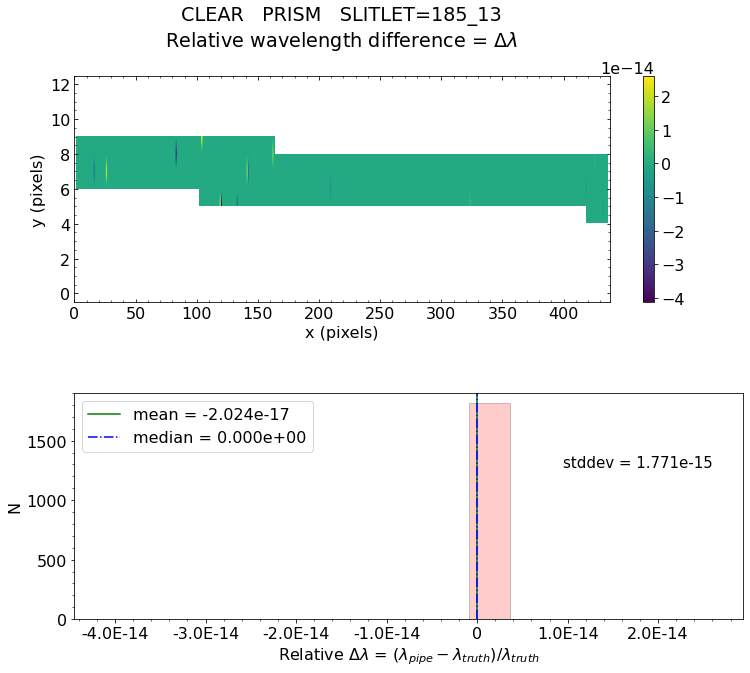

No output_directory was provided. Figures will NOT be saved.


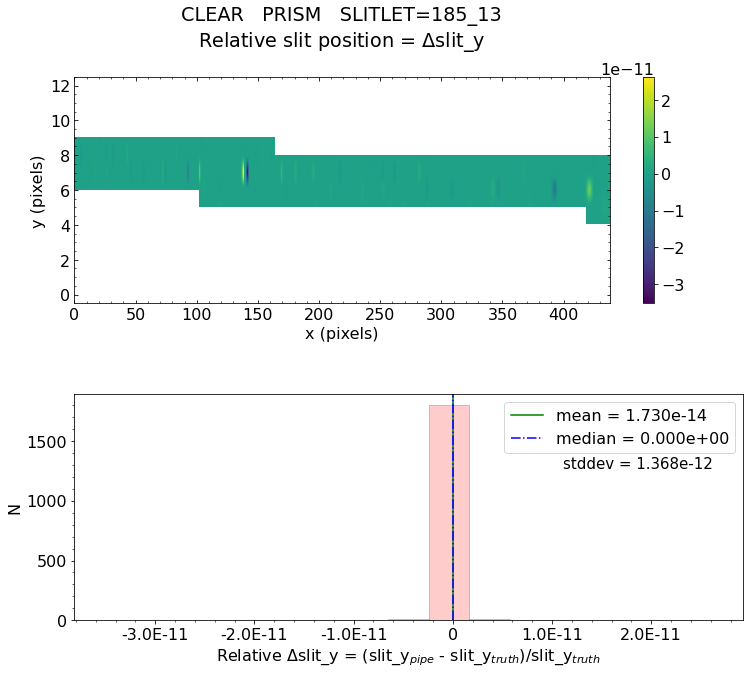

No output_directory was provided. Figures will NOT be saved.


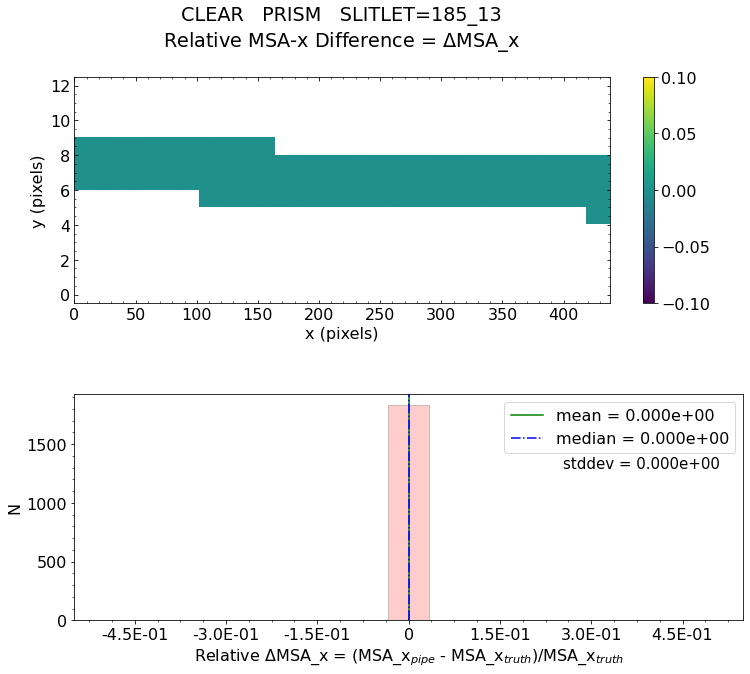

No output_directory was provided. Figures will NOT be saved.


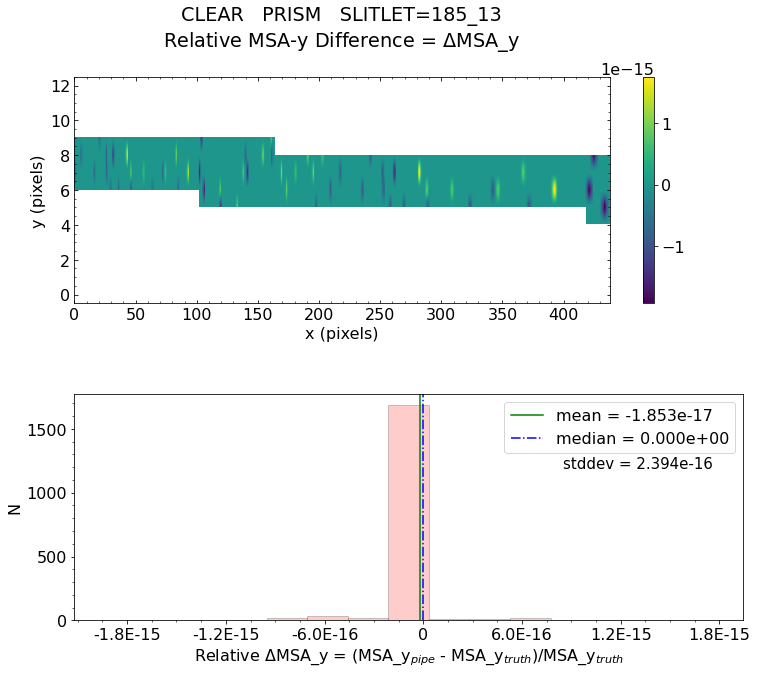

No output_directory was provided. Figures will NOT be saved.


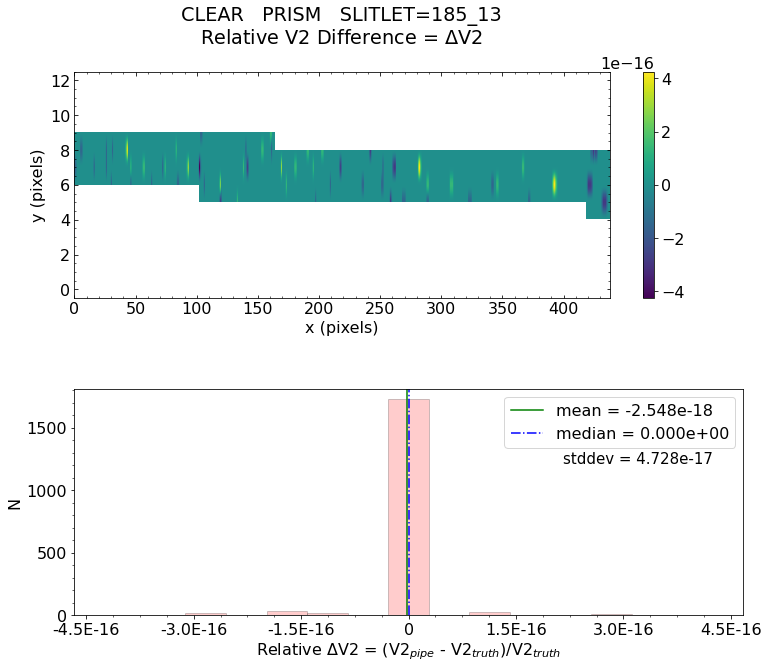

No output_directory was provided. Figures will NOT be saved.


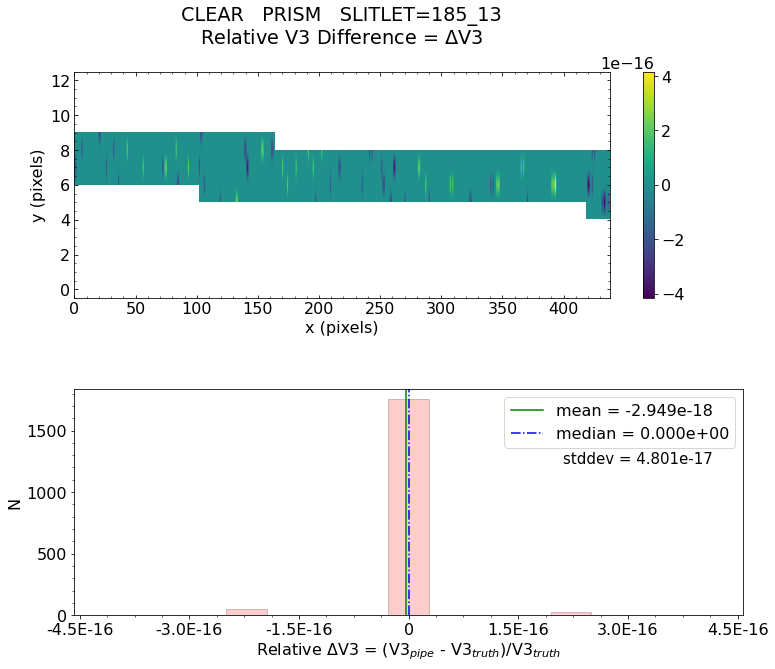


Working with slit: 4
Pipeline shutter info:   quadrant= 4   row= 190   col=158


Avalable frames:  ['detector', 'sca', 'gwa', 'slit_frame', 'msa_frame', 'oteip', 'v2v3', 'v2v3vacorr', 'world']

   Relative Wavelength Difference  :   mean = -2.202e-17    median = 0.000e+00    stdev = 1.362e-15
    Maximum   RelativeWavelength Difference = 2.049e-14
    Minimum   RelativeWavelength Difference = -3.172e-14
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                            ->  5xtheshold = 0%
Result for test of Wavelength Difference: PASSED

   Relative Slit-Y Difference  :   mean = 1.932e-14    median = 0.000e+00    stdev = 2.257e-12
    Maximum   RelativeSlit-Y Difference = 6.195e-11
    Minimum   RelativeSlit-Y Difference = -1.540e-11
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 0%
                            ->  3xtheshold = 0%
                        

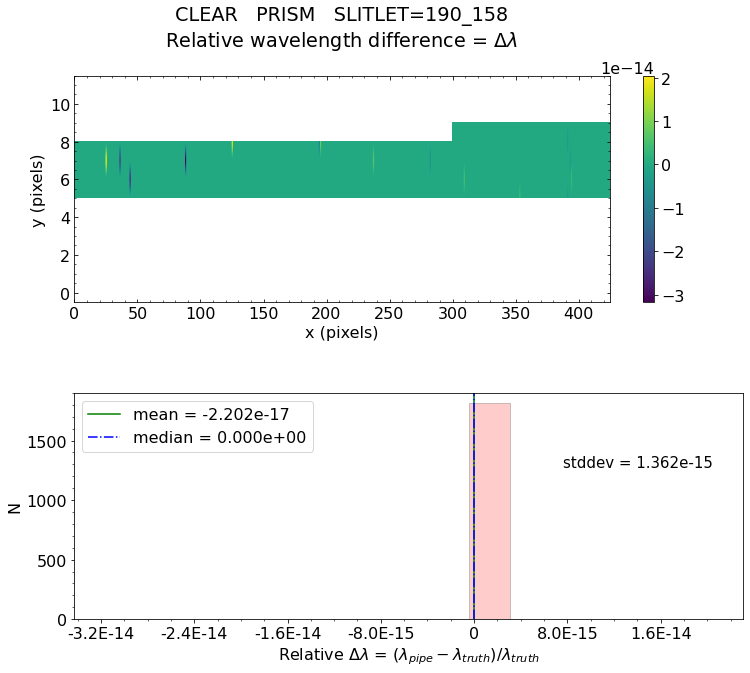

No output_directory was provided. Figures will NOT be saved.


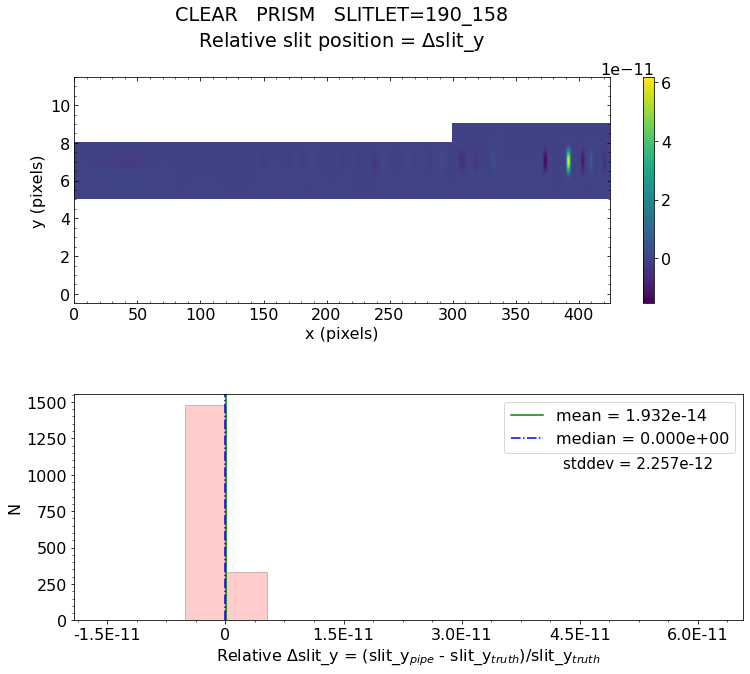

No output_directory was provided. Figures will NOT be saved.


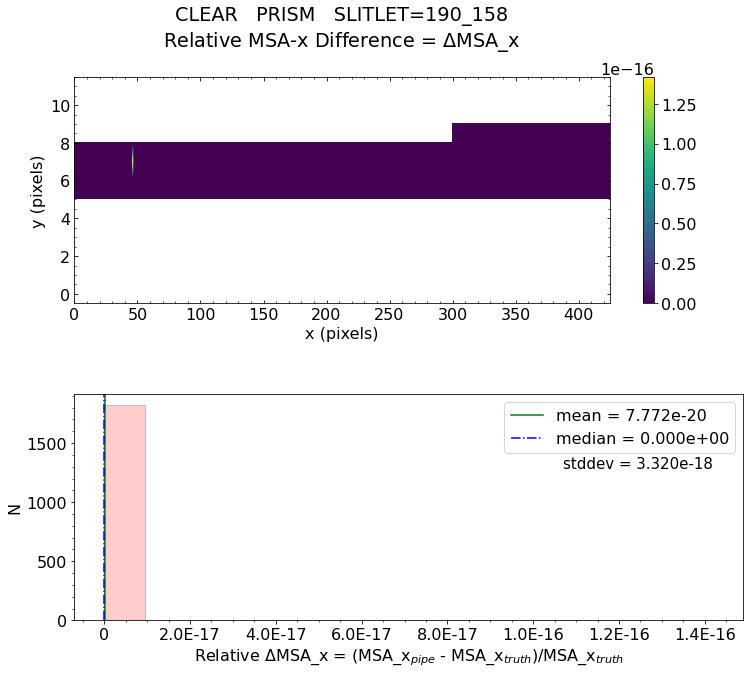

No output_directory was provided. Figures will NOT be saved.


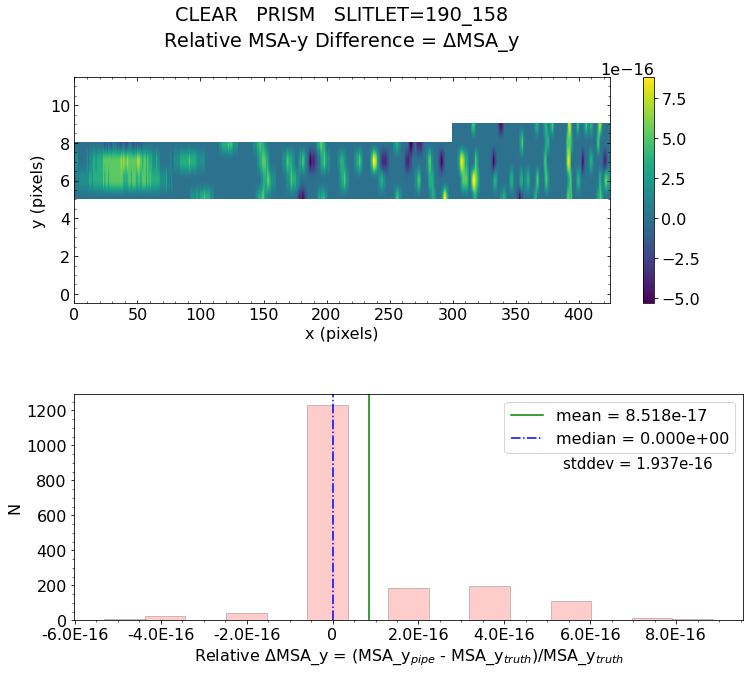

No output_directory was provided. Figures will NOT be saved.


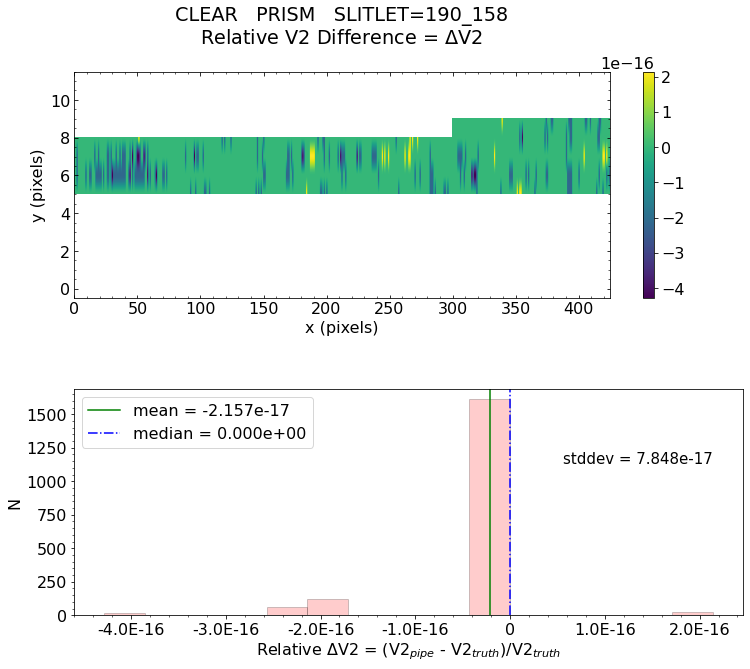

No output_directory was provided. Figures will NOT be saved.


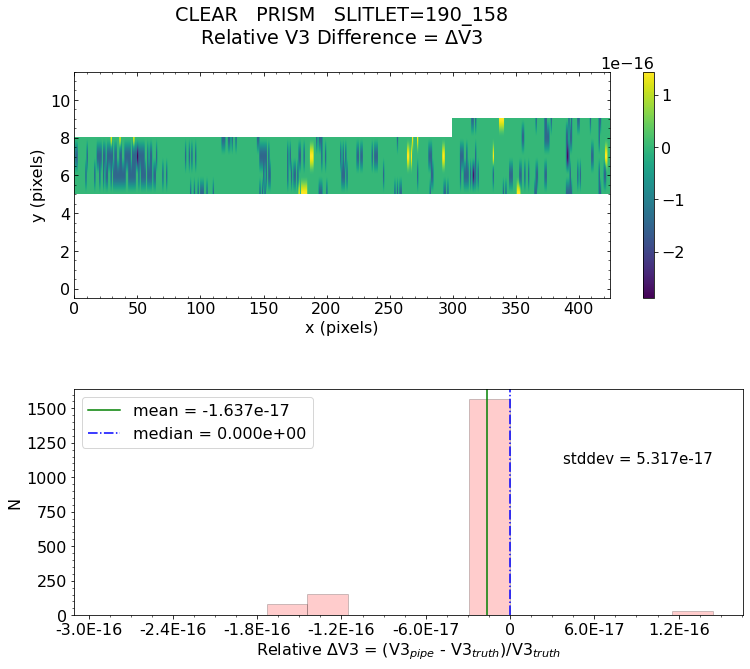


 * The test of Wavelength Difference for slitlet 185_13  PASSED.

 * The test of Slit-Y Difference for slitlet 185_13  PASSED.

 * The test of MSA_X Difference for slitlet 185_13  PASSED.

 * The test of MSA_Y Difference for slitlet 185_13  PASSED.

 * The test of V2 difference for slitlet 185_13  PASSED.

 * The test of V3 difference for slitlet 185_13  PASSED.

 * The test of Wavelength Difference for slitlet 190_158  PASSED.

 * The test of Slit-Y Difference for slitlet 190_158  PASSED.

 * The test of MSA_X Difference for slitlet 190_158  PASSED.

 * The test of MSA_Y Difference for slitlet 190_158  PASSED.

 * The test of V2 difference for slitlet 190_158  PASSED.

 * The test of V3 difference for slitlet 190_158  PASSED.

 *** Final result for assign_wcs test will be reported as PASSED *** 

Did assign_wcs validation test passed?  PASSED 


Testing files for detector:  nrs2


Working with uncal_file:  mos_prism_nrs2_uncal.fits
No truth file to compare to for this detector, skipping this data set.  

Testing files for detector:  nrs1


Working with uncal_file:  mos_g140m_line1_NRS1_uncal.fits


Exception ignored in: <function DataModel.__del__ at 0x7f4033a6f040>
Traceback (most recent call last):
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 337, in __del__
    self.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 359, in close
    file_reference.decrement()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/stdatamodels/model_base.py", line 1112, in decrement
    self._file.close()
  File "/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/astropy/io/fits/hdu/hdulist.py", line 973, in close
    se

OSError: [Errno 9] Bad file descriptor

In [1]:
# Set common NPTT switches for this test

# define benchmark (or 'truth') file
compare_assign_wcs_and_extract_2d_with_esa = False

# accepted threshold difference with respect to benchmark files
threshold_diff = 1e-7

# other variables
esa_files_path, raw_data_root_file = None, None
save_figs = False
show_figs = True

# Get the data
detectors = ['nrs1', 'nrs2']
results_dict = {}
for mode_config, data_set_dict in testing_data.items():
    for det in detectors:
        print('Testing files for detector: ', det)
        data = get_artifactory_file(data_set_dict, det)
        uncal_file, truth_file, msa_shutter_config = data
        uncal_basename = os.path.basename(uncal_file)
        print('Working with uncal_file: ', uncal_basename)
        
        # Make sure that there is an assign_wcs truth product to compare to, else skip this data set
        if truth_file is None:
            print('No truth file to compare to for this detector, skipping this data set.  \n')
            continue

        # Run the stage 1 pipeline 
        rate_object = Detector1Pipeline.call(uncal_file)
        
        # Make sure the MSA shutter configuration file is set up correctly
        if msa_shutter_config is not None:
            msa_metadata = rate_object.meta.instrument.msa_metadata_file
            if msa_metadata is None or msa_metadata == 'N/A':
                rate_object.meta.instrument.msa_metadata_file = msa_shutter_config

        # Run the stage 2 pipeline steps
        try:
            assign_wcs_object = AssignWcsStep.call(rate_object)
        except:
            print("No open slits fall on detector ", det)
            continue 

        # Run the validation test
        %matplotlib inline
        if 'fs' in uncal_file.lower():
            print('Running test for FS...')
            result, _ = nptt.calwebb_spec2_pytests.auxiliary_code.compare_wcs_fs.compare_wcs(
                                                                            assign_wcs_object, 
                                                                            truth_file=truth_file, 
                                                                            esa_files_path=esa_files_path, 
                                                                            show_figs=show_figs,
                                                                            save_figs=save_figs, 
                                                                            threshold_diff=threshold_diff, 
                                                                            raw_data_root_file=raw_data_root_file,
                                                                            output_directory=None)     
        if 'mos' in uncal_file.lower():
            print('Running test for MOS...')
            result, _ = nptt.calwebb_spec2_pytests.auxiliary_code.compare_wcs_mos.compare_wcs(
                                                                            assign_wcs_object, 
                                                                            msa_conf_name=msa_shutter_config, 
                                                                            truth_file=truth_file,
                                                                            esa_files_path=esa_files_path, 
                                                                            show_figs=show_figs, 
                                                                            save_figs=save_figs, 
                                                                            threshold_diff=threshold_diff,
                                                                            mode_used='mos', 
                                                                            raw_data_root_file=raw_data_root_file)
        if 'ifu' in uncal_file.lower():
            print('Running test for IFU...')
            result, _ = nptt.calwebb_spec2_pytests.auxiliary_code.compare_wcs_ifu.compare_wcs(
                                                                            assign_wcs_object, 
                                                                            truth_file=truth_file, 
                                                                            esa_files_path=esa_files_path, 
                                                                            show_figs=show_figs,
                                                                            save_figs=save_figs, 
                                                                            threshold_diff=threshold_diff, 
                                                                            raw_data_root_file=raw_data_root_file)


        # Did the test passed 
        print("Did assign_wcs validation test passed? ", result, "\n\n")
        rd = {mode_config: result}
        results_dict.update(rd)
        
        # close all open files
        psutil.Process().open_files()
        closing_files = []
        for fd in psutil.Process().open_files():
            if data_dir.name in fd.path:
                closing_files.append(fd)
        for fd in closing_files:
            open(fd.fd).close()



In [ ]:
# Quickly see if the test passed 

print('These are the final results of the tests: ')
for key, val in results_dict.items():
    print(key, val)

<a id="about_ID"></a>
## About this Notebook
**Author:** Maria A. Pena-Guerrero, Staff Scientist II - Systems Science Support, NIRSpec
<br>**Updated On:** Mar/9/2021

[Top of Page](#title_ID)
<img style="float: right;" src="./stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="stsci_pri_combo_mark_horizonal_white_bkgd" width="200px"/> 